---
# <center> Title:   2019 Truck Travel Speed and Performance Measure.</center>
<br>
<center>  <h2> Final Results and Code<br></h2> </center>

---


<center>  <h3> Ilyas Borjakov. 501145700<br></h2> </center>
<center>  <h3> The G. Raymond Chang School of Continuing Education,<br> </h2> </center>
<center>  <h3> Toronto Metropolitan University<br></h2> </center>
<center>  <h3> CIND820_D1H: Big Data Analytics Project<br></h2> </center>
<center>  <h3> Ashok Bhowmick, Ph. D<br></h2> </center>
<center>  <h3> January 23, 2023<br></h2> </center>
<center>  <h3> <a href=https://github.com/ilyasbh/CIND820/blob/main/CIND820_Project_IB.ipynb>Public GitHub</a> <br></h2> </center>

<h3> Importing Libraries </h3>

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import tensorflow as tf
from scipy import interpolate
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.interpolate import interp1d
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Loading the Dataset

In [2]:
df = pd.read_csv("2019_travel_speed_and_performance_measure-truck.csv")

Changing settings to view all the attributes

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.sample(10)

,FID,OGF_ID,LENGTH,EXITNUM,LANES,RDCLASS,ROUTENUM,SPDLIM,ROUTE_NAME,FULLNAME,DIRECTIONA,STREET_TYP,STREET_NAM,STREET_T_1,STREET_DIR,ORNICID,AZIMUTH,STATE,COUNTRY,ICID,FFS,ATS_AM,ATS_PM,ATS_WN,ATS_AM_ADJ,ATS_PM_ADJ,ATS_WN_ADJ,TTI_AM,TTI_PM,TTI_WN,TTI_AM_ADJ,TTI_PM_ADJ,TTI_WN_ADJ,DI_AM,DI_PM,DI_WN,DI_AM_ADJ,DI_PM_ADJ,DI_WN_ADJ,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,BTI_AM_ADJ,BTI_PM_ADJ,BTI_WN_ADJ,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
34416,34417,1509451586,345.068,,4,Arterial,0,50,,MURPHY ROAD,,,Murphy,Road,,1509451586,2.861669,ON,Canada,1509451586,0,59,0,0,59,0,0,0.00,0.00,0.00,,,,0,0,0,,,,55,0,0,1.07,0.00,0.00,1.07,,,0,0,0,0,0,0,0,0,59,54,54,58,44,50,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003109
169766,169767,4087890,25.373,,2,Arterial,5,60,,KILLALY STREET WEST,,,Killaly,Street,West,-4087890,124.580874,ON,Canada,-4087890,0,0,9,0,0,9,0,0.00,0.00,0.00,,,,0,0,0,,,,0,19,0,0.00,0.47,0.00,,0.47,,0,0,0,0,0,0,0,0,0,21,0,5,16,26,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000283
129822,129823,5555427,1408.597,,2,Arterial,24,80,,CHARLESTON SIDEROAD,,,Charleston,Sideroad,,-5555427,226.665377,ON,Canada,-5555427,88,83,84,86,83,84,86,1.06,1.05,1.02,1.06,1.05,1.02,2,2,1,2,2,1,69,72,68,1.20,1.17,1.26,1.2,1.17,1.26,87,89,89,91,89,83,82,84,82,84,84,84,85,85,85,84,84,84,86,88,87,86,89,89,90,91,85,77,89,82,87,91,87,87,86,87,85,82,82,82,87,87,80,89,82,85,89,94,0.014659
42145,42146,4192601,155.566,,2,Arterial,0,70,,YORK BOULEVARD,,,,,,4192601,122.410453,ON,Canada,4192601,43,45,30,42,45,30,42,1.00,1.43,1.02,1,1.43,1.02,0,36,2,,36,2,34,2,28,1.32,15.00,1.50,1.32,> 2.00,1.5,39,44,43,48,34,25,43,48,40,30,44,48,43,38,39,40,33,28,46,44,41,46,48,41,45,35,0,0,50,0,0,44,50,32,0,0,35,0,56,41,40,0,37,0,0,0,0,39,0.001714
235317,235318,1510867217,101.968,,4,Collector,0,50,,BRISTOL ROAD WEST,,,Bristol,Road,West,1510867217,54.040142,ON,Canada,1510867217,61,0,0,0,0,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,0,14,19,14,15,22,0,0,0,0,0,0,0,0,0,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001104
172791,172792,1500447877,37.651,,4,Arterial,0,40,,AVENUE ROAD,,,Avenue,Road,,-1500447877,158.593602,ON,Canada,-1500447877,26,8,6,14,8,6,14,3.25,4.33,1.86,> 2.00,> 2.00,1.86,312,462,119,312,462,119,2,11,9,4.00,0.55,1.56,> 2.00,0.55,1.56,0,0,0,0,13,19,19,15,16,25,12,2,12,3,18,18,0,0,31,0,0,19,26,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0.000350
222961,222962,7284336,163.950,,2,Arterial,22,50,,BRUCE ROAD 22,,,Bruce Road 22,,,7284336,344.206967,ON,Canada,7284336,0,0,24,22,0,24,22,0.00,0.00,0.00,,,,0,0,0,,,,0,0,14,0.00,0.00,1.57,,,1.57,0,0,0,0,0,0,0,0,0,0,0,0,30,23,0,0,0,24,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001503
153649,153650,1500687987,280.079,,2,Collector,0,50,,WHITNEY AVENUE,,,Whitney,Avenue,,-1500687987,263.446079,ON,Canada,-1500687987,26,9,18,13,9,18,13,2.89,1.44,2.00,> 2.00,1.44,2,262,62,138,262,62,138,7,16,0,1.29,1.12,0.00,1.29,1.12,,0,0,26,0,13,0,0,6,14,0,0,8,16,0,0,19,0,16,0,27,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.003432
218507,218508,1500607877,194.031,,7,Arterial,0,60,,ELLESMERE ROAD,,,Ellesmere,Road,,1500607877,77.870780,ON,Canada,1500607877,42,34,21,31,34,21,31,1.24,2.00,1.35,1.24,2,1.35,20,86,30,20,86,30,16,5,2,2.12,4.20,15.50,> 2.00,> 2.00,> 2.00,0,0,48,42,42,0,39,43,33,43,38,38,46,26,36,22,25,29,40,29,55,55,36,44,0,0,0,0,0,0,42,0,32,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002358
155879,155880,1510595422,92.674,,2,Collector,0,50,,SUNSET DRIVE,,,Sunset,Drive,,-1510595422,131.097644,ON,Canada,-1510595422,0,0,0,0

At first look, ATS_AM (link level average travel speed during AM peak) and ATS_AM_ADJ (adjusted link level average travel speed during AM peak) populated with the same values almost all the time.<br> 
The same was true for all the other fields which have ADJ additives.<br>

That will make 12 columns redundant, and those fields will be removed while performing data cleaning.<br>
ATS_AM_ADJ,  ATS_PM_ADJ,  ATS_WN_ADJ,<br> 
TTI_AM_ADJ,  TTI_PM_ADJ,  TTI_WN_ADJ,<br>
DI_AM_ADJ,   DI_PM_ADJ,   DI_WN_ADJ,<br>
BTI_AM_ADJ,  BTI_PM_ADJ,  BTI_WN_ADJ<br>

In [7]:
df['Same?'] = df['ATS_AM'] == df['ATS_AM_ADJ']
df['Same?'].value_counts()

True     287640
False         7
Name: Same?, dtype: int64

In [8]:
df['Same?'] = df['ATS_PM'] == df['ATS_PM_ADJ']
df['Same?'].value_counts()

True     287643
False         4
Name: Same?, dtype: int64

In [9]:
df['Same?'] = df['ATS_WN'] == df['ATS_WN_ADJ']
df['Same?'].value_counts()

True     287640
False         7
Name: Same?, dtype: int64

Checking if OGF_ID is the same as ORNICID.<br>
When comparing OGF_ID to ORNICID, it identified that it matches only 55% of the time.

In [10]:
df['Same?'] = df['OGF_ID'] == df['ORNICID']
df['Same?'].value_counts()

True     159287
False    128360
Name: Same?, dtype: int64

ICID and ORNICID represent the same.<br>

In [11]:
df['Same?'] = df['ICID'] == df['ORNICID']
df['Same?'].value_counts()

True    287647
Name: Same?, dtype: int64

FID field is containing 0 helpful information.<br> 
By removing ORNICID and FID, I can reduce the total attribute count by 14.

Checking all the columns in the dataset

In [12]:
df.columns

Index(['FID', 'OGF_ID', 'LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM',
       'SPDLIM', 'ROUTE_NAME', 'FULLNAME', 'DIRECTIONA', 'STREET_TYP',
       'STREET_NAM', 'STREET_T_1', 'STREET_DIR', 'ORNICID', 'AZIMUTH', 'STATE',
       'COUNTRY', 'ICID', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'ATS_AM_ADJ',
       'ATS_PM_ADJ', 'ATS_WN_ADJ', 'TTI_AM', 'TTI_PM', 'TTI_WN', 'TTI_AM_ADJ',
       'TTI_PM_ADJ', 'TTI_WN_ADJ', 'DI_AM', 'DI_PM', 'DI_WN', 'DI_AM_ADJ',
       'DI_PM_ADJ', 'DI_WN_ADJ', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'BTI_AM_ADJ', 'BTI_PM_ADJ', 'BTI_WN_ADJ',
       'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05',
       'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11',
       'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17',
       'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',
       'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05'

Before any reduction, this dataset has 287,647 records and 98 attributes:

In [14]:
df.shape

(287647, 98)

Reducing the number of columns by removing unnecessary fields.

In [17]:
df1 = df[['LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM',
          'SPDLIM', 'ROUTE_NAME', 'FULLNAME', 'DIRECTIONA', 'STREET_TYP',
          'STREET_NAM', 'STREET_T_1', 'STREET_DIR', 'AZIMUTH', 'STATE',
          'COUNTRY', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 
          'TTI_AM', 'TTI_PM', 'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 
          'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
          'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 
          'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 
          'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 
          'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
          'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
          'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09', 
          'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
          'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21', 
          'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

Only 81 columns left.

In [18]:
df1.shape

(287647, 81)

Checking data type of each column.

In [19]:
df1.dtypes

LENGTH          float64
EXITNUM          object
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
ROUTE_NAME       object
FULLNAME         object
DIRECTIONA       object
STREET_TYP       object
STREET_NAM       object
STREET_T_1       object
STREET_DIR       object
AZIMUTH         float64
STATE            object
COUNTRY          object
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09        

In [20]:
df1.sample(10)

,LENGTH,EXITNUM,LANES,RDCLASS,ROUTENUM,SPDLIM,ROUTE_NAME,FULLNAME,DIRECTIONA,STREET_TYP,STREET_NAM,STREET_T_1,STREET_DIR,AZIMUTH,STATE,COUNTRY,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
124863,2430.397,,2,Arterial,41,80,,COUNTY ROAD 41,,County Road,41,,,154.902643,ON,Canada,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.022902
153288,34.780,,2,Arterial,0,50,,QUEEN STREET EAST,,,Queen,Street,East,257.070529,ON,Canada,0,0,-1,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,36,0,0,0,33,0,10,14,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000422
184278,294.082,,2,Arterial,45,50,,COUNTY ROAD 45,,County Road,45,,,154.026110,ON,Canada,44,48,38,50,1.00,1.16,1.00,0,13,0,43,15,50,1.12,2.53,1.00,48,0,0,40,42,0,60,51,46,39,47,45,59,34,50,36,40,48,50,53,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,50,0,0,0,0,0.002778
228017,83.012,,2,Collector,0,50,,JALNA BOULEVARD,,,Jalna,Boulevard,,344.109433,ON,Canada,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000761
67394,158.661,,2,Arterial,0,60,,MERIVALE ROAD,,,Merivale,Road,,149.117632,ON,Canada,37,9,19,31,4.11,1.95,1.19,303,92,19,0,16,12,0.00,1.19,2.58,61,10,19,37,0,47,57,18,10,11,12,20,17,22,14,19,0,0,0,22,32,0,38,58,43,51,0,48,0,14,0,38,14,0,0,34,20,0,40,0,0,0,0,0,0,51,0,0,0.001533
93326,186.907,,2,Collector,0,50,,20 ROAD EAST,,,20,Road,East,103.768265,ON,Canada,0,5,23,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,5,0,0,13,0,26,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0.002245
126556,169.173,,4,Arterial,8,60,,WEBER STREET NORTH,,,Weber,Street,North,124.907780,ON,Canada,41,46,47,49,1.00,1.00,1.00,0,0,0,29,33,41,1.59,1.42,1.20,0,0,0,0,0,0,30,47,55,42,53,46,51,52,39,0,49,46,0,0,0,39,41,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,37,0,44,0,0.001835
103119,144.433,,2,Arterial,100,60,,4 MILE CREEK ROAD,,,4 Mile Creek,Road,,185.381923,ON,Canada,68,56,58,54,1.21,1.17,1.26,11,9,14,41,0,53,1.37,0.00,1.02,0,0,0,68,0,55,58,55,0,53,46,56,0,56,31,0,0,58,60,0,0,55,0,0,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001315
54742,21.695,,2,Collector,0,50,,GLEN FORREST BOULEVARD,,,Glen Forrest,Boulevard,,260.221267,ON,Canada,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000265
46296,682.742,,1,Ramp,0,30,,QUEEN ELIZABETH WAY,,,Queen Elizabeth,Way,,63.043712,ON,Canada,91,65,77,84,1.40,1.18,1.08,16,7,3,29,34,37,2.24,2.26,2.27,95,91,92,100,91,93,66,66,65,64,70,82,67,75,75,81,77,75,84,95,98,89,81,94,103,82,102,106,104,103,100,94,95,102,74,74,67,87,94,96,85,95,97,102,96,0,94,87,0.007472


Checking the values of DIRCTIONA attribute.

In [21]:
df1.DIRECTIONA.values

array([' ', ' ', ' ', ..., ' ', ' ', ' '], dtype=object)

The above query shows that the field contains a lot of values which is a space,  not useful.

In [22]:
df[df['DIRECTIONA'] == ' '].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            287637, 287638, 287639, 287640, 287641, 287642, 287643, 287644,
            287645, 287646],
           dtype='int64', length=285473)

As a result, this column can be removed as it mainly contains space, and the information in this column still exist in the other field.

In [23]:
a = df['DIRECTIONA'].unique()
print(sorted(a))

[' ', 'East', 'North', 'South', 'West']


Checking the unique values in the street_type attributes.

In [24]:
a = df['STREET_TYP'].unique()
print(sorted(a))

[' ', 'Avenue', 'Boulevard', 'Chemin', 'Concession', 'Concession Road', 'County Road', 'Fire Route', 'Glen', 'Haven', 'Highway', 'Lake', 'Line', 'Parc', 'Parkway', 'Place', 'Promenade', 'Regional Road', 'Road', 'Route', 'Rue', 'Service', 'Shore', 'Sideline', 'Sideroad', 'Townline', 'Via']


Many attributes contain spaces in the dataset and thus will be replaced with NaN.

In [25]:
df2 = df1.replace(r'^\s*$', np.nan, regex = True)

Checking how many rows has not null values

In [26]:
df2['STREET_TYP'].notnull().sum()

41532

In [29]:
df3 = df2.replace(' ', np.nan)

Checking for Unique values in EXITNUM column.<br>

In [30]:
df3.EXITNUM.unique()

array([nan, '153', '220', '213', '207', '214', '217', '224', '229', '231',
       '236', '344', '338', '113', '110', '241', '128', '129', '131A',
       '131', '135', '248', '27', '30', '41', '38', '232', '230', '222',
       '218', '216', '235', '244', '221', '219', '250', '36', '34', '351',
       '350', '352', '348', '21', '357', '120', '118', '75', '54', '53',
       '415', '412', '95', '98', '139', '29', '26', '73', '419', '418',
       '121', '126', '16', '306', '301', '294', '289', '282', '6', '238',
       '276', '270', '266', '261', '257', '77', '359', '21B', '355',
       '356', '354', '69', '63', '116', '123', '88', '90', '362', '20',
       '21A', '28', '107', '105', '102', '99', '100', '101', '1', '78',
       '74', '189', '186', '177', '177B', '177A', '324', '97', '93',
       '389', '86', '119', '109', '111', '383', '381', '117', '392',
       '390', '83', '122', '44', '12', '448', '440', '144', '142', '157',
       '149', '47', '401', '399', '397', '51', '49', '48', '55

Checking for missing values.

In [31]:
df3['EXITNUM'].isnull().sum()

286678

EXITNUM is mainly filled with Null values. Only 969 out of 287,647 rows have values. <br>
As only 0.3% of the data has an EXITNUM, this column will have minimal effect on the dataset and can be dropped.

In [32]:
df3.FULLNAME.unique()

array(['ELORA STREET', 'ABSALOM STREET WEST', 'MURPHY DRIVE', ...,
       'WHEELER AVENUE', 'CHRISTIE DRIVE', 'HACIENDA ROAD'], dtype=object)

FULLNAME attribute contains the data from 'DIRECTIONA', 'STREET_NAM', 'STREET_T_1', 'STREET_DIR'.<br>
As a result of the observation, those fields are redundant and can be removed, further reducing the column count.

In [33]:
df3['COUNTRY'].unique()

array(['Canada'], dtype=object)

The above line will be another example of a field which do not have value for future analysis.<br>
Other columns to be dropped are the OGF_ID, ICID, STATE and COUNTRY.

In [34]:
df3 = df3[['LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
       'ROUTE_NAME', 'FULLNAME', 'STREET_TYP', 'AZIMUTH',
       'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM', 'TTI_WN',
       'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03',
       'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
       'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15',
       'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
       'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
       'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
       'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
       'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21',
       'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

By checking for missing values in the dataset.<br>
It was observed that EXITNUM, ROUTE_NAME, FULLNAME and STREET_TYP have missing values.<br>
Out of those four, FULLNAME has the least, only 1043 (0.4%) of total rows.<br>
On the other hand, EXITNUM, ROUTE_NAME and STREET_TYP have a very high number of missing values.<br>
They are 99.7%, 93.7% and 85.6% of total records respectively.<br>

In [35]:
df3.isna().sum()

LENGTH               0
EXITNUM         286678
LANES                0
RDCLASS              0
ROUTENUM             0
SPDLIM               0
ROUTE_NAME      269404
FULLNAME          1043
STREET_TYP      246115
AZIMUTH              0
FFS                  0
ATS_AM               0
ATS_PM               0
ATS_WN               0
TTI_AM               0
TTI_PM               0
TTI_WN               0
DI_AM                0
DI_PM                0
DI_WN                0
P95TH_AM             0
P95TH_PM             0
P95TH_WN             0
BTI_AM               0
BTI_PM               0
BTI_WN               0
ATS_WD00             0
ATS_WD01             0
ATS_WD02             0
ATS_WD03             0
ATS_WD04             0
ATS_WD05             0
ATS_WD06             0
ATS_WD07             0
ATS_WD08             0
ATS_WD09             0
ATS_WD10             0
ATS_WD11             0
ATS_WD12             0
ATS_WD13             0
ATS_WD14             0
ATS_WD15             0
ATS_WD16             0
ATS_WD17   

In [43]:
df3.shape

(287647, 75)

Checking for unique values in ROUTE_NAME

In [44]:
df3['ROUTE_NAME'].unique()

array([nan, 'Bluewater Route', 'Bluewater Veterans Highway',
       'Bluewater Highway', 'Talbot Trail', 'Algonquin Trail',
       'Wine Route', 'Trans-Canada Highway', 'Queen Elizabeth Way',
       'Great River Road', 'Voyageur Route', 'Frontier Route',
       'Route of Heroes', 'Taste Trail', 'Arts Trail',
       'African-Canadian Heritage Tour', 'Oil Heritage Route',
       'Deer Trail Route', 'Terry Fox Courage Highway',
       'Route Transcanadienne', 'Golden Highway', 'The Kingsway',
       'Lake Nipissing Circle Tour', 'Macdonald-Cartier Freeway',
       '407 ETR', 'Highway of Heroes', 'Don Valley Parkway',
       'Gardiner Expressway', 'Red Hill Valley Parkway', 'The Allen',
       'Highbury Avenue', 'Veterans Memorial Parkway',
       'Lincoln M. Alexander Parkway', 'John M Turner Memorial Highway',
       'General Brock Parkway', 'Hanlon Parkway', 'The Queensway',
       'Veterans Memorial Highway', 'E.C. Row Expressway',
       'Rt. Hon. Herb Gray Parkway', 'Falconbridge'], 

Dropping EXITNUM, ROUTE_NAME and STREET_TYP

In [45]:
df4 = df3[['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM', 'FULLNAME', 
           'AZIMUTH', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM', 
           'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 
           'BTI_AM', 'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03',
           'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
           'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15',
           'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
           'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
           'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
           'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
           'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21',
           'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

In [46]:
df4.shape

(287647, 72)

Checking the dataset with describe function.<br>

By checking the outcome, the maximum speed does not look valid.<br>
Some fields show the max speed is over 150 and reaching even 375, which is unrealistic.<br>

In [47]:
df4.describe()

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
count,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000
mean,450.148965,2.256151,35.132972,58.414675,187.212674,20.688458,25.020786,24.682023,21.514634,0.634196,0.656034,0.578699,29.398892,32.361690,29.801159,14.377703,14.185648,12.842647,1.493165,1.390026,0.908475,13.154853,12.680494,12.774209,13.463085,14.792033,16.980431,19.358717,21.514898,23.381443,24.843819,25.455962,25.633718,25.503447,25.320059,24.493675,23.023769,21.138604,19.002225,17.584564,16.662785,15.982614,15.371389,14.669286,14.033075,8.760244,7.548370,7.057435,6.858375,7.166013,7.898751,8.820123,9.775541,10.516108,10.623716,10.662159,10.433316,10.189948,9.755363,9.371101,8.816136,8.491658,8.056705,7.633673,7.391779,7.088654,6.526030,6.316287,5.658971,0.004922
std,854.362487,0.797824,218.118051,15.153852,101.616393,29.876022,28.661689,29.097813,29.765881,1.532762,1.597925,1.655194,172.834325,179.374374,197.031189,22.989158,23.345982,23.698775,2.479590,2.386141,1.909132,27.026246,26.792174,26.901153,27.422545,28.088261,28.882065,29.211606,28.976656,28.701570,28.881297,29.008673,29.087739,29.211050,29.317581,29.343089,29.341189,29.279996,28.976681,28.805293,28.638957,28.415831,28.097546,27.715785,27.470987,23.733541,22.596133,22.001784,21.752502,22.156032,22.957359,23.822558,24.726856,25.328612,25.334878,25.288190,25.015540,24.803991,24.490229,24.218349,23.736302,23.522937,23.069425,22.592467,22.381850,22.068221,21.326551,21.072267,20.192725,0.009586
min,3.112000,1.000000,0.000000,5.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,84.675000,2.000000,0.000000,50.000000,89.814344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

The histogram shows that the Ontario trucks mainly travel on a two-lane road.

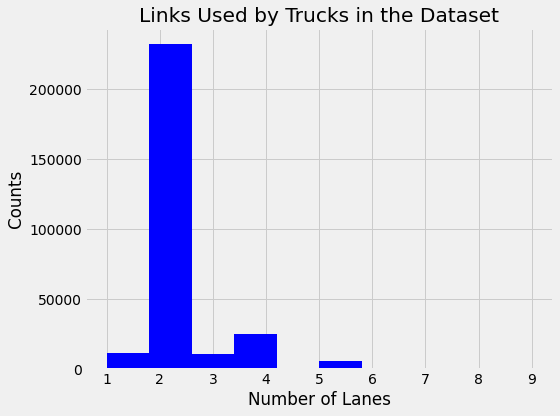

In [79]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
plt.hist(df4.LANES, color ='blue')


plt.xlabel('Number of Lanes')
plt.ylabel('Counts')
plt.title('Links Used by Trucks in the Dataset')

plt.tight_layout()

A histogram of the roads used by the trucks is plotted below.<br>
When dividing them into the bins of the five different types of roads mainly used by truckers (they are: King's Highway, 400-series highways, Secondary highways, Tertiary roads and 7000-series highways).<br>
The dataset shows that the 7000-series highway is the least used, and the next least used road is the 400-series highway by trucks.

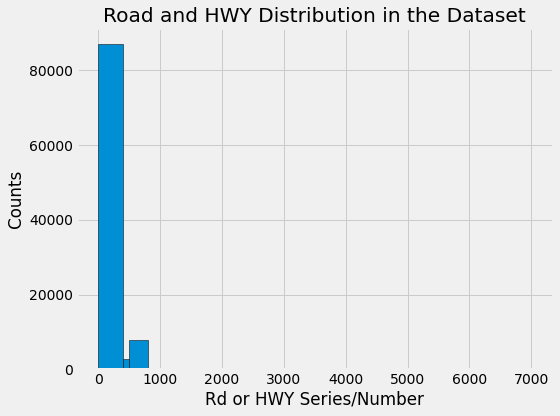

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
bins = [2, 400, 500, 800, 7000]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title("Road and HWY Distribution in the Dataset")

plt.tight_layout()

Because the number of 7000-series highways is so insignificant in the dataset, and there is no record of trucks driving on 800-series highways, it was removed from the bin to see the data distribution for other routes.

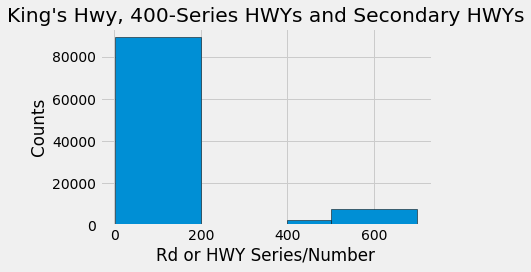

In [81]:
plt.style.use('fivethirtyeight')
bins = [1, 200, 400, 500, 700]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title("King's Hwy, 400-Series HWYs and Secondary HWYs")

plt.tight_layout()

Here we can see that there are around 200 datapoints showing for Tertiary roads and 7000-series highways.

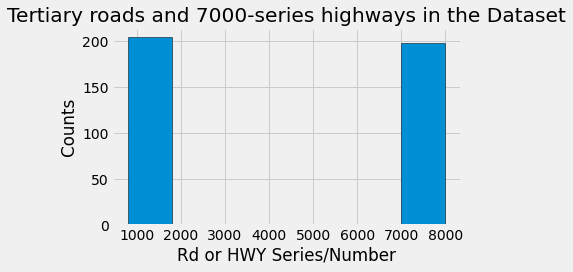

In [40]:
plt.style.use('fivethirtyeight')
bins = [800, 1800, 7000, 8000]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title('Tertiary roads and 7000-series highways in the Dataset')

plt.tight_layout()

The distribution of the road speed limit from this dataset once more confirms the assumption that most of the dataset is collected from the streets with lower speed limits (not a highway).

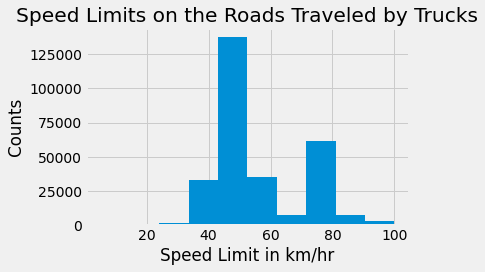

In [82]:
plt.style.use('fivethirtyeight')

plt.hist(df4.SPDLIM)

plt.xlabel('Speed Limit in km/hr')
plt.ylabel('Counts')
plt.title('Speed Limits on the Roads Traveled by Trucks')

plt.tight_layout()

While plotting the histogram of the AZIMUTH where trucks travelled, it immediately resembled the airport runway. 
In an airport, runways are named or, more correctly to say numbered, and sometimes the letter is added too. The number on the runway number represents the heading and is rounded to the nearest tenths, and the tail is truncated. For example, if it says runway number 18, it means that this runway is directed to the south at 180 degrees azimuth. The exact runway is numbered differently from the other side heading to the north with magnetic azimuth 0.<br>
Now, the dataset and azimuth travelled by trucks and illustrated in this histogram showing that if a given amount of trucks travelled to the 70-degree azimuth (highest bar on the histogram), then almost the same amount travelled 180 degrees opposite direction, hence 250-degree azimuth (another spike at the histogram). In simple terms, an assumption can be made that if the truck went somewhere, the truck returned from there (completing a cycle).

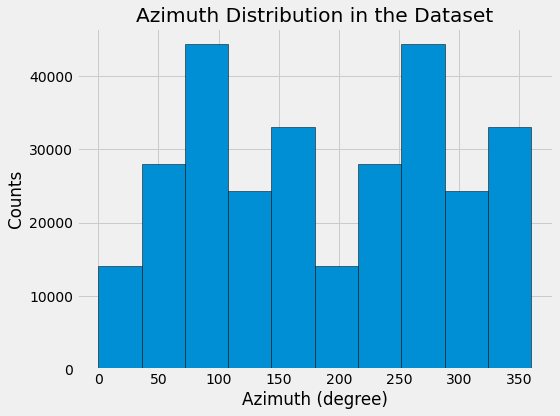

In [83]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
plt.hist(df4.AZIMUTH, bins=10, edgecolor = 'black')

plt.xlabel('Azimuth (degree)')
plt.ylabel('Counts')
plt.title('Azimuth Distribution in the Dataset')

plt.tight_layout()

Using Boxplot for free flow speed (FFS), it can be observed that data above reasonable limits (120+ km/hr) is highly possible to be outliers or faulty data points. Trucks travelling above 150km/hr are unrealistic.

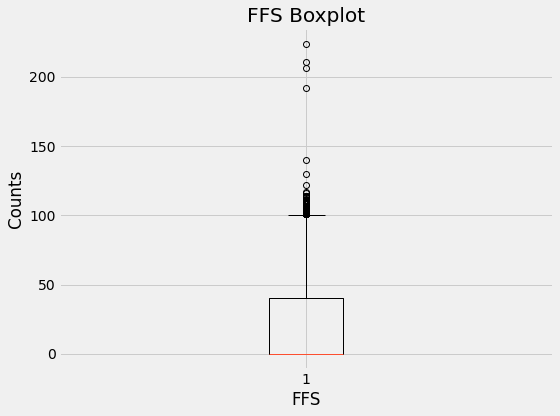

In [86]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
plt.boxplot([df4['FFS']])

plt.xlabel('FFS')
plt.ylabel('Counts')
plt.title('FFS Boxplot')

plt.tight_layout()

Using the boxplot outcome, cutting away any speed above 110km/hr, and plotting FFS for this dataset illustrates that most of the FFS on the roads are below 80km/hr. Especially data picks at 50km/hr, presumably a free-flow speed for the town or city.

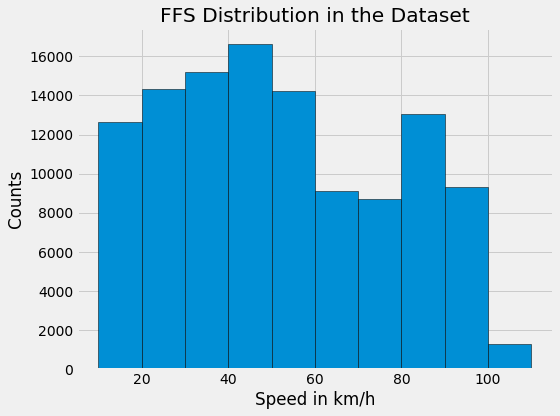

In [87]:
plt.style.use('fivethirtyeight')

bins = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 110]
plt.figure(figsize=(8,6))
plt.hist(df4.FFS, bins=bins, edgecolor = 'black')

plt.xlabel('Speed in km/h')
plt.ylabel('Counts')
plt.title('FFS Distribution in the Dataset')

plt.tight_layout()

Top 100 most used roads by the trucks in the dataset were visualized with the help of a bar chart. The output shows that HWY 401 is outside this dataset's top 3 roads used by trucks.

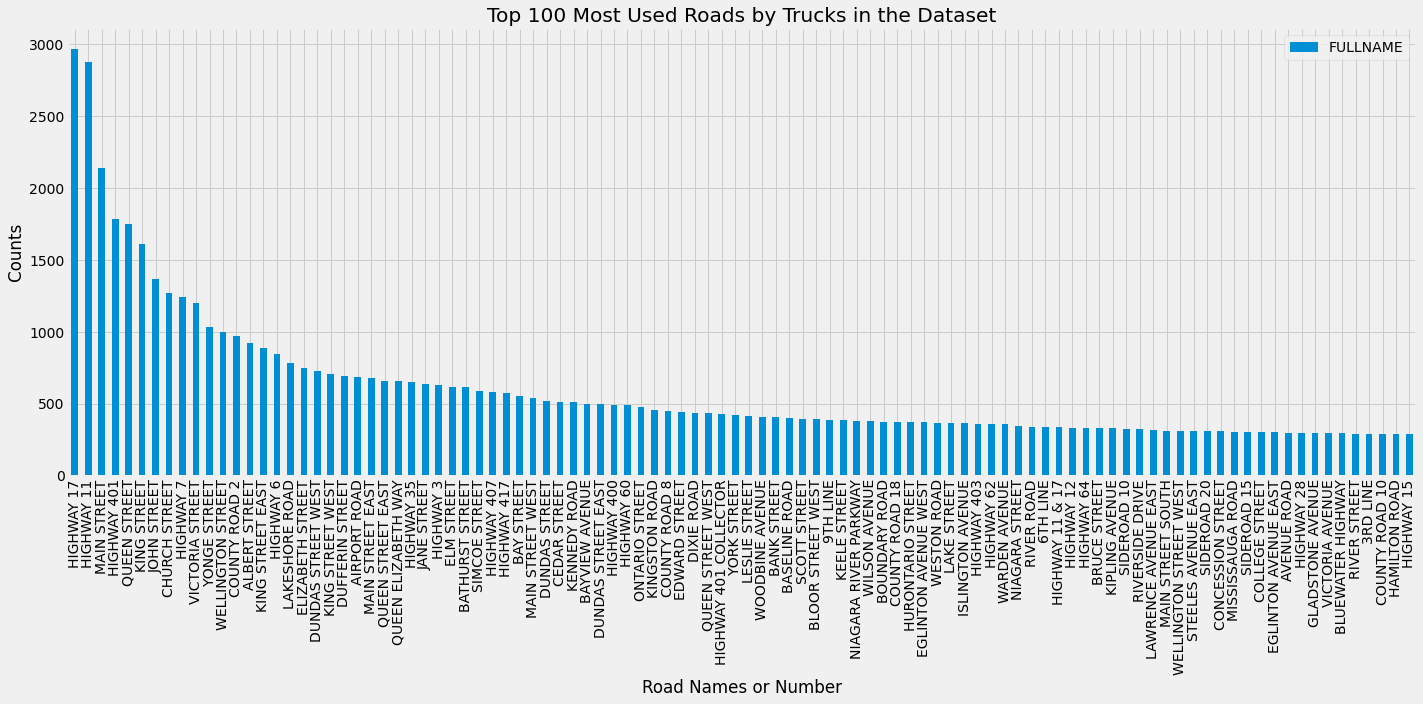

In [88]:
df_bar = pd.DataFrame(df4['FULLNAME'].value_counts())
df_bar = df_bar[:100]
df_bar.plot(kind='bar', figsize = (20,10))

plt.xlabel('Road Names or Number')
plt.ylabel('Counts')
plt.title('Top 100 Most Used Roads by Trucks in the Dataset')

plt.tight_layout()

Sub-datasets were created for visualization purposes to see how speed is affected by the day of the week and the time of the day.<br> 
Later, data will be divided into each road type and pick the average from the data points related to the same road with the corresponding FFS and speed limits.<br> 
Right now, all mixed (all the city/town roads with highways) and only spreading the data to weekdays, weekends and times of the day.

In [89]:
df4_WD = df4[['ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 
              'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
              'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 
              'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 
              'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',]]

df4_WN = df4[['ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 
              'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
              'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 
              'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 
              'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23']]

In [90]:
df4_WD.sample(5)

,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23
63117,55,61,63,67,43,45,52,45,34,34,31,32,28,23,15,12,11,12,16,30,52,58,61,45
108403,0,0,0,0,0,0,32,0,17,24,16,19,14,19,7,17,17,0,11,36,39,0,46,0
24761,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,0,0,0
78663,0,0,0,0,0,0,0,0,0,47,0,0,0,34,27,0,0,0,0,0,0,0,0,0
17526,0,74,53,68,42,44,50,52,62,60,69,70,58,67,54,8,80,55,55,72,53,0,50,0


In [91]:
df4_WN.sample(5)

,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23
4944,0,0,0,0,0,0,60,45,37,63,47,24,55,46,47,0,18,0,0,0,19,0,0,0
32643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,0
250564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,0,0,0,0,0,0
187492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


----
Sub_datasets contain many zeros, and some go for all the columns.<br> 
Rows with all columns equal to zero need to be removed from the sub-dataset to get meaningful data and plot them.<br>
I will average the data from both sub_dataset and save it for further plotting.<br>

Removing rows where all the columns are 0 (zero).

In [92]:
df4_WN_1 = df4_WN.replace(0, np.nan)
df4_WN_1 = df4_WN_1.dropna(how='all', axis=0)
df4_WN_1 = df4_WN_1.replace(np.nan, 0)

In [93]:
df4_WD_1 = df4_WD.replace(0, np.nan)
df4_WD_1 = df4_WD_1.dropna(how='all', axis=0)
df4_WD_1 = df4_WD_1.replace(np.nan, 0)

The data from both sub_dataset are averaged and saved for further plotting.

In [94]:
df4_WN_mean = df4_WN_1.mean().round(2)
df4_WD_mean = df4_WD_1.mean().round(2)

Checking the mean values for the Week day (WD).

In [95]:
df4_WD_mean

ATS_WD00    15.88
ATS_WD01    15.31
ATS_WD02    15.42
ATS_WD03    16.26
ATS_WD04    17.86
ATS_WD05    20.50
ATS_WD06    23.38
ATS_WD07    25.98
ATS_WD08    28.23
ATS_WD09    30.00
ATS_WD10    30.74
ATS_WD11    30.95
ATS_WD12    30.80
ATS_WD13    30.57
ATS_WD14    29.58
ATS_WD15    27.80
ATS_WD16    25.53
ATS_WD17    22.95
ATS_WD18    21.23
ATS_WD19    20.12
ATS_WD20    19.30
ATS_WD21    18.56
ATS_WD22    17.71
ATS_WD23    16.95
dtype: float64

Checking the mean values for the Weekend (WN).

In [96]:
df4_WN_mean

ATS_WN00    18.81
ATS_WN01    16.21
ATS_WN02    15.16
ATS_WN03    14.73
ATS_WN04    15.39
ATS_WN05    16.96
ATS_WN06    18.94
ATS_WN07    20.99
ATS_WN08    22.58
ATS_WN09    22.81
ATS_WN10    22.90
ATS_WN11    22.40
ATS_WN12    21.88
ATS_WN13    20.95
ATS_WN14    20.12
ATS_WN15    18.93
ATS_WN16    18.24
ATS_WN17    17.30
ATS_WN18    16.39
ATS_WN19    15.87
ATS_WN20    15.22
ATS_WN21    14.01
ATS_WN22    13.56
ATS_WN23    12.15
dtype: float64

All the data from the Red Hill Valley Parkway were collected in one place, WHERE RDCLASS = 'Freeway'.<br> 
This is done because Red Hill Valley Parkway also has a ramp speed which will influence the average, turning the data into the NumPy series using the code below.

In [97]:
RED_HILL_VALLEY_PARKWAY_FRWY = df4.loc[df4['FULLNAME'] 
                                             == 'RED HILL VALLEY PARKWAY'].loc[df4['RDCLASS'] == 'Freeway'].mean().round(2)
RED_HILL_VALLEY_PARKWAY_FRWY

LENGTH          697.51
LANES             2.42
ROUTENUM          0.00
SPDLIM           90.00
AZIMUTH         146.42
FFS              83.75
ATS_AM           72.83
ATS_PM           63.42
ATS_WN           82.96
TTI_AM            1.16
TTI_PM            1.52
TTI_WN            1.02
DI_AM             6.88
DI_PM            22.58
DI_WN             0.88
P95TH_AM         49.50
P95TH_PM         42.67
P95TH_WN         69.50
BTI_AM            1.60
BTI_PM            1.80
BTI_WN            1.20
ATS_WD00         83.96
ATS_WD01         83.88
ATS_WD02         83.25
ATS_WD03         82.67
ATS_WD04         81.92
ATS_WD05         81.33
ATS_WD06         78.38
ATS_WD07         74.21
ATS_WD08         69.83
ATS_WD09         75.17
ATS_WD10         78.88
ATS_WD11         80.25
ATS_WD12         81.00
ATS_WD13         81.62
ATS_WD14         79.71
ATS_WD15         67.33
ATS_WD16         63.00
ATS_WD17         60.88
ATS_WD18         70.75
ATS_WD19         81.46
ATS_WD20         82.21
ATS_WD21         82.67
ATS_WD22   

Average speed for Weekday hours (0 means midnight and 23 is 11pm)

In [98]:
ATS_WD_Hours = RED_HILL_VALLEY_PARKWAY_FRWY[21:45]
ATS_WD_Hours

ATS_WD00    83.96
ATS_WD01    83.88
ATS_WD02    83.25
ATS_WD03    82.67
ATS_WD04    81.92
ATS_WD05    81.33
ATS_WD06    78.38
ATS_WD07    74.21
ATS_WD08    69.83
ATS_WD09    75.17
ATS_WD10    78.88
ATS_WD11    80.25
ATS_WD12    81.00
ATS_WD13    81.62
ATS_WD14    79.71
ATS_WD15    67.33
ATS_WD16    63.00
ATS_WD17    60.88
ATS_WD18    70.75
ATS_WD19    81.46
ATS_WD20    82.21
ATS_WD21    82.67
ATS_WD22    83.67
ATS_WD23    85.71
dtype: float64

Average speed for Weekend hours (0 means midnight and 23 is 11pm).

In [99]:
ATS_WN_Hours = RED_HILL_VALLEY_PARKWAY_FRWY[45:69]
ATS_WN_Hours

ATS_WN00    84.58
ATS_WN01    84.58
ATS_WN02    80.46
ATS_WN03    80.12
ATS_WN04    82.38
ATS_WN05    83.50
ATS_WN06    85.71
ATS_WN07    85.67
ATS_WN08    86.04
ATS_WN09    85.88
ATS_WN10    83.75
ATS_WN11    82.12
ATS_WN12    79.04
ATS_WN13    81.38
ATS_WN14    80.08
ATS_WN15    80.46
ATS_WN16    82.54
ATS_WN17    83.12
ATS_WN18    84.75
ATS_WN19    85.71
ATS_WN20    84.00
ATS_WN21    83.46
ATS_WN22    83.62
ATS_WN23    82.50
dtype: float64

This is not the final plot, will further develop my idea.

All the other roads or highways can be plotted into the same plot by bringing the speed percentage in relation to the FFS (free-flow speed) of a given link or road. The difference in speed and FSS value will not ruin the plot because relationships (percentages) will be used instead of actual values.

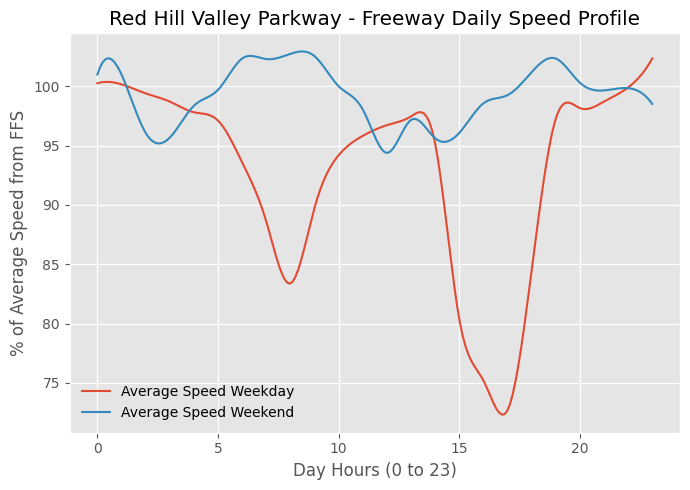

In [175]:
plt.style.use('ggplot')

figure(figsize=(7, 5), dpi=100)

# Assiging a value to the X
x = range(24)
x_interpol = np.linspace(0, 23, 200)

y_RHVP_FRWY_WD = ((ATS_WD_Hours.values / RED_HILL_VALLEY_PARKWAY_FRWY['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_RHVP_FRWY_WD)
y_RHVP_FRWY_WD = bspline(x_interpol)
#  Plot - RED_HILL_VALLEY_PARKWAY_FRWY
plt.plot(x_interpol, y_RHVP_FRWY_WD, label = 'Average Speed Weekday')

y_RHVP_FRWY_WN = ((ATS_WN_Hours.values / RED_HILL_VALLEY_PARKWAY_FRWY['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_RHVP_FRWY_WN)
y_RHVP_FRWY_WN = bspline(x_interpol)
#  Plot - RED_HILL_VALLEY_PARKWAY_FRWY
plt.plot(x_interpol, y_RHVP_FRWY_WN, label = 'Average Speed Weekend')

plt.xlabel('Day Hours (0 to 23)')
plt.ylabel('% of Average Speed from FFS')
plt.title('Red Hill Valley Parkway - Freeway Daily Speed Profile')

plt.legend(frameon = False, loc = 'lower left')
plt.tight_layout()

More and more data shows me that the congestion might not be where initially assumed at the beginning of this work.<br>
Initially, as a driver travelling in and around Toronto for work, one might think that the main congestion for the trucks will be on HWY 401 or QEW.<br> 
However, the dataset tries to tell that there are more things to uncover.

## Stage 3: Initial Results

### Removing Outliers using interquartile range (IQR)

Checking the columns with describe function.

In [101]:
df4.describe()

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
count,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000
mean,450.148965,2.256151,35.132972,58.414675,187.212674,20.688458,25.020786,24.682023,21.514634,0.634196,0.656034,0.578699,29.398892,32.361690,29.801159,14.377703,14.185648,12.842647,1.493165,1.390026,0.908475,13.154853,12.680494,12.774209,13.463085,14.792033,16.980431,19.358717,21.514898,23.381443,24.843819,25.455962,25.633718,25.503447,25.320059,24.493675,23.023769,21.138604,19.002225,17.584564,16.662785,15.982614,15.371389,14.669286,14.033075,8.760244,7.548370,7.057435,6.858375,7.166013,7.898751,8.820123,9.775541,10.516108,10.623716,10.662159,10.433316,10.189948,9.755363,9.371101,8.816136,8.491658,8.056705,7.633673,7.391779,7.088654,6.526030,6.316287,5.658971,0.004922
std,854.362487,0.797824,218.118051,15.153852,101.616393,29.876022,28.661689,29.097813,29.765881,1.532762,1.597925,1.655194,172.834325,179.374374,197.031189,22.989158,23.345982,23.698775,2.479590,2.386141,1.909132,27.026246,26.792174,26.901153,27.422545,28.088261,28.882065,29.211606,28.976656,28.701570,28.881297,29.008673,29.087739,29.211050,29.317581,29.343089,29.341189,29.279996,28.976681,28.805293,28.638957,28.415831,28.097546,27.715785,27.470987,23.733541,22.596133,22.001784,21.752502,22.156032,22.957359,23.822558,24.726856,25.328612,25.334878,25.288190,25.015540,24.803991,24.490229,24.218349,23.736302,23.522937,23.069425,22.592467,22.381850,22.068221,21.326551,21.072267,20.192725,0.009586
min,3.112000,1.000000,0.000000,5.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,84.675000,2.000000,0.000000,50.000000,89.814344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Calculating Q1 and Q2 for each column where possible outliers might be located. Starting with free flow speed (FFS).

Steps will be explained for the first attribute, and later same procedure will be applied to all the attributes with the outliers.<br>
Finding first and third quartiles.

In [102]:
Q1_FFS = df4.FFS.quantile(0.25)
Q3_FFS = df4.FFS.quantile(0.75)
Q1_FFS, Q3_FFS

(0.0, 40.0)

In [103]:
IQR_FFS = Q3_FFS - Q1_FFS
IQR_FFS

40.0

Check for Upper Limit where it can be cut off and considered an Outlier.

In [104]:
upp_lim_FFS = Q3_FFS + 1.5 * IQR_FFS
upp_lim_FFS

100.0

Which one of those datapoints is an outlier for FFS?

In [105]:
df4[df4.FFS > upp_lim_FFS].sample(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
9782,828.773,2,Arterial,0,50,NASH ROAD,77.069390,103,99,95,105,1.04,1.08,1.00,1,3,0,97,86,0,1.02,1.10,0.00,0,0,0,0,0,0,103,0,96,103,0,94,103,26,0,0,105,85,0,0,0,0,0,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,0,0,0,0,0,0,0,0,0,0.010091
94613,2052.527,2,Arterial,3,80,GREY ROAD 3,164.356059,103,82,85,85,1.26,1.21,1.21,9,7,7,56,78,84,1.46,1.09,1.01,0,0,0,0,89,77,68,92,85,91,91,89,92,89,83,86,82,87,0,0,0,0,0,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,0,0,0,0.018813
96139,1851.497,2,Arterial,3,80,GREY ROAD 3,168.147045,105,83,83,85,1.27,1.27,1.24,9,9,8,63,62,77,1.32,1.34,1.10,0,105,0,0,82,82,87,79,80,79,83,82,88,89,79,85,90,78,84,0,0,0,0,0,0,0,0,0,0,0,82,0,0,0,100,0,0,0,0,0,0,76,0,0,0,0,0,0,0.016842
24401,588.189,2,Arterial,42,80,COUNTY ROAD 42,76.747726,111,70,79,87,1.59,1.41,1.28,19,13,9,66,71,83,1.06,1.11,1.05,0,111,0,0,0,0,0,66,74,50,84,100,92,61,0,93,71,74,0,0,0,80,0,0,0,0,0,0,0,0,0,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.007204
286943,1052.179,2,Arterial,84,90,ZURICH HENSALL ROAD,83.605091,101,96,96,97,1.05,1.05,1.04,2,2,1,79,84,84,1.22,1.14,1.15,102,101,104,100,100,97,96,97,96,93,93,83,84,91,97,94,99,96,100,100,98,97,99,103,95,98,0,0,0,0,92,91,100,92,106,0,98,100,101,0,0,0,0,97,0,0,0,0,0.012929
3044,1393.691,2,Arterial,30,80,YORK DURHAM LINE,336.199152,101,74,71,0,1.36,1.42,0.00,13,15,0,58,68,0,1.28,1.04,0.00,0,0,0,0,0,0,80,68,74,71,85,88,90,71,86,69,0,75,56,0,0,79,0,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.013064
216771,616.789,2,Collector,0,50,CONLINS ROAD,336.693589,102,83,92,105,1.23,1.11,1.00,8,4,0,23,52,96,3.61,1.77,1.09,105,103,101,0,0,105,81,103,78,94,86,97,102,81,93,79,100,105,78,100,0,105,101,100,0,0,0,105,0,0,0,0,0,0,0,0,0,0,100,0,0,105,0,0,0,0,0,0,0.005771
62288,1893.372,2,Freeway,401,100,HIGHWAY 401,229.860755,101,100,99,101,1.01,1.02,1.00,0,1,0,94,93,95,1.06,1.06,1.06,101,100,101,101,101,101,101,100,99,101,101,100,101,100,100,97,100,100,101,101,100,100,101,101,101,102,102,100,100,99,101,101,101,101,102,101,102,102,102,101,101,101,102,100,101,101,100,99,0.019939
208727,1388.113,2,Arterial,5,80,OXFORD ROAD 5,359.232200,103,79,87,82,1.30,1.18,1.26,11,6,9,55,79,76,1.44,1.10,1.08,0,103,0,0,0,0,86,79,81,68,86,89,88,88,85,90,84,0,0,0,71,0,0,0,0,0,0,0,0,82,0,76,0,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.012500
236037,3171.280,2,Local / Street,0,80,1ST LINE NASSAGAWEYA,312.217293,101,73,75,84,1.38,1.35,1.20,14,12,7,43,12,56,1.70,6.25,1.50,108,105,0,102,100,103,98,93,52,82,89,79,83,77,89,90,70,80,97,90,100,100,100,100,0,0,0,0,0,55,92,0,100,83,0,101,0,2,101,0,0,108,102,97,0,0,0,0,0.033184


#### Dataframe df4c will be used to store the cleaned version of the dataset.

In [111]:
df4c = df4[df4.FFS < 100]

In [112]:
df4c.shape

(286351, 72)

Checking all the labels in Dataframe df4c.

In [113]:
df4c.columns

Index(['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM', 'FULLNAME',
       'AZIMUTH', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM',
       'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN',
       'BTI_AM', 'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02',
       'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08',
       'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14',
       'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20',
       'ATS_WD21', 'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02',
       'ATS_WN03', 'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08',
       'ATS_WN09', 'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14',
       'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20',
       'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length'],
      dtype='object')

---
### Converting zeros to NaN so I can work on them further to clean the dataset.
---

In [114]:
df5c = df4c.replace(0, np.nan)

Keeping the rows where 60% of columns have a value not equal to zero (NaN) in the dataframe df5cc.

In [115]:
df5cc = df5c.dropna(thresh=44)
df5cc.shape

(70775, 72)

Replacing the NaN values with Zeros.

In [116]:
df6c = df5cc.fillna(0)

In [117]:
df6c.sample(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
43705,1557.909,2,Freeway,24.0,100,HIGHWAY 403,261.356261,98.0,98.0,99.0,100.0,1.00,1.00,1.00,0.0,0.0,0.0,89.0,89.0,91.0,1.10,1.11,1.10,96.0,98.0,98.0,99.0,98.0,98.0,98.0,97.0,99.0,99.0,99.0,99.0,99.0,97.0,99.0,99.0,99.0,98.0,98.0,98.0,99.0,98.0,99.0,98.0,99.0,99.0,99.0,101.0,99.0,100.0,100.0,99.0,101.0,99.0,99.0,100.0,100.0,100.0,97.0,99.0,97.0,98.0,102.0,101.0,103.0,101.0,104.0,100.0,0.018975
92977,229.381,4,Arterial,0.0,60,BARTON STREET,105.947979,28.0,25.0,22.0,28.0,1.12,1.27,1.00,15.0,35.0,0.0,5.0,2.0,4.0,5.00,11.00,7.00,29.0,27.0,22.0,24.0,17.0,23.0,30.0,30.0,28.0,26.0,26.0,29.0,20.0,25.0,28.0,22.0,28.0,23.0,18.0,24.0,27.0,33.0,31.0,30.0,37.0,47.0,0.0,51.0,0.0,0.0,31.0,0.0,51.0,16.0,0.0,42.0,30.0,20.0,35.0,51.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.002736
94268,1368.305,2,Arterial,9.0,80,MELBOURNE ROAD,126.430553,88.0,80.0,87.0,90.0,1.10,1.01,1.00,4.0,0.0,0.0,52.0,65.0,79.0,1.54,1.34,1.14,88.0,87.0,0.0,98.0,85.0,94.0,71.0,85.0,88.0,86.0,85.0,87.0,90.0,87.0,81.0,96.0,83.0,88.0,78.0,91.0,88.0,0.0,77.0,98.0,72.0,0.0,85.0,0.0,100.0,0.0,87.0,91.0,0.0,0.0,0.0,79.0,90.0,0.0,92.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,46.0,0.0,0.014695
112279,323.880,2,Arterial,31.0,80,BANK STREET,119.950928,78.0,76.0,80.0,79.0,1.03,1.00,1.00,1.0,0.0,0.0,66.0,69.0,77.0,1.15,1.16,1.03,0.0,82.0,80.0,78.0,79.0,86.0,80.0,87.0,84.0,73.0,80.0,82.0,80.0,71.0,78.0,82.0,76.0,78.0,82.0,80.0,87.0,79.0,69.0,0.0,0.0,0.0,0.0,80.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,80.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.003693
262430,3051.545,2,Expressway / Highway,71.0,80,HIGHWAY 71,31.399813,93.0,90.0,94.0,92.0,1.03,1.00,1.01,1.0,0.0,0.0,79.0,69.0,72.0,1.14,1.36,1.28,96.0,93.0,100.0,94.0,92.0,88.0,95.0,89.0,90.0,92.0,92.0,91.0,94.0,94.0,97.0,96.0,94.0,92.0,91.0,93.0,95.0,92.0,95.0,86.0,90.0,98.0,0.0,92.0,0.0,0.0,98.0,99.0,93.0,86.0,91.0,91.0,92.0,94.0,93.0,80.0,99.0,94.0,86.0,0.0,94.0,93.0,103.0,81.0,0.030259
35445,348.118,3,Arterial,0.0,50,PROVINCIAL ROAD,299.234415,46.0,34.0,21.0,20.0,1.35,2.19,2.30,28.0,93.0,102.0,6.0,3.0,11.0,5.67,7.00,1.82,46.0,43.0,51.0,38.0,46.0,47.0,43.0,35.0,32.0,29.0,25.0,25.0,21.0,20.0,19.0,22.0,23.0,27.0,32.0,32.0,47.0,37.0,45.0,49.0,62.0,37.0,0.0,29.0,46.0,51.0,0.0,48.0,34.0,21.0,36.0,18.0,18.0,24.0,13.0,19.0,53.0,0.0,0.0,31.0,51.0,35.0,68.0,0.0,0.003869
53333,1235.992,2,Freeway,417.0,100,HIGHWAY 417,60.101247,96.0,98.0,101.0,99.0,1.00,1.00,1.00,0.0,0.0,0.0,85.0,97.0,82.0,1.15,1.04,1.21,95.0,98.0,94.0,93.0,94.0,91.0,94.0,96.0,100.0,100.0,96.0,101.0,101.0,101.0,100.0,101.0,102.0,102.0,99.0,99.0,96.0,101.0,99.0,99.0,101.0,86.0,100.0,86.0,99.0,98.0,100.0,100.0,102.0,102.0,95.0,98.0,100.0,84.0,89.0,99.0,105.0,105.0,104.0,105.0,103.0,103.0,103.0,93.0,0.014114
162508,2046.281,2,Arterial,14.0,80,GREY ROAD 14,167.716806,88.0,88.0,91.0,88.0,1.00,1.00,1.00,0.0,0.0,0.0,72.0,77.0,73.0,1.22,1.18,1.21,91.0,0.0,86.0,89.0,88.0,89.0,90.0,87.0,81.0,94.0,83.0,79.0,90.0,92.0,85.0,89.0,89.0,94.0,92.0,73.0,72.0,65.0,0.0,83.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,89.0,0.0,0.0,0.0,105.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018627
196811,510.135,2,Arterial,27.0,80,COUNTY ROAD 27 EAST,235.816176,51.0,47.0,52.0,39.0,1.09,1.00,1.31,6.0,0.0,22.0,18.0,35.0,10.0,2.61,1.49,3.90,0.0,54.0,0.0,0.0,53.0,55.0,49.0,44.0,48.0,54.0,49.0,54.0,52.0,42.0,43.0,57.0,44.0,59.0,55.0,68.0,59.0,53.0,40.0,0.0,51.0,56.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,10.0,0.0,0.0,80.0,72.0,64.0,0.0,0.0,0.0,0.0,

---
Creating sub_dataframes without object fields.<br>
Later sub_dataframe can be used in a box plot where outliers can be checked for each field.<br>
FFS is not included in this check, as it was already checked and cleaned.

In [118]:
df4c_sub1 = df6c[['LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'ATS_AM', 'ATS_PM', 'ATS_WN']]
df4c_sub2 = df6c[['TTI_AM', 'TTI_PM', 'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN']]
df4c_sub3 = df6c[['P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM', 'BTI_PM', 'BTI_WN', 'ATS_WD00']]
df4c_sub4 = df6c[['ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07']]
df4c_sub5 = df6c[['ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14']]
df4c_sub6 = df6c[['ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21']]
df4c_sub7 = df6c[['ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04']]
df4c_sub8 = df6c[['ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09', 'ATS_WN10', 'ATS_WN11']]
df4c_sub9 = df6c[['ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18']]
df4c_sub10 = df6c[['ATS_WN19', 'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

---
Looking at the box plot below, <br>
ATS_AM (link level average travel speed during AM peak) and<br> 
ATS_PM (link level average travel speed during PM peak) also have an outlier.<br>
Data for ATS_AM  and ATS_PM can be safely cut off where the value is more than 120km/hr.<br>
Another important observation from putting those three ATS together is that the average travel time in the morning (ATS_AM) has 50% percentile lower than all the ATS_PM and ATS_WN (which is for the weekend) and has the smallest median.<br>
Also, even if ATS_PM and ATS_WN have nearly the same box plot, the median speed on weekends was higher than in the ATS_PM.<br>

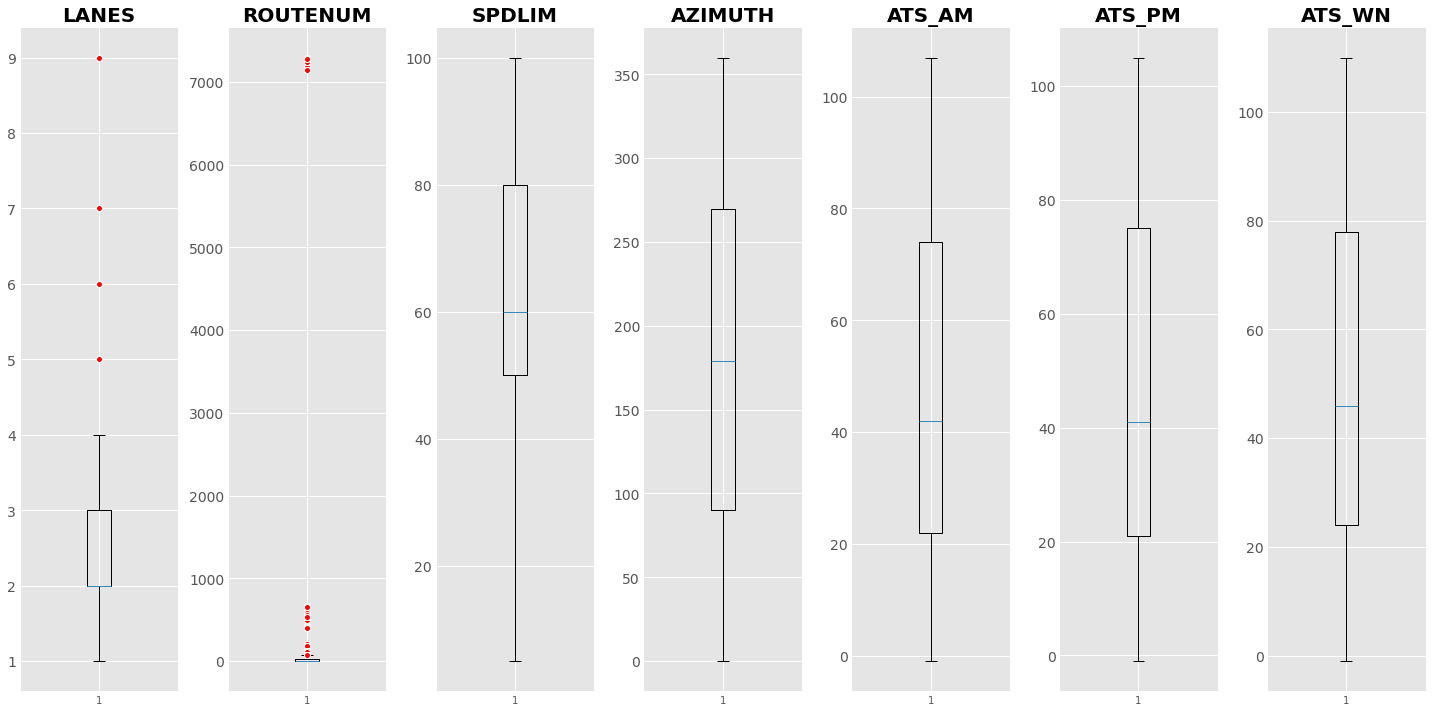

In [119]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub1.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub1.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub1.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Below is an excellent example where the Travel Time Index (TTI) has a lot of outliers.<br>
It is unrealistic to have TTI be more than ten. I used a logarithmic scale for TTI to better visualize the box plot.<br>
The Travel Time Index is the ratio of the travel time during the pick of the travel time (when the congestion is the worst) to the Free-flow travel time.<br>
Having a TTI higher than ten means that during congestion, truck travel time was ten times longer than during a free flow travel time.<br> 
ATS_WN will use the same rules for the speed, and anything above 120km/hr will be considered an outlier.<br> 
DI_AM, DI_PM, DI_WN - represents the Delay Index for AM, PM and Weekend (WN).<br> 
Delay Index (DI) measured in seconds and 3500 seconds are around 58 minutes and sound more or less realistic.<br> 
DI fields will not be prioritized while cleaning the dataset from outliers.

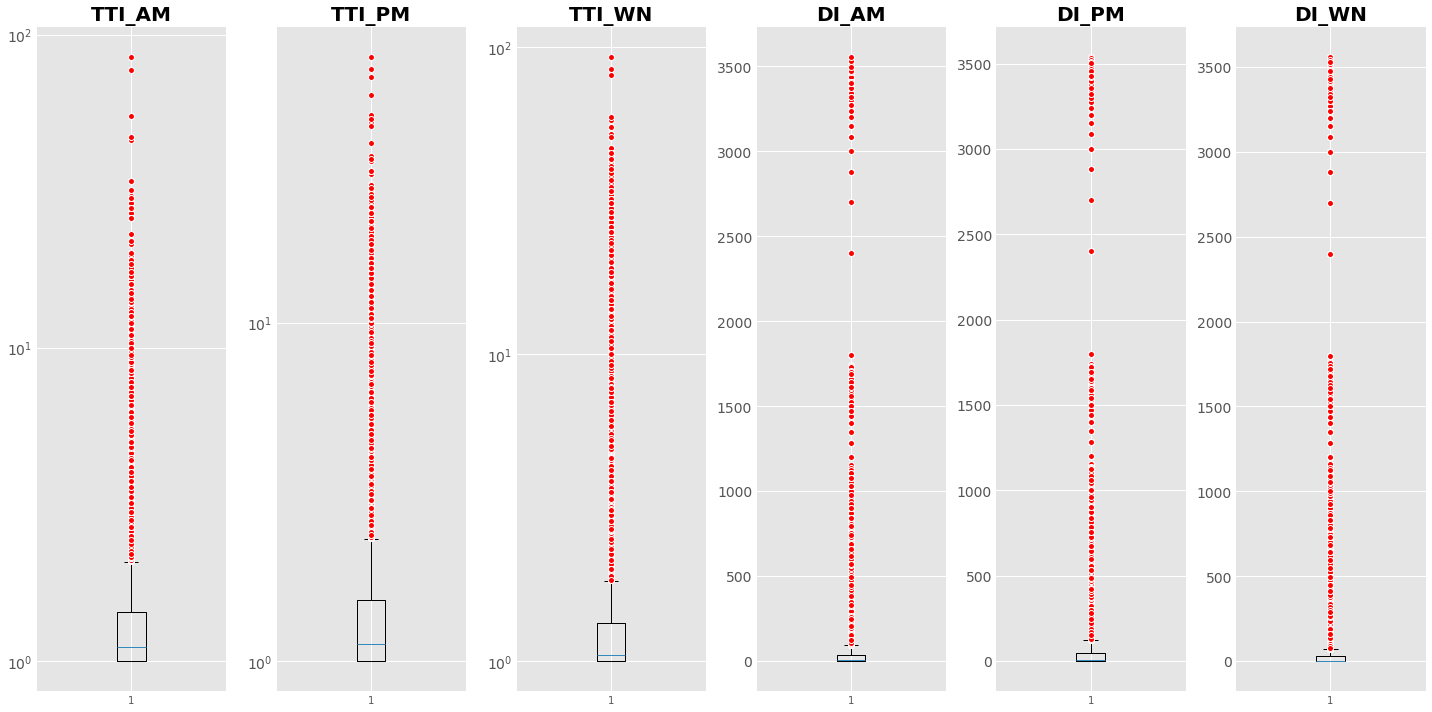

In [154]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub2.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub2.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub2.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
    if df4c_sub2.columns[i] == 'TTI_AM' or df4c_sub2.columns[i] == 'TTI_PM' or df4c_sub2.columns[i] == 'TTI_WN':
        ib.semilogy()
    
plt.tight_layout()

---
The buffer time index (BTI) here shows the relationship between the 95th percentile and the average travel time.<br>
If the data is correct for average travel time (ATS_...), dividing it by the 95th percentile gives the values shown outside the box plot on BTI.<br>
At this point, there is not enough evidence to rule that those represent outliers.<br>

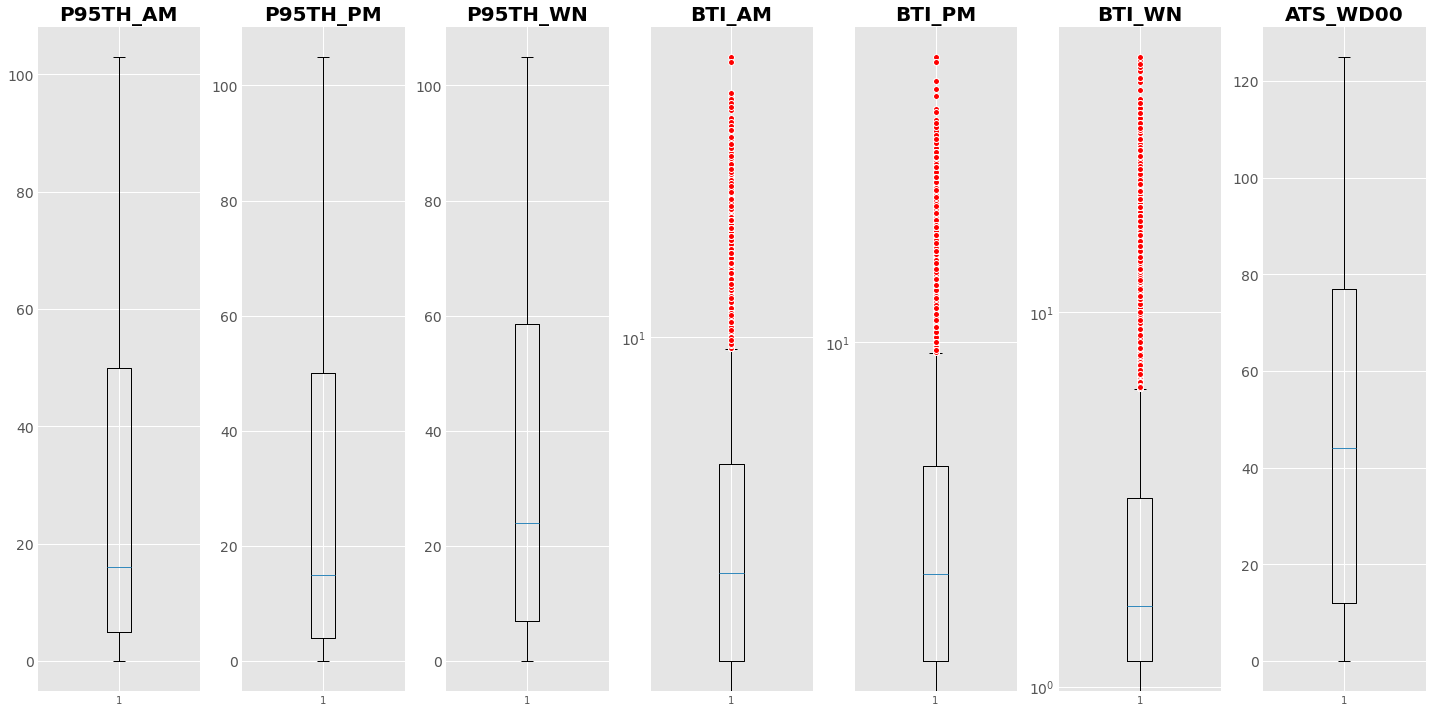

In [120]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub3.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub3.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub3.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
    if df4c_sub3.columns[i] == 'BTI_AM' or df4c_sub3.columns[i] == 'BTI_PM' or df4c_sub3.columns[i] == 'BTI_WN':
        ib.semilogy()
    
plt.tight_layout()

---
ATS_WD05 and ATS_WD06 show clear outliers on top of the box plot.

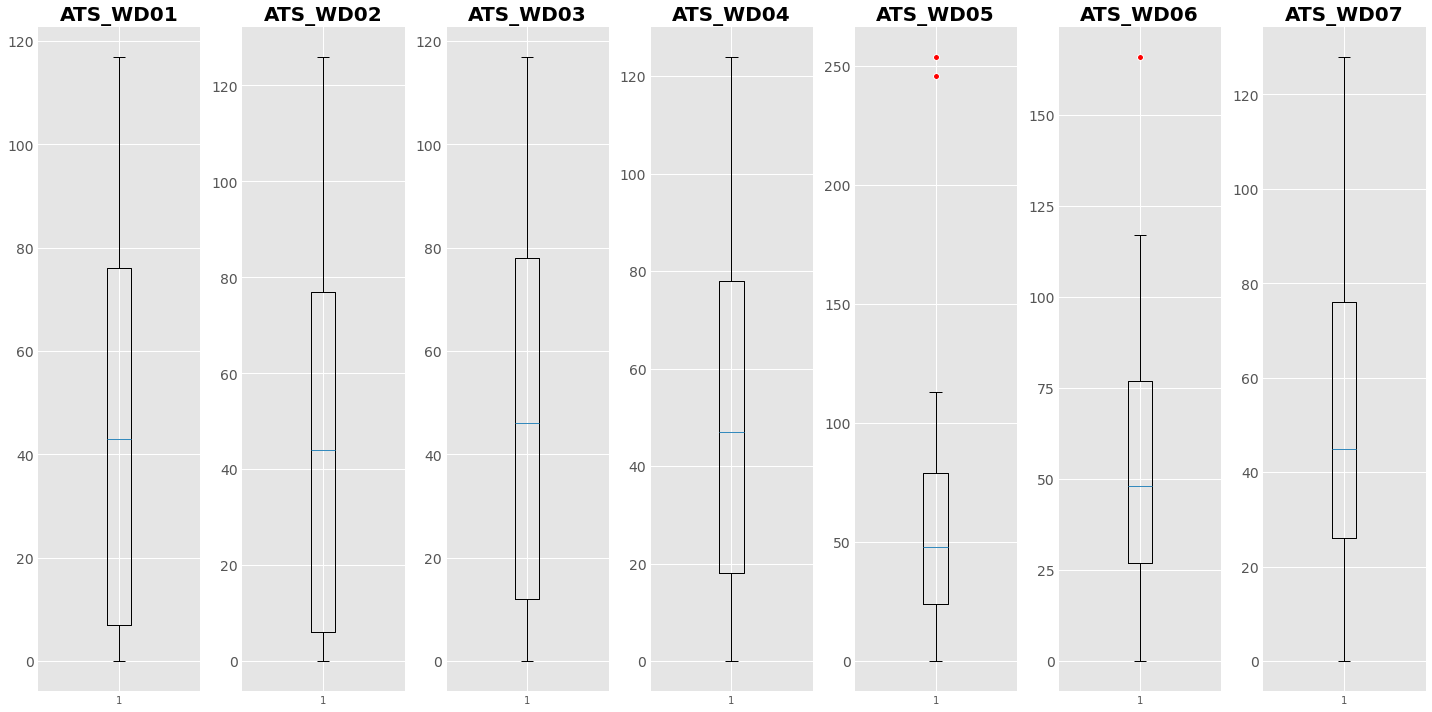

In [121]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub4.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub4.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub4.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
The same line of codes was run before removing the rows majority of columns populated with Zeros.<br> 
Before cleaning below parameters indicated far more outliers than it is now.<br> 
Cleaning rows populated mainly with zeros also cleaned the rows where ATS were populated with erroneous data.

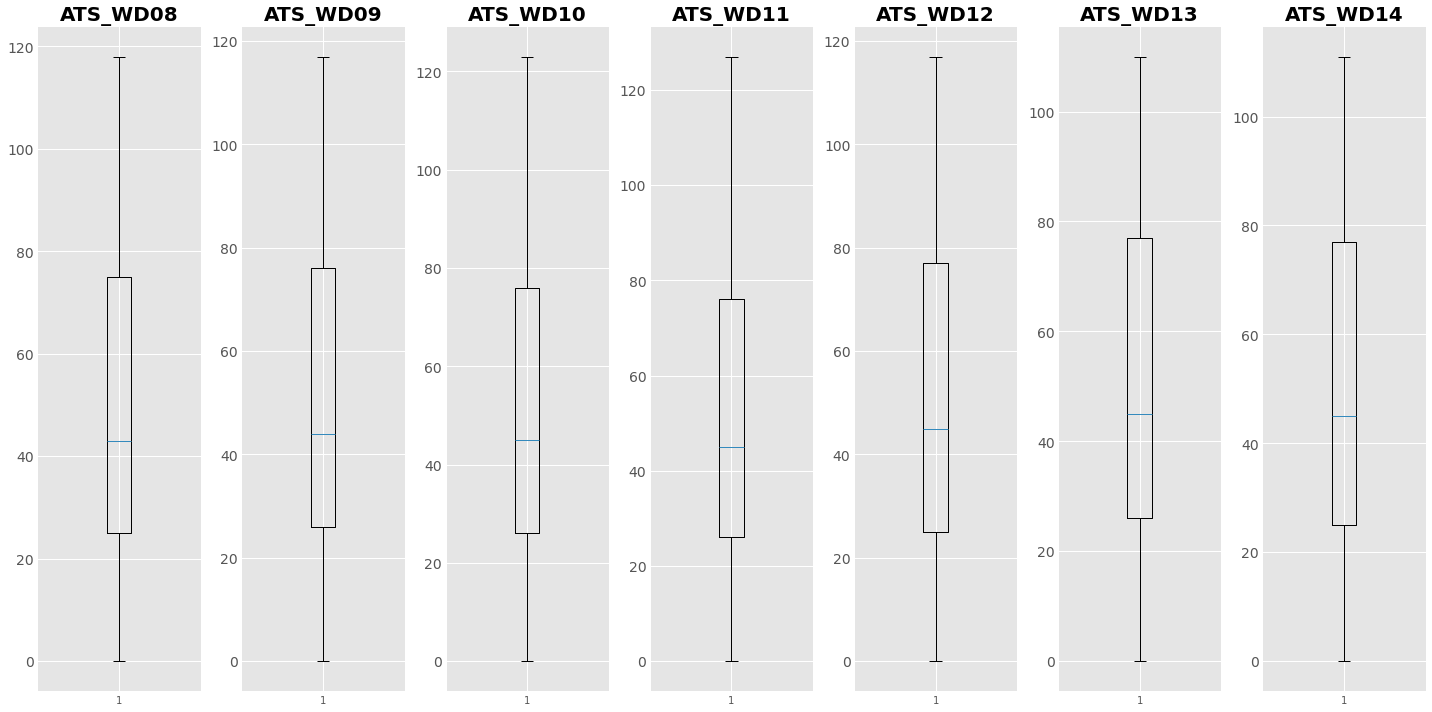

In [122]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub5.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub5.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub5.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
ATS_WD19, ATS_WD20 and ATS_WD21 have few outliers.

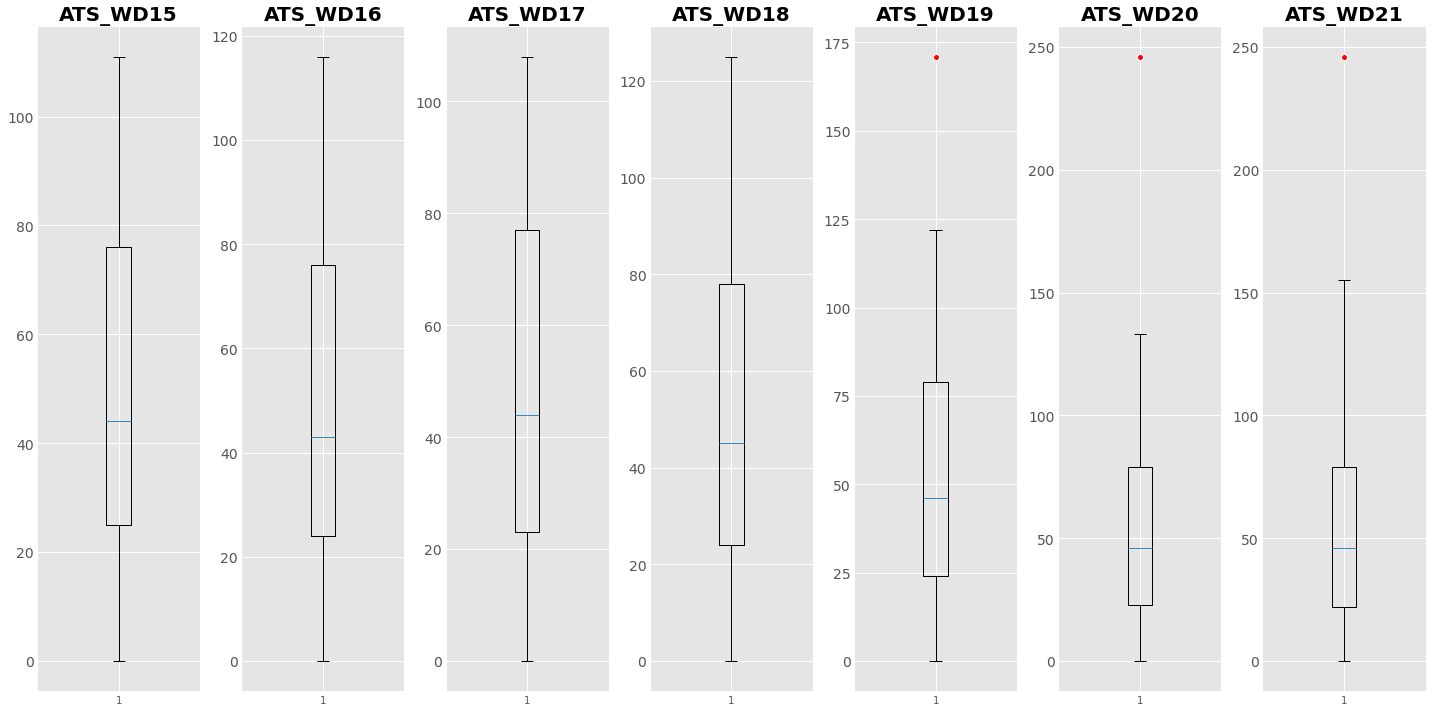

In [123]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub6.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub6.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub6.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Same for ATS_WD22

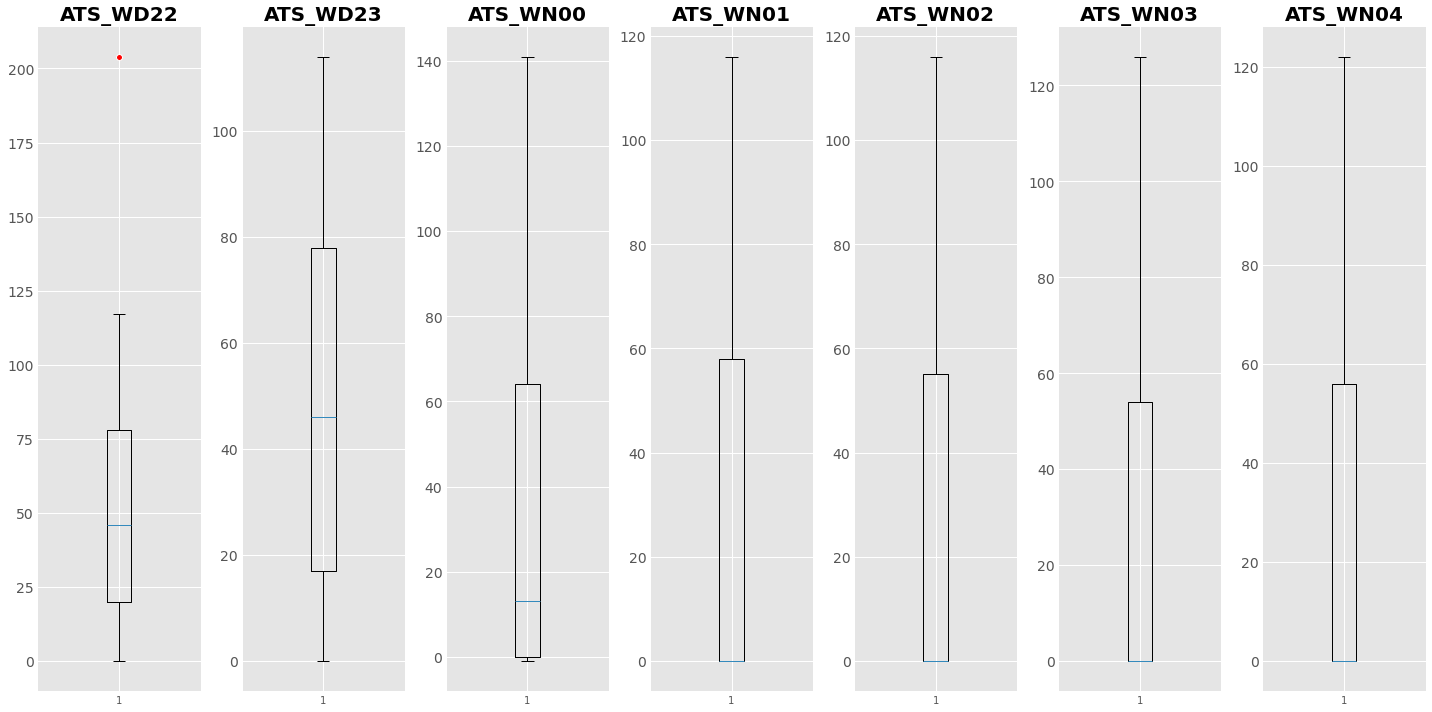

In [124]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub7.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub7.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub7.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
ATS_WN07 has to be cleaned as well.

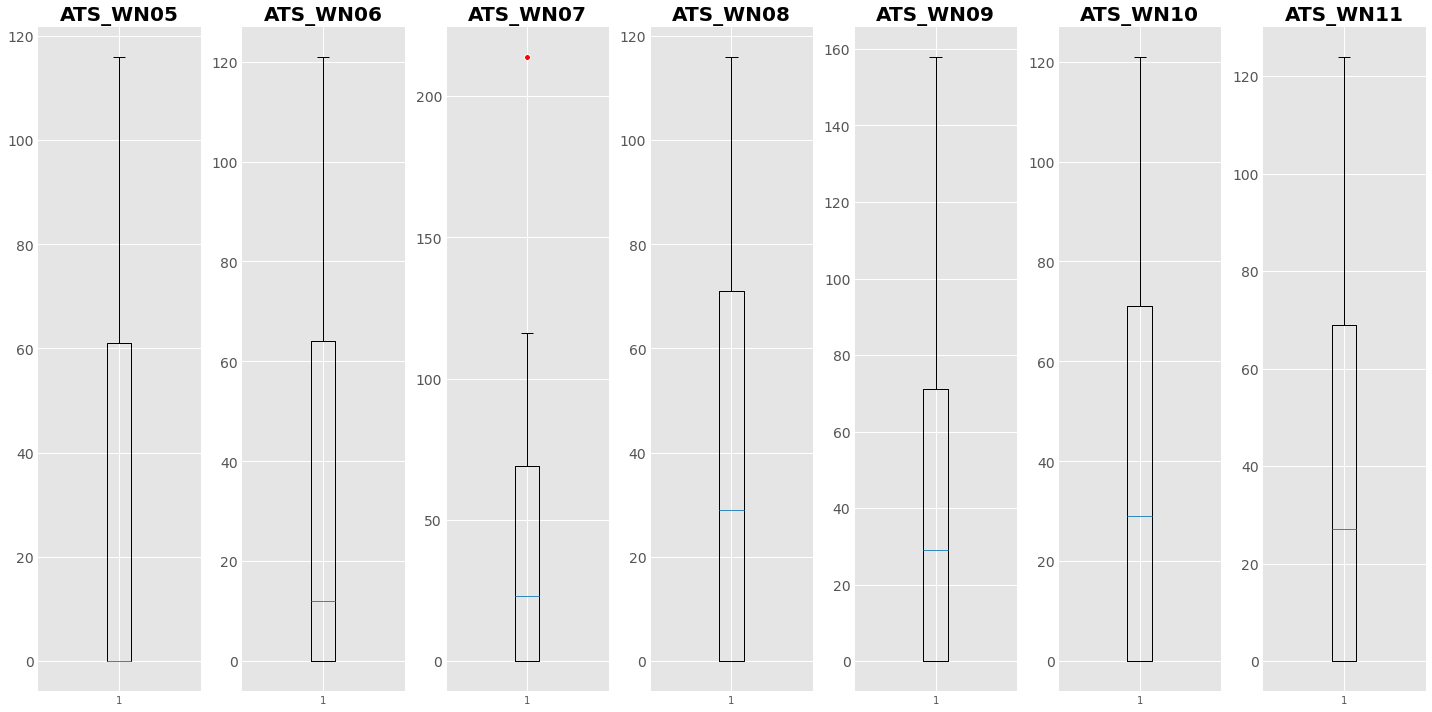

In [125]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub8.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub8.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub8.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Having data point at a speed of over 200km/hr for ATS_WN12 is unrealistic and can easily be considered junk data points.

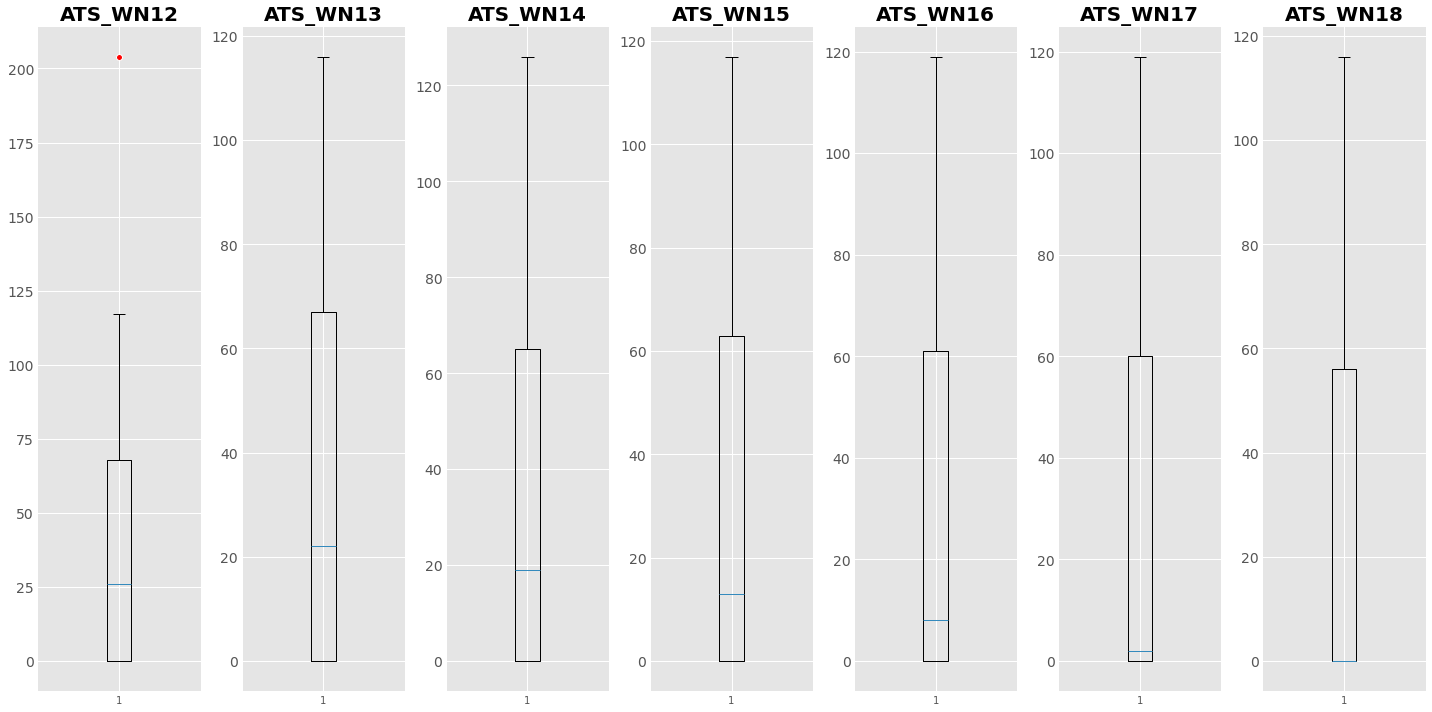

In [127]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub9.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub9.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub9.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Need to check where those high speeds are plotted in the ATS_WN23 box plot.<br> 
If, for example, mainly trucks were driven on city roads at that time of the day, for that reason, this box plot has a lover value 50th percentile, but few were travelling on an empty highway late evening on the weekend.<br>
Those speed data might be real-world data from a truck.

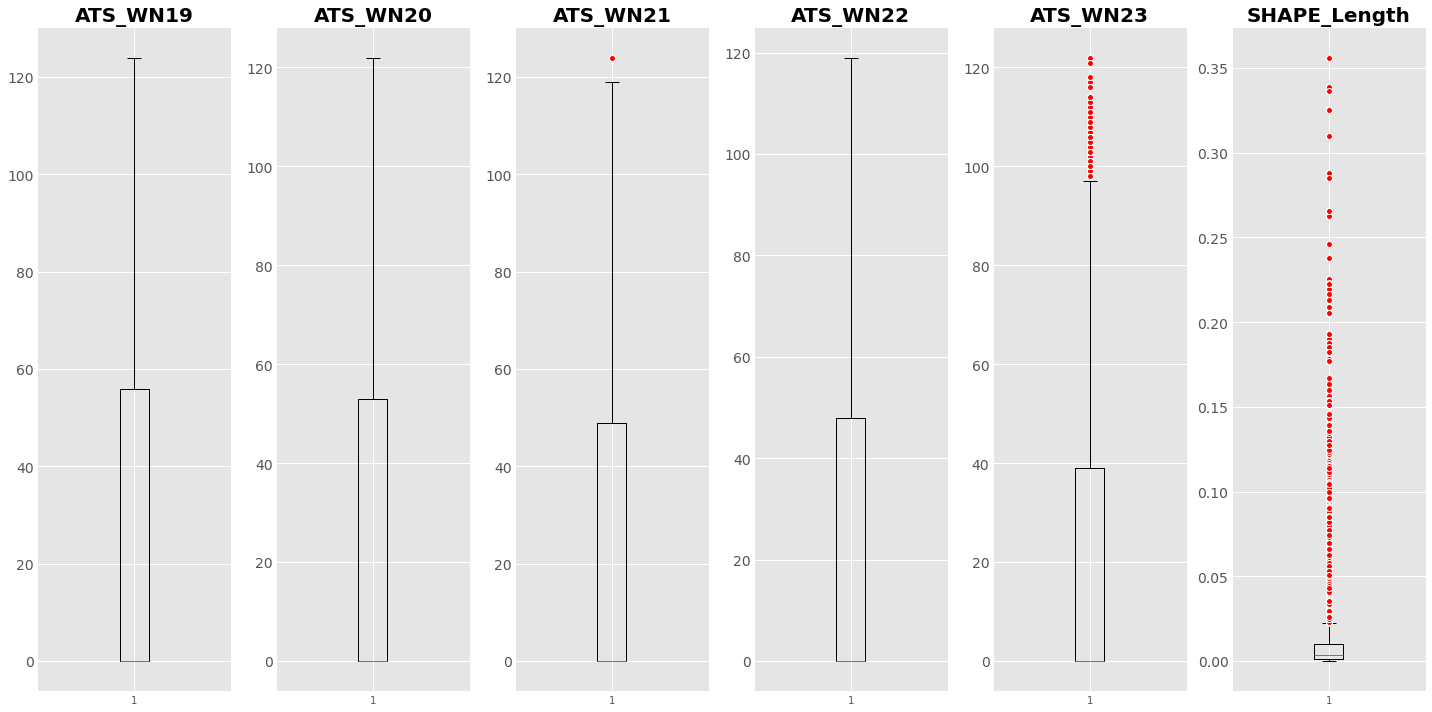

In [129]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub10.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub10.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub10.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

### Removing outliers from Travel Time Index (TTI) using the interquartile range (IQR).

In [130]:
TTI_AM_Q1 = df6c.TTI_AM.quantile(0.25)
TTI_AM_Q3 = df6c.TTI_AM.quantile(0.75)
TTI_AM_Q1, TTI_AM_Q3

(1.0, 1.43)

Calculating IQR

In [131]:
IQR_TTI_AM = TTI_AM_Q3 - TTI_AM_Q1
IQR_TTI_AM

0.42999999999999994

Finding the upper limit, and later that value will be used as a cut-off point. Anything above will be considered an outlier.

In [132]:
TTI_AM_Upper_limit = TTI_AM_Q3 + 1.5 * IQR_TTI_AM
TTI_AM_Lower_limit = TTI_AM_Q1 - 1.5 * IQR_TTI_AM
TTI_AM_Lower_limit, TTI_AM_Upper_limit

(0.3550000000000001, 2.0749999999999997)

As shown below, there are 7114 records which fall above the upper limit and are considered an outlier.

In [133]:
df6c.TTI_AM[(df6c.TTI_AM > TTI_AM_Upper_limit)].count()

6920

It is unrealistic for a truck to have a TTI of lower than 0.37 (TTI_AM_Lower_limit). Those below TTI_AM_Lower_limit will also be removed as erroneous data.

In [134]:
df6c.TTI_AM[(df6c.TTI_AM < TTI_AM_Lower_limit)].count()

112

Populating a new data frame with outliers removed with TTI_AM. 

In [135]:
df7 = df6c[(df6c.TTI_AM > TTI_AM_Lower_limit) & (df6c.TTI_AM < TTI_AM_Upper_limit)]

Finding quartiles, calculating IQR and identifying the Upper and Lower limits of TTI_PM and TTI_WN.

In [136]:
TTI_PM_Q1 = df6c.TTI_PM.quantile(0.25)
TTI_PM_Q3 = df6c.TTI_PM.quantile(0.75)
TTI_PM_Q1, TTI_PM_Q3

(1.0, 1.52)

In [137]:
IQR_TTI_PM = TTI_PM_Q3 - TTI_PM_Q1
IQR_TTI_PM

0.52

In [138]:
TTI_PM_Upper_limit = TTI_PM_Q3 + 1.5 * IQR_TTI_PM
TTI_PM_Lower_limit = TTI_PM_Q1 - 1.5 * IQR_TTI_PM
TTI_PM_Lower_limit, TTI_PM_Upper_limit

(0.21999999999999997, 2.3)

The numbers below show that if the Upper and Lower limits are applied to the older data frame named df6c, there are 7096 and 120 records, correspondingly.

In [139]:
df6c.TTI_PM[(df6c.TTI_PM > TTI_PM_Upper_limit)].count()

7067

In [101]:
df6c.TTI_PM[(df6c.TTI_PM < TTI_PM_Lower_limit)].count()

120

The numbers with the new data frame where TTI_AM outliers have already been removed.

In [140]:
df7.TTI_PM[(df7.TTI_PM > TTI_PM_Upper_limit)].count()

3835

In [141]:
df7.TTI_PM[(df7.TTI_PM < TTI_PM_Lower_limit)].count()

24

Nearly half of the outliers from TTI_PM were already removed while cleaning for TTI_AM.

In [142]:
df7 = df7[(df7.TTI_PM > TTI_PM_Lower_limit) & (df7.TTI_PM < TTI_PM_Upper_limit)]

The same is done for TTI_WN.

In [143]:
TTI_WN_Q1 = df6c.TTI_WN.quantile(0.25)
TTI_WN_Q3 = df6c.TTI_WN.quantile(0.75)
TTI_WN_Q1, TTI_WN_Q3

(1.0, 1.33)

In [144]:
IQR_TTI_WN = TTI_WN_Q3 - TTI_WN_Q1
IQR_TTI_WN

0.33000000000000007

In [145]:
TTI_WN_Upper_limit = TTI_WN_Q3 + 1.5 * IQR_TTI_WN
TTI_WN_Lower_limit = TTI_WN_Q1 - 1.5 * IQR_TTI_WN
TTI_WN_Lower_limit, TTI_WN_Upper_limit

(0.5049999999999999, 1.8250000000000002)

In [146]:
df6c.TTI_WN[(df6c.TTI_WN > TTI_WN_Upper_limit)].count()

8631

In [147]:
df6c.TTI_WN[(df6c.TTI_WN < TTI_WN_Lower_limit)].count()

333

In [148]:
df7.TTI_WN[(df7.TTI_WN > TTI_WN_Upper_limit)].count()

3784

In [149]:
df7.TTI_WN[(df7.TTI_WN < TTI_WN_Lower_limit)].count()

105

In [150]:
df7 = df7[(df7.TTI_WN > TTI_WN_Lower_limit) & (df7.TTI_WN < TTI_WN_Upper_limit)]

55,954 rows left in the dataset after clearing the outliers related to TTI from the data.

In [151]:
df7.shape

(55954, 72)

Comparing the boxplot before and after cleaning from outliers TTI and Delay Index (DI).

In [152]:
df7_sub = df7[['TTI_AM', 'TTI_PM', 'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN']]

Clearing the erroneous data from TTI also removed the outliers from DI.<br>
After clearing the TTI, it no longer requires a logarithmic scale for presenting the boxplot. 

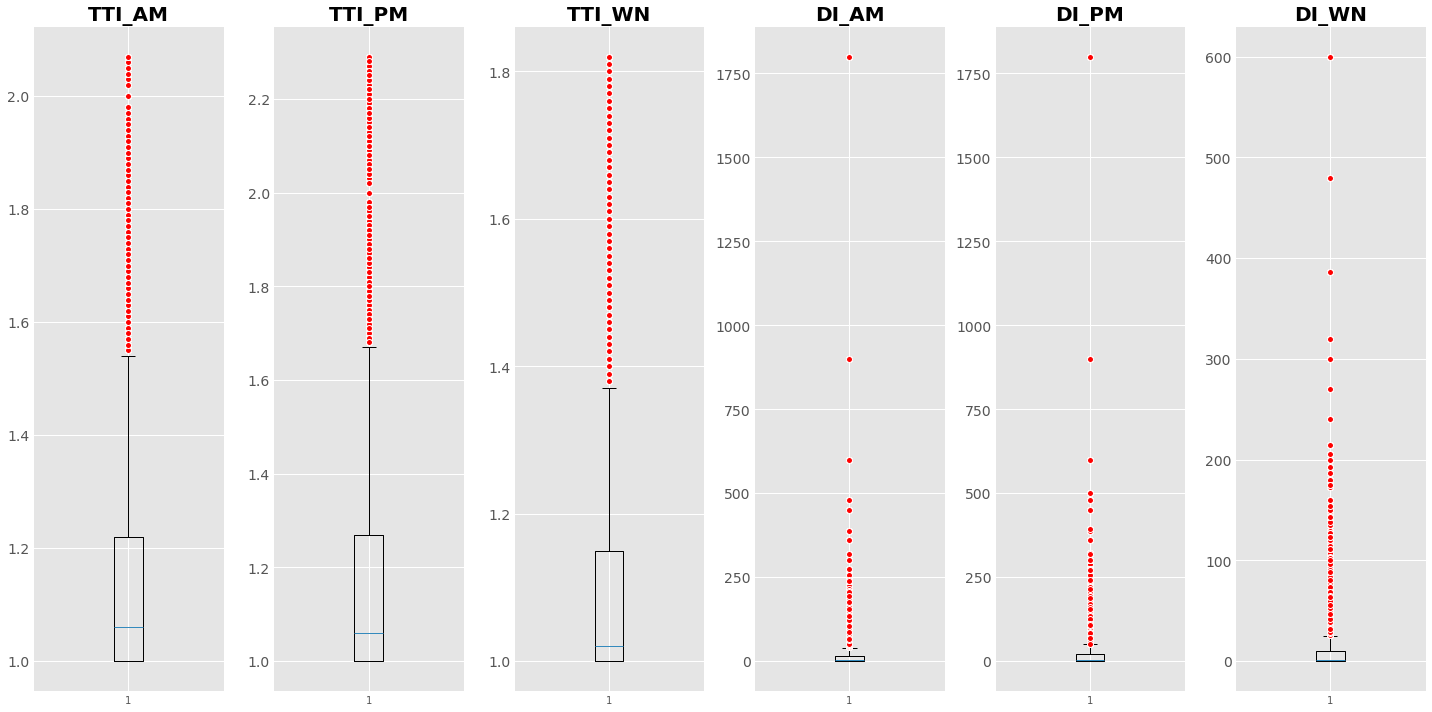

In [153]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df7_sub.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df7_sub.iloc[:,i], flierprops = red_circ)
    ib.set_title(df7_sub.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

### Checking a few more points where the speed is higher than 120 (possible outliers).

In [155]:
ATS_WD05_out = df7.ATS_WD05[df7.ATS_WD05 > 120].count()
ATS_WD06_out = df7.ATS_WD06[df7.ATS_WD06 > 120].count()
ATS_WD19_out = df7.ATS_WD19[df7.ATS_WD19 > 120].count()
ATS_WD20_out = df7.ATS_WD20[df7.ATS_WD20 > 120].count()
ATS_WD21_out = df7.ATS_WD21[df7.ATS_WD21 > 120].count()
ATS_WD22_out = df7.ATS_WD22[df7.ATS_WD22 > 120].count()
ATS_WN07_out = df7.ATS_WN07[df7.ATS_WN07 > 120].count()
ATS_WN12_out = df7.ATS_WN12[df7.ATS_WN12 > 120].count()

print('ATS_WD05 > 120km/hr:', ATS_WD05_out)
print('ATS_WD06 > 120km/hr:', ATS_WD06_out)
print('ATS_WD19 > 120km/hr:', ATS_WD19_out)
print('ATS_WD20 > 120km/hr:', ATS_WD20_out)
print('ATS_WD21 > 120km/hr:', ATS_WD21_out)
print('ATS_WD22 > 120km/hr:', ATS_WD22_out)
print('ATS_WN07 > 120km/hr:', ATS_WN07_out)
print('ATS_WN12 > 120km/hr:', ATS_WN12_out)

ATS_WD05 > 120km/hr: 2
ATS_WD06 > 120km/hr: 1
ATS_WD19 > 120km/hr: 2
ATS_WD20 > 120km/hr: 2
ATS_WD21 > 120km/hr: 5
ATS_WD22 > 120km/hr: 0
ATS_WN07 > 120km/hr: 0
ATS_WN12 > 120km/hr: 1


Updating the data frame by removing unwanted records.

In [156]:
df7c = df7[df7['ATS_WD05'] < 120]
df7c = df7c[df7c['ATS_WD06'] < 120]
df7c = df7c[df7c['ATS_WD19'] < 120]
df7c = df7c[df7c['ATS_WD20'] < 120]
df7c = df7c[df7c['ATS_WD21'] < 120]
df7c = df7c[df7c['ATS_WN12'] < 120]

55,941 Rows and 72 Columns remaining in the data frame.

In [157]:
df7c.shape

(55941, 72)

In [158]:
df7c.sample(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
71308,208.825,2,Freeway,0.0,100,E C ROW EXPRESSWAY,85.279531,94.0,84.0,82.0,90.0,1.12,1.15,1.04,5.0,6.0,2.0,59.0,63.0,74.0,1.42,1.30,1.22,93.0,94.0,96.0,95.0,93.0,92.0,90.0,84.0,83.0,82.0,87.0,88.0,88.0,88.0,85.0,85.0,85.0,78.0,78.0,89.0,88.0,91.0,91.0,93.0,92.0,93.0,94.0,93.0,92.0,91.0,94.0,93.0,88.0,94.0,93.0,88.0,90.0,97.0,95.0,94.0,91.0,95.0,86.0,90.0,62.0,94.0,82.0,101.0,0.002524
48824,385.802,3,Freeway,401.0,100,HIGHWAY 401,256.486271,78.0,62.0,83.0,90.0,1.26,1.00,1.00,12.0,0.0,0.0,43.0,52.0,53.0,1.44,1.60,1.70,62.0,83.0,96.0,98.0,83.0,79.0,63.0,64.0,61.0,69.0,85.0,91.0,90.0,93.0,91.0,91.0,83.0,75.0,87.0,95.0,91.0,83.0,78.0,62.0,66.0,72.0,95.0,99.0,100.0,92.0,97.0,98.0,101.0,96.0,96.0,91.0,89.0,89.0,81.0,80.0,84.0,89.0,99.0,100.0,99.0,99.0,100.0,103.0,0.004684
7327,756.082,2,Arterial,20.0,50,HIGHWAY 20 WEST,89.373035,59.0,55.0,58.0,57.0,1.07,1.02,1.04,4.0,1.0,2.0,41.0,42.0,45.0,1.34,1.38,1.27,72.0,0.0,0.0,52.0,58.0,51.0,56.0,54.0,55.0,52.0,50.0,56.0,55.0,56.0,59.0,56.0,58.0,60.0,59.0,62.0,60.0,55.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,58.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0,51.0,64.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009282
209583,1448.407,2,Arterial,18.0,80,MOUNT ELGIN ROAD,81.271742,66.0,46.0,42.0,48.0,1.43,1.57,1.38,24.0,31.0,20.0,11.0,3.0,21.0,4.18,14.00,2.29,0.0,0.0,66.0,66.0,71.0,60.0,46.0,40.0,50.0,54.0,52.0,58.0,64.0,53.0,51.0,36.0,45.0,58.0,69.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,71.0,71.0,76.0,39.0,60.0,17.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017586
51292,787.800,1,Ramp,0.0,50,HIGHWAY 417,91.111056,90.0,58.0,91.0,93.0,1.55,1.00,1.00,22.0,0.0,0.0,5.0,66.0,74.0,11.60,1.38,1.26,97.0,89.0,97.0,84.0,89.0,90.0,82.0,44.0,41.0,70.0,88.0,88.0,94.0,91.0,94.0,93.0,88.0,91.0,80.0,90.0,96.0,98.0,102.0,82.0,87.0,82.0,0.0,0.0,82.0,0.0,90.0,92.0,84.0,103.0,97.0,0.0,95.0,99.0,0.0,0.0,74.0,105.0,104.0,103.0,97.0,0.0,0.0,0.0,0.009997
23791,1069.618,2,Expressway / Highway,62.0,80,HIGHWAY 62,28.889137,88.0,80.0,85.0,84.0,1.10,1.04,1.05,4.0,1.0,2.0,56.0,71.0,73.0,1.43,1.20,1.15,89.0,0.0,0.0,0.0,0.0,85.0,78.0,78.0,80.0,76.0,78.0,84.0,87.0,85.0,85.0,86.0,82.0,86.0,82.0,0.0,87.0,84.0,88.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,85.0,87.0,0.0,82.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010476
64926,2460.071,2,Freeway,115.0,100,HIGHWAY 115,62.931652,97.0,93.0,98.0,97.0,1.04,1.00,1.00,2.0,0.0,0.0,78.0,87.0,85.0,1.19,1.13,1.14,97.0,97.0,97.0,96.0,97.0,97.0,93.0,96.0,91.0,91.0,97.0,95.0,99.0,98.0,99.0,99.0,98.0,96.0,100.0,99.0,99.0,99.0,97.0,97.0,93.0,95.0,101.0,100.0,96.0,88.0,96.0,101.0,95.0,97.0,101.0,100.0,98.0,99.0,99.0,102.0,96.0,101.0,88.0,102.0,94.0,99.0,94.0,93.0,0.028138
250089,668.494,2,Arterial,41.0,80,COUNTY ROAD 41,340.996639,86.0,85.0,80.0,89.0,1.01,1.08,1.00,0.0,3.0,0.0,62.0,45.0,70.0,1.37,1.78,1.27,93.0,89.0,85.0,91.0,89.0,82.0,82.0,88.0,84.0,87.0,82.0,79.0,82.0,81.0,85.0,76.0,81.0,82.0,94.0,86.0,92.0,85.0,101.0,75.0,101.0,0.0,0.0,0.0,80.0,0.0,97.0,90.0,77.0,0.0,87.0,90.0,89.0,0.0,95.0,0.0,93.0,98.0,95.0,0.0,0.0,0.0,0.0,0.0,0.006178
22314,2284.335,2,Expressway / Highway,62.0,80,HIGHWAY 62,24.168681,87.0,81.0,82.0,83.0,1.07,1.06,1.05,3.0,3.0,2.0,72.0,77.0,77.0,1.12,1.06,1.08,89.0,0.0,0.0,0.0,0.0,0.0,81.0,83.0,80.0,79.0,82.0,81.0,74.0,81.0,77.0,86.0,80.0,86.0,82.0,85.0,86.0,80.0,87.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,82.0,0.0,74.0,84.0,84.0,89.0,83.0,87.0,84.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0

A similar bar chart was constructed earlier. However, this time it is evident that the dataset is much lighter.<br> 
Initially, there were 287,647 records.<br>
After removing zeros and erroneous data, the dataset became 231,706 records less and now contains only 55,941 records.<br>
While plotting the top 100 roads and comparing them to the initial bar chat, several assumptions can be made.<br>
One would be that all the roads contained a lot of zeros.<br>
After removing all the rows where 60% or more columns had zeros, the dataset was reduced by more than five times.<br> 
Another assumption would be that highways contain less erroneous data than city streets.<br> 
Because before cleaning, the cities held 15 out of the top 20 roads/links, and after only one or two, the highways had the rest.<br>

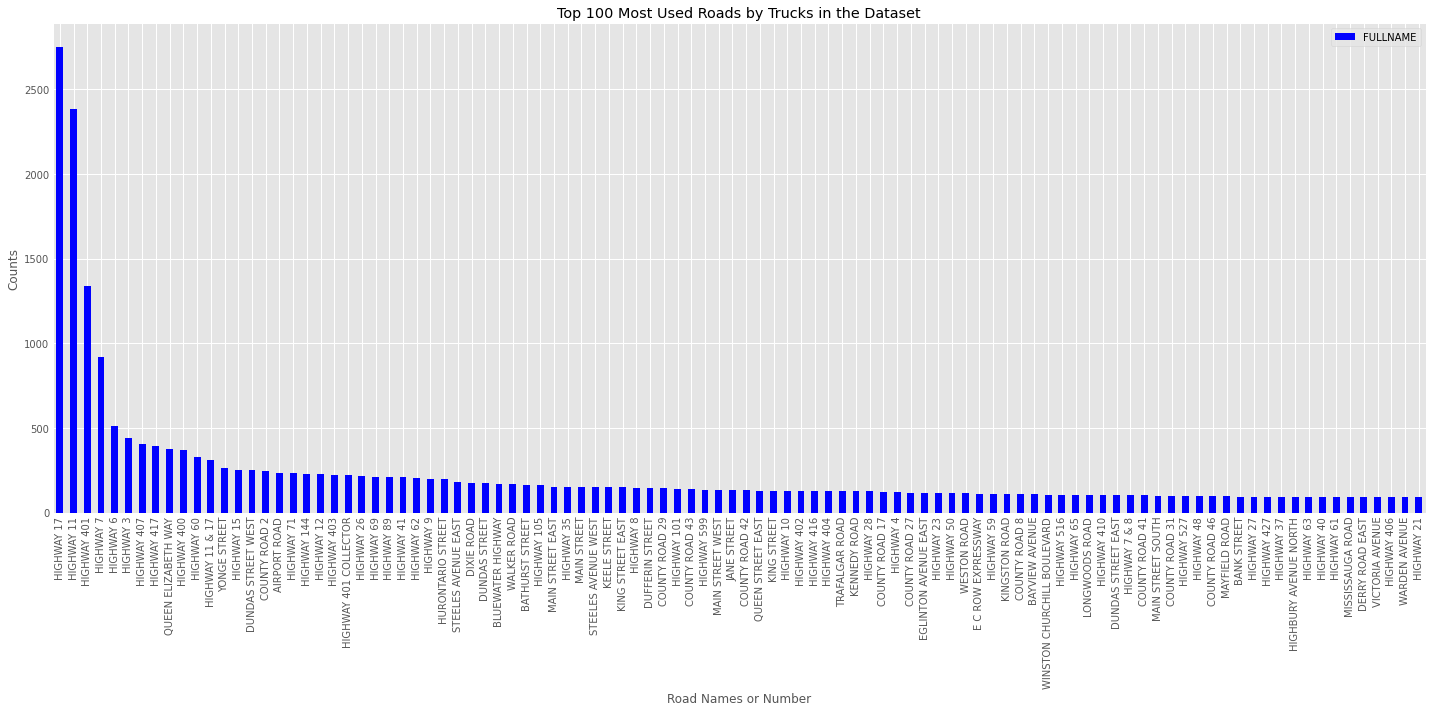

In [162]:
df_bar = pd.DataFrame(df7c['FULLNAME'].value_counts())
df_bar = df_bar[:100]
df_bar.plot(kind='bar', figsize = (20,10), color ='blue')

plt.xlabel('Road Names or Number')
plt.ylabel('Counts')
plt.title('Top 100 Most Used Roads by Trucks in the Dataset')

plt.tight_layout()

This dataset has 3067 unique street names.

### Checking initial hypothesis.

The top 17 highways and streets data from the bar chart above were combined, and the average value was obtained.<br>
Each link is divided into weekdays and weekends.<br>
Later it is plotted in two different plots, one representing weekday data and another weekend data.<br>
The initial hypothesis was that congestion is the worst during rush hour from 6-10 a.m. to 3-7 p.m.<br>

---
The relationship of measured travel speed means values to free flow speed from each road are derived as a percentage and used to plot.<br>
This is done so that all the other roads, regardless of their speed limits and free-flow speed, can be plotted in one graph.<br>

#### Top 17 highways from the dataset.

In [163]:
# HIGHWAY 17 has 2753 records
Highway_17_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 17'].mean().round(2)
Highway_17_WD = Highway_17_mean[21:45]
Highway_17_WN = Highway_17_mean[45:69]

# This Highway 11 has 2,392 records.
Highway_11_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 11'].mean().round(2)
Highway_11_WD = Highway_11_mean[21:45]
Highway_11_WN = Highway_11_mean[45:69]

# HWY_401 = 1,585 records 
Highway_401_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 401'].mean().round(2)
Highway_401_WD = Highway_401_mean[21:45]
Highway_401_WN = Highway_401_mean[45:69]

# Highway 7 has 930 records.
Highway_7_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 7'].mean().round(2)
Highway_7_WD = Highway_7_mean[21:45]
Highway_7_WN = Highway_7_mean[45:69]

# Highway 6 has 510 records.
Highway_6_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 6'].mean().round(2)
Highway_6_WD = Highway_7_mean[21:45]
Highway_6_WN = Highway_7_mean[45:69]

# HWY_407 = 479 records
Highway_407_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 407'].mean().round(2)
Highway_407_WD = Highway_407_mean[21:45]
Highway_407_WN = Highway_407_mean[45:69]

# QEW = 478 records
QEW_mean = df7c.loc[df7c['FULLNAME'] == 'QUEEN ELIZABETH WAY'].mean().round(2)
QEW_WD = QEW_mean[21:45]
QEW_WN = QEW_mean[45:69]

# HWY_3 = 442 records
Highway_3_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 3'].mean().round(2)
Highway_3_WD = Highway_3_mean[21:45]
Highway_3_WN = Highway_3_mean[45:69]

# HWY_417 = 415 records
Highway_417_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 417'].mean().round(2)
Highway_417_WD = Highway_417_mean[21:45]
Highway_417_WN = Highway_417_mean[45:69]

# HWY_400 = 374 records
Highway_400_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 400'].mean().round(2)
Highway_400_WD = Highway_400_mean[21:45]
Highway_400_WN = Highway_400_mean[45:69]

# HWY_11&17 = 309 records
Highway_11_and_17_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 11 & 17'].mean().round(2)
Highway_11_and_17_WD = Highway_11_and_17_mean[21:45]
Highway_11_and_17_WN = Highway_11_and_17_mean[45:69]

# HWY_403 = 275 records
Highway_403_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 403'].mean().round(2)
Highway_403_WD = Highway_403_mean[21:45]
Highway_403_WN = Highway_403_mean[45:69]

# HWY_15 = 251 records
Highway_15_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 15'].mean().round(2)
Highway_15_WD = Highway_15_mean[21:45]
Highway_15_WN = Highway_15_mean[45:69]

# HWY_401_Col = 234 records
Highway_401_Col_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 401 COLLECTOR'].mean().round(2)
Highway_401_Col_WD = Highway_401_Col_mean[21:45]
Highway_401_Col_WN = Highway_401_Col_mean[45:69]

# HWY_144 = 229 records
Highway_144_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 144'].mean().round(2)
Highway_144_WD = Highway_144_mean[21:45]
Highway_144_WN = Highway_144_mean[45:69]

# HWY_12 = 225 records
Highway_12_mean = df7c.loc[df7c['FULLNAME'] == 'HIGHWAY 12'].mean().round(2)
Highway_12_WD = Highway_12_mean[21:45]
Highway_12_WN = Highway_12_mean[45:69]

# REDHILL_VAL_PRKWY = 20 records.
REDHILL_VAL_PRKWY_FRWY_mean=df7c.loc[df7c['FULLNAME']=='RED HILL VALLEY PARKWAY'].loc[df7c['RDCLASS']=='Freeway'].mean().round(2)
REDHILL_FRWY_WD = REDHILL_VAL_PRKWY_FRWY_mean[21:45]
REDHILL_FRWY_WN = REDHILL_VAL_PRKWY_FRWY_mean[45:69]

#### Top 17 streets and roads from the dataset.

In [164]:
# Young Street = 260 records
YOUNG_ST_mean = df7c.loc[df7c['FULLNAME'] == 'YONGE STREET'].mean().round(2)
YOUNG_ST_WD = YOUNG_ST_mean[21:45]
YOUNG_ST_WN = YOUNG_ST_mean[45:69]

# Dundas St. W. = 247 records
Dundas_ST_W_mean = df7c.loc[df7c['FULLNAME'] == 'DUNDAS STREET WEST'].mean().round(2)
Dundas_ST_W_WD = Dundas_ST_W_mean[21:45]
Dundas_ST_W_WN = Dundas_ST_W_mean[45:69]

# County Rd2 = 244 records
County_Rd2_mean = df7c.loc[df7c['FULLNAME'] == 'COUNTY ROAD 2'].mean().round(2)
County_Rd2_WD = County_Rd2_mean[21:45]
County_Rd2_WN = County_Rd2_mean[45:69]

# Airport Rd = 235 records
Airport_Rd_mean = df7c.loc[df7c['FULLNAME'] == 'AIRPORT ROAD'].mean().round(2)
Airport_Rd_WD = Airport_Rd_mean[21:45]
Airport_Rd_WN = Airport_Rd_mean[45:69]

# Hurontario St = 195 records
HURONTARIO_ST_mean = df7c.loc[df7c['FULLNAME'] == 'HURONTARIO STREET'].mean().round(2)
HURONTARIO_ST_WD = HURONTARIO_ST_mean[21:45]
HURONTARIO_ST_WN = HURONTARIO_ST_mean[45:69]

# Steeles Ave E = 178 records
Steeles_Ave_E_mean = df7c.loc[df7c['FULLNAME'] == 'STEELES AVENUE EAST'].mean().round(2)
Steeles_Ave_E_WD = Steeles_Ave_E_mean[21:45]
Steeles_Ave_E_WN = Steeles_Ave_E_mean[45:69]

# Dixie Rd = 174 records
Dixie_Rd_mean = df7c.loc[df7c['FULLNAME'] == 'DIXIE ROAD'].mean().round(2)
Dixie_Rd_WD = Dixie_Rd_mean[21:45]
Dixie_Rd_WN = Dixie_Rd_mean[45:69]

# Dundas St = 171 records
Dundas_St_mean = df7c.loc[df7c['FULLNAME'] == 'DUNDAS STREET'].mean().round(2)
Dundas_St_WD = Dundas_St_mean[21:45]
Dundas_St_WN = Dundas_St_mean[45:69]

# Walker Rd = 166 records
Walker_Rd_mean = df7c.loc[df7c['FULLNAME'] == 'WALKER ROAD'].mean().round(2)
Walker_Rd_WD = Walker_Rd_mean[21:45]
Walker_Rd_WN = Walker_Rd_mean[45:69]

# Bathurst St = 154 records
Bathurst_St_mean = df7c.loc[df7c['FULLNAME'] == 'BATHURST STREET'].mean().round(2)
Bathurst_St_WD = Bathurst_St_mean[21:45]
Bathurst_St_WN = Bathurst_St_mean[45:69]

# Main St = 151 records
Main_St_mean = df7c.loc[df7c['FULLNAME'] == 'MAIN STREET'].mean().round(2)
Main_St_WD = Main_St_mean[21:45]
Main_St_WN = Main_St_mean[45:69]

# Steeles Ave W = 150 records
Steeles_Ave_W_mean = df7c.loc[df7c['FULLNAME'] == 'STEELES AVENUE WEST'].mean().round(2)
Steeles_Ave_W_WD = Steeles_Ave_W_mean[21:45]
Steeles_Ave_W_WN = Steeles_Ave_W_mean[45:69]

# King St E = 149 records
King_St_E_mean = df7c.loc[df7c['FULLNAME'] == 'KING STREET EAST'].mean().round(2)
King_St_E_WD = King_St_E_mean[21:45]
King_St_E_WN = King_St_E_mean[45:69]

# Main St E = 149 records
Main_St_E_mean = df7c.loc[df7c['FULLNAME'] == 'MAIN STREET EAST'].mean().round(2)
Main_St_E_WD = Main_St_E_mean[21:45]
Main_St_E_WN = Main_St_E_mean[45:69]

# Keele St = 147 records
Keele_St_mean = df7c.loc[df7c['FULLNAME'] == 'KEELE STREET'].mean().round(2)
Keele_St_WD = Keele_St_mean[21:45]
Keele_St_WN = Keele_St_mean[45:69]

# Dufferin St = 143 records
Dufferin_St_mean = df7c.loc[df7c['FULLNAME'] == 'DUFFERIN STREET'].mean().round(2)
Dufferin_St_WD = Dufferin_St_mean[21:45]
Dufferin_St_WN = Dufferin_St_mean[45:69]

# Main St W = 134 records
Main_St_W_mean = df7c.loc[df7c['FULLNAME'] == 'MAIN STREET WEST'].mean().round(2)
Main_St_W_WD = Main_St_W_mean[21:45]
Main_St_W_WN = Main_St_W_mean[45:69]

----
#### The percentage of actual speed to free flow is plotted (Weekday data).
Streets and roads are plotted with a dashed line.

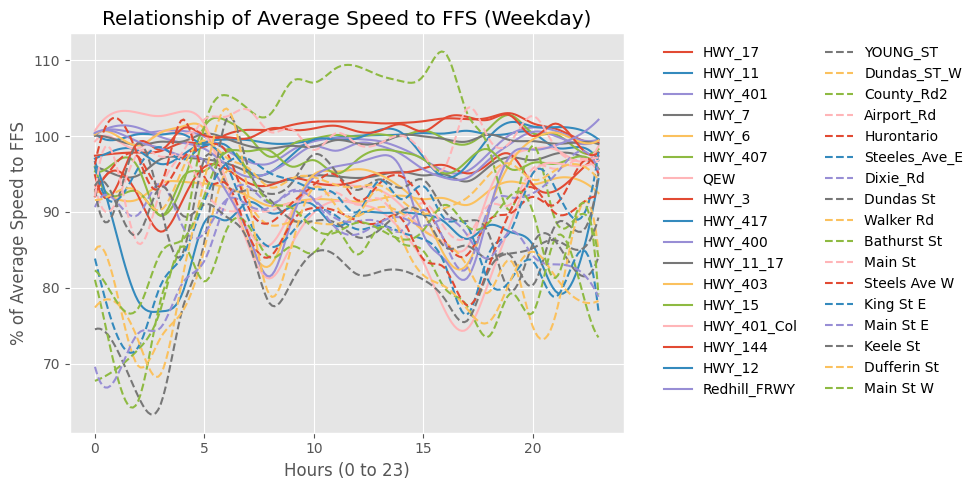

In [168]:
plt.style.use('ggplot')

figure(figsize=(10, 5), dpi=100)

# Assiging a value to the X
x = range(24)
x_interpol = np.linspace(0, 23, 200)

# HWY_17_WD
y_HWY_17_WD = ((Highway_17_WD.values / Highway_17_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_HWY_17_WD)
y_HWY_17_WD = bspline(x_interpol)
#  Plot - HWY_17_WD
plt.plot(x_interpol, y_HWY_17_WD, label = 'HWY_17')

# HWY_11_WD
y_HWY_11_WD = ((Highway_11_WD.values / Highway_11_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_HWY_11_WD)
y_HWY_11_WD = bspline(x_interpol)
#  Plot - HWY_11_WD
plt.plot(x_interpol, y_HWY_11_WD, label = 'HWY_11')

# Highway_401_WD
y_Highway_401_WD = ((Highway_401_WD.values / Highway_401_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_401_WD)
y_Highway_401_WD = bspline(x_interpol)
#  Plot - Highway_401_WD
plt.plot(x_interpol, y_Highway_401_WD, label = 'HWY_401')

# Highway_7_WD
y_Highway_7_WD = ((Highway_7_WD.values / Highway_7_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_7_WD)
y_Highway_7_WD = bspline(x_interpol)
#  Plot - Highway_7_WD
plt.plot(x_interpol, y_Highway_7_WD, label = 'HWY_7')

# Highway_6_WD
y_Highway_6_WD = ((Highway_6_WD.values / Highway_6_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_6_WD)
y_Highway_6_WD = bspline(x_interpol)
#  Plot - Highway_6_WD
plt.plot(x_interpol, y_Highway_6_WD, label = 'HWY_6')

# Highway_407_WD
y_Highway_407_WD = ((Highway_407_WD.values / Highway_407_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_407_WD)
y_Highway_407_WD = bspline(x_interpol)
#  Plot - Highway_407_WD
plt.plot(x_interpol, y_Highway_407_WD, label = 'HWY_407')

# QEW_WD
y_QEW_WD = ((QEW_WD.values / QEW_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_QEW_WD)
y_QEW_WD = bspline(x_interpol)
#  Plot - QEW_WD
plt.plot(x_interpol, y_QEW_WD, label = 'QEW')

# Highway_3_WD
y_Highway_3_WD = ((Highway_3_WD.values / Highway_3_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_3_WD)
y_Highway_3_WD = bspline(x_interpol)
#  Plot - Highway_3_WD
plt.plot(x_interpol, y_Highway_3_WD, label = 'HWY_3')

# Highway_417_WD
y_Highway_417_WD = ((Highway_417_WD.values / Highway_417_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_417_WD)
y_Highway_417_WD = bspline(x_interpol)
#  Plot - Highway_417_WD
plt.plot(x_interpol, y_Highway_417_WD, label = 'HWY_417')

# Highway_400_WD
y_Highway_400_WD = ((Highway_400_WD.values / Highway_400_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_400_WD)
y_Highway_400_WD = bspline(x_interpol)
#  Plot - Highway_400_WD
plt.plot(x_interpol, y_Highway_400_WD, label = 'HWY_400')

# Highway_11_and_17_WD
y_Highway_11_and_17_WD = ((Highway_11_and_17_WD.values / Highway_11_and_17_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_11_and_17_WD)
y_Highway_11_and_17_WD = bspline(x_interpol)
#  Plot - Highway_11_and_17_WD
plt.plot(x_interpol, y_Highway_11_and_17_WD, label = 'HWY_11_17')

# Highway_403_WD
y_Highway_403_WD = ((Highway_403_WD.values / Highway_403_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_403_WD)
y_Highway_403_WD = bspline(x_interpol)
#  Plot - Highway_403_WD
plt.plot(x_interpol, y_Highway_403_WD, label = 'HWY_403')

# Highway_15_WD
y_Highway_15_WD = ((Highway_15_WD.values / Highway_15_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_15_WD)
y_Highway_15_WD = bspline(x_interpol)
#  Plot - Highway_15_WD
plt.plot(x_interpol, y_Highway_15_WD, label = 'HWY_15')

# Highway_401_Col_WD
y_Highway_401_Col_WD = ((Highway_401_Col_WD.values / Highway_401_Col_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_401_Col_WD)
y_Highway_401_Col_WD = bspline(x_interpol)
#  Plot - Highway_401_Col_WD
plt.plot(x_interpol, y_Highway_401_Col_WD, label = 'HWY_401_Col')

# Highway_144_WD
y_Highway_144_WD = ((Highway_144_WD.values / Highway_144_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_144_WD)
y_Highway_144_WD = bspline(x_interpol)
#  Plot - Highway_144_WD
plt.plot(x_interpol, y_Highway_144_WD, label = 'HWY_144')

# Highway_12_WD
y_Highway_12_WD = ((Highway_12_WD.values / Highway_12_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_12_WD)
y_Highway_12_WD = bspline(x_interpol)
#  Plot - Highway_12_WD
plt.plot(x_interpol, y_Highway_12_WD, label = 'HWY_12')

# Redhill_FRWY_WD
y_Redhill_FRWY_WD = ((REDHILL_FRWY_WD.values / REDHILL_VAL_PRKWY_FRWY_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Redhill_FRWY_WD)
y_Redhill_FRWY_WD = bspline(x_interpol)
#  Plot - Redhill_FRWY_WD
plt.plot(x_interpol, y_Redhill_FRWY_WD, label = 'Redhill_FRWY')

### Streets ###

# YOUNG_ST_WD
y_YOUNG_ST_WD = ((YOUNG_ST_WD.values / YOUNG_ST_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_YOUNG_ST_WD)
y_YOUNG_ST_WD = bspline(x_interpol)
#  Plot - YOUNG_ST_WD
plt.plot(x_interpol, y_YOUNG_ST_WD, '--', label = 'YOUNG_ST')

# Dundas_ST_W_WD
y_Dundas_ST_W_WD = ((Dundas_ST_W_WD.values / Dundas_ST_W_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dundas_ST_W_WD)
y_Dundas_ST_W_WD = bspline(x_interpol)
#  Plot - Dundas_ST_W
plt.plot(x_interpol, y_Dundas_ST_W_WD, '--', label = 'Dundas_ST_W')

# County_Rd2_WD
y_Dundas_ST_W_WD = ((County_Rd2_WD.values / County_Rd2_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dundas_ST_W_WD)
y_Dundas_ST_W_WD = bspline(x_interpol)
#  Plot - County_Rd2_WD
plt.plot(x_interpol, y_Dundas_ST_W_WD, '--', label = 'County_Rd2')

# Airport_Rd
y_Airport_Rd_WD = ((Airport_Rd_WD.values / Airport_Rd_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Airport_Rd_WD)
y_Airport_Rd_WD = bspline(x_interpol)
#  Plot - Airport_Rd_WD
plt.plot(x_interpol, y_Airport_Rd_WD, '--', label = 'Airport_Rd')

# Hurontario_St
y_HURONTARIO_ST_WD = ((HURONTARIO_ST_WD.values / HURONTARIO_ST_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_HURONTARIO_ST_WD)
y_HURONTARIO_ST_WD = bspline(x_interpol)
#  Plot - HURONTARIO_ST_WD
plt.plot(x_interpol, y_HURONTARIO_ST_WD, '--', label = 'Hurontario')

# Steeles_Ave_E
y_Steeles_Ave_E_WD = ((Steeles_Ave_E_WD.values / Steeles_Ave_E_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Steeles_Ave_E_WD)
y_Steeles_Ave_E_WD = bspline(x_interpol)
#  Plot - Steeles_Ave_E_WD
plt.plot(x_interpol, y_Steeles_Ave_E_WD, '--', label = 'Steeles_Ave_E')

# Dixie_Rd_WD
y_Dixie_Rd_WD = ((Dixie_Rd_WD.values / Dixie_Rd_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dixie_Rd_WD)
y_Dixie_Rd_WD = bspline(x_interpol)
#  Plot - Dixie_Rd_WD
plt.plot(x_interpol, y_Dixie_Rd_WD, '--', label = 'Dixie_Rd')

# Dundas_St_WD
y_Dundas_St_WD = ((Dundas_St_WD.values / Dundas_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dundas_St_WD)
y_Dundas_St_WD = bspline(x_interpol)
#  Plot - Dundas_St_WD
plt.plot(x_interpol, y_Dundas_St_WD, '--', label = 'Dundas St')

# Walker_Rd_WD
y_Walker_Rd_WD = ((Walker_Rd_WD.values / Walker_Rd_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Walker_Rd_WD)
y_Walker_Rd_WD = bspline(x_interpol)
#  Plot - Walker_Rd_WD
plt.plot(x_interpol, y_Walker_Rd_WD, '--', label = 'Walker Rd')

# Bathurst_St_WD
y_Bathurst_St_WD = ((Bathurst_St_WD.values / Bathurst_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Bathurst_St_WD)
y_Bathurst_St_WD = bspline(x_interpol)
#  Plot - Walker_Rd_WD
plt.plot(x_interpol, y_Bathurst_St_WD, '--', label = 'Bathurst St')

# Main_St_WD
y_Main_St_WD = ((Main_St_WD.values / Bathurst_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Main_St_WD)
y_Main_St_WD = bspline(x_interpol)
#  Plot - Main_St_WD
plt.plot(x_interpol, y_Main_St_WD, '--', label = 'Main St')

# Steeles_Ave_W_WD
y_Steeles_Ave_W_WD = ((Steeles_Ave_W_WD.values / Steeles_Ave_W_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Steeles_Ave_W_WD)
y_Steeles_Ave_W_WD = bspline(x_interpol)
#  Plot - Steeles_Ave_W_WD
plt.plot(x_interpol, y_Steeles_Ave_W_WD, '--', label = 'Steels Ave W')

# King_St_E_WD
y_King_St_E_WD = ((King_St_E_WD.values / King_St_E_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_King_St_E_WD)
y_King_St_E_WD = bspline(x_interpol)
#  Plot - King_St_E_WD
plt.plot(x_interpol, y_King_St_E_WD, '--', label = 'King St E')

# Main_St_E_WD
y_Main_St_E_WD = ((Main_St_E_WD.values / Main_St_E_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Main_St_E_WD)
y_Main_St_E_WD = bspline(x_interpol)
#  Plot - Main_St_E_WD
plt.plot(x_interpol, y_Main_St_E_WD, '--', label = 'Main St E')

# Keele_St_WD
y_Keele_St_WD = ((Keele_St_WD.values / Keele_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Keele_St_WD)
y_Keele_St_WD = bspline(x_interpol)
#  Plot - Keele_St_WD
plt.plot(x_interpol, y_Keele_St_WD, '--', label = 'Keele St')

# Dufferin_St_WD
y_Dufferin_St_WD = ((Dufferin_St_WD.values / Dufferin_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dufferin_St_WD)
y_Dufferin_St_WD = bspline(x_interpol)
#  Plot - Dufferin_St_WD
plt.plot(x_interpol, y_Dufferin_St_WD, '--', label = 'Dufferin St')

# Main_St_W_WD
y_Main_St_W_WD = ((Main_St_W_WD.values / Main_St_W_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Main_St_W_WD)
y_Main_St_W_WD = bspline(x_interpol)
#  Plot - Main_St_W_WD
plt.plot(x_interpol, y_Main_St_W_WD, '--', label = 'Main St W')


plt.xlabel('Hours (0 to 23)')
plt.ylabel('% of Average Speed to FFS')
plt.title('Relationship of Average Speed to FFS (Weekday)')

plt.legend(ncol = 2, bbox_to_anchor = (1.05, 1), frameon = False, loc = 'upper left')
plt.tight_layout()
plt.show()

In [167]:
plt.rcdefaults()

---
#### The percentage of actual speed to free flow is plotted (Weekend data).
Streets and roads are plotted with a dashed line.

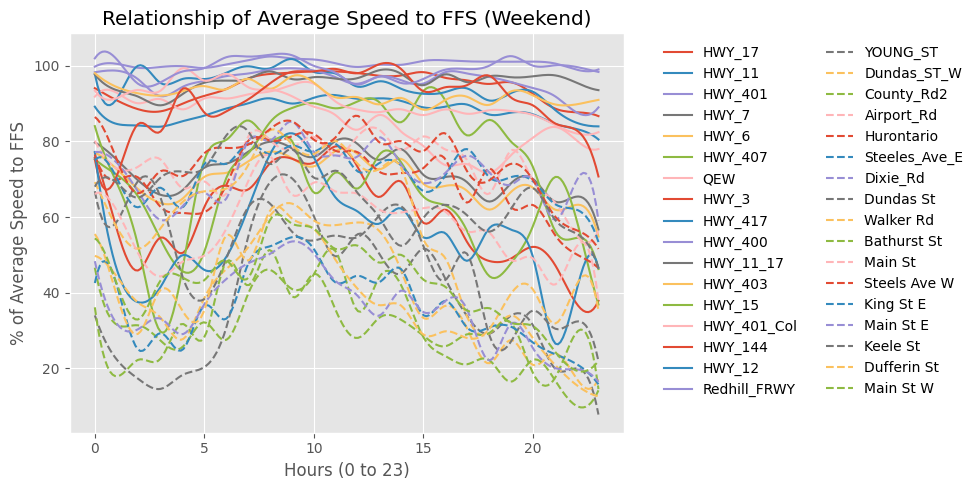

In [169]:
plt.style.use('ggplot')

figure(figsize=(10, 5), dpi=100)

# Assiging a value to the X
x = range(24)
x_interpol = np.linspace(0, 23, 200)


# HWY_17_WN
y_HWY_17_WN = ((Highway_17_WN.values / Highway_17_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_HWY_17_WN)
y_HWY_17_WN = bspline(x_interpol)
#  Plot - HWY_17_WN
plt.plot(x_interpol, y_HWY_17_WN, label = 'HWY_17')

# HWY_11_WN
y_HWY_11_WN = ((Highway_11_WN.values / Highway_11_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_HWY_11_WN)
y_HWY_11_WN = bspline(x_interpol)
#  Plot - HWY_17_WD
plt.plot(x_interpol, y_HWY_11_WN, label = 'HWY_11')

# Highway_401_WN
y_Highway_401_WN = ((Highway_401_WN.values / Highway_401_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_401_WN)
y_Highway_401_WN = bspline(x_interpol)
#  Plot - Highway_401_WD
plt.plot(x_interpol, y_Highway_401_WN, label = 'HWY_401')

# Highway_7_WN
y_Highway_7_WN = ((Highway_7_WN.values / Highway_7_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_7_WN)
y_Highway_7_WN = bspline(x_interpol)
#  Plot - Highway_7_WD
plt.plot(x_interpol, y_Highway_7_WN, label = 'HWY_7')

# Highway_6_WN
y_Highway_6_WN = ((Highway_6_WN.values / Highway_6_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_6_WN)
y_Highway_6_WN = bspline(x_interpol)
#  Plot - Highway_6_WN
plt.plot(x_interpol, y_Highway_6_WN, label = 'HWY_6')

# Highway_407_WN
y_Highway_407_WN = ((Highway_407_WN.values / Highway_407_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_407_WN)
y_Highway_407_WN = bspline(x_interpol)
#  Plot - Highway_407_WN
plt.plot(x_interpol, y_Highway_407_WN, label = 'HWY_407')

# QEW_WN
y_QEW_WN = ((QEW_WN.values / QEW_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_QEW_WN)
y_QEW_WN = bspline(x_interpol)
#  Plot - QEW_WN
plt.plot(x_interpol, y_QEW_WN, label = 'QEW')

# Highway_3_WN
y_Highway_3_WN = ((Highway_3_WN.values / Highway_3_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_3_WN)
y_Highway_3_WN = bspline(x_interpol)
#  Plot - Highway_3_WN
plt.plot(x_interpol, y_Highway_3_WN, label = 'HWY_3')

# Highway_417_WN
y_Highway_417_WN = ((Highway_417_WN.values / Highway_417_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_417_WN)
y_Highway_417_WN = bspline(x_interpol)
#  Plot - Highway_417_WN
plt.plot(x_interpol, y_Highway_417_WN, label = 'HWY_417')

# Highway_400_WN
y_Highway_400_WN = ((Highway_400_WN.values / Highway_400_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_400_WN)
y_Highway_400_WN = bspline(x_interpol)
#  Plot - Highway_400_WN
plt.plot(x_interpol, y_Highway_400_WN, label = 'HWY_400')

# Highway_11_and_17_WN
y_Highway_11_and_17_WN = ((Highway_11_and_17_WN.values / Highway_11_and_17_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_11_and_17_WN)
y_Highway_11_and_17_WN = bspline(x_interpol)
#  Plot - Highway_11_and_17_WN
plt.plot(x_interpol, y_Highway_11_and_17_WN, label = 'HWY_11_17')

# Highway_403_WN
y_Highway_403_WN = ((Highway_403_WN.values / Highway_403_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_403_WN)
y_Highway_403_WN = bspline(x_interpol)
#  Plot - Highway_403_WN
plt.plot(x_interpol, y_Highway_403_WN, label = 'HWY_403')

# Highway_15_WN
y_Highway_15_WN = ((Highway_15_WN.values / Highway_15_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_15_WN)
y_Highway_15_WN = bspline(x_interpol)
#  Plot - Highway_15_WN
plt.plot(x_interpol, y_Highway_15_WN, label = 'HWY_15')

# Highway_401_Col_WN
y_Highway_401_Col_WN = ((Highway_401_Col_WN.values / Highway_401_Col_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_401_Col_WN)
y_Highway_401_Col_WN = bspline(x_interpol)
#  Plot - Highway_401_Col_WN
plt.plot(x_interpol, y_Highway_401_Col_WN, label = 'HWY_401_Col')

# Highway_144_WN
y_Highway_144_WN = ((Highway_144_WN.values / Highway_144_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_144_WN)
y_Highway_144_WN = bspline(x_interpol)
#  Plot - Highway_144_WN
plt.plot(x_interpol, y_Highway_144_WN, label = 'HWY_144')

# Highway_12_WN
y_Highway_12_WN = ((Highway_12_WN.values / Highway_12_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Highway_12_WN)
y_Highway_12_WN = bspline(x_interpol)
#  Plot - Highway_12_WN
plt.plot(x_interpol, y_Highway_12_WN, label = 'HWY_12')

# Redhill_FRWY_WN
y_Redhill_FRWY_WN = ((REDHILL_FRWY_WN.values / REDHILL_VAL_PRKWY_FRWY_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Redhill_FRWY_WN)
y_Redhill_FRWY_WN = bspline(x_interpol)
#  Plot - Redhill_FRWY_WN
plt.plot(x_interpol, y_Redhill_FRWY_WN, label = 'Redhill_FRWY')

### Streets ###

# YOUNG_ST_WN
y_YOUNG_ST_WN = ((YOUNG_ST_WN.values / YOUNG_ST_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_YOUNG_ST_WN)
y_YOUNG_ST_WN = bspline(x_interpol)
#  Plot - YOUNG_ST_WN
plt.plot(x_interpol, y_YOUNG_ST_WN, '--', label = 'YOUNG_ST')

# Dundas_ST_W_WN
y_Dundas_ST_W_WN = ((Dundas_ST_W_WN.values / Dundas_ST_W_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dundas_ST_W_WN)
y_Dundas_ST_W_WN = bspline(x_interpol)
#  Plot - Dundas_ST_W
plt.plot(x_interpol, y_Dundas_ST_W_WN, '--', label = 'Dundas_ST_W')

# County_Rd2_WN
y_Dundas_ST_W_WN = ((County_Rd2_WN.values / County_Rd2_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dundas_ST_W_WN)
y_Dundas_ST_W_WN = bspline(x_interpol)
#  Plot - County_Rd2_WN
plt.plot(x_interpol, y_Dundas_ST_W_WN, '--', label = 'County_Rd2')

# Airport_Rd_WN
y_Airport_Rd_WN = ((Airport_Rd_WN.values / Airport_Rd_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Airport_Rd_WN)
y_Airport_Rd_WN = bspline(x_interpol)
#  Plot - Airport_Rd_WN
plt.plot(x_interpol, y_Airport_Rd_WN, '--', label = 'Airport_Rd')

# Hurontario_St_WN
y_HURONTARIO_ST_WN = ((HURONTARIO_ST_WN.values / HURONTARIO_ST_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_HURONTARIO_ST_WN)
y_HURONTARIO_ST_WN = bspline(x_interpol)
#  Plot - HURONTARIO_ST_WN
plt.plot(x_interpol, y_HURONTARIO_ST_WN, '--', label = 'Hurontario')

# Steeles_Ave_E
y_Steeles_Ave_E_WN = ((Steeles_Ave_E_WN.values / Steeles_Ave_E_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Steeles_Ave_E_WN)
y_Steeles_Ave_E_WN = bspline(x_interpol)
#  Plot - Steeles_Ave_E_WN
plt.plot(x_interpol, y_Steeles_Ave_E_WN, '--', label = 'Steeles_Ave_E')

# Dixie_Rd_WN
y_Dixie_Rd_WN = ((Dixie_Rd_WN.values / Dixie_Rd_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dixie_Rd_WN)
y_Dixie_Rd_WN = bspline(x_interpol)
#  Plot - Dixie_Rd_WN
plt.plot(x_interpol, y_Dixie_Rd_WN, '--', label = 'Dixie_Rd')

# Dundas_St_WN
y_Dundas_St_WN = ((Dundas_St_WN.values / Dundas_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dundas_St_WN)
y_Dundas_St_WN = bspline(x_interpol)
#  Plot - Dundas_St_WN
plt.plot(x_interpol, y_Dundas_St_WN, '--', label = 'Dundas St')

# Walker_Rd_WN
y_Walker_Rd_WN = ((Walker_Rd_WN.values / Walker_Rd_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Walker_Rd_WN)
y_Walker_Rd_WN = bspline(x_interpol)
#  Plot - Walker_Rd_WN
plt.plot(x_interpol, y_Walker_Rd_WN, '--', label = 'Walker Rd')

# Bathurst_St_WN
y_Bathurst_St_WN = ((Bathurst_St_WN.values / Bathurst_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Bathurst_St_WN)
y_Bathurst_St_WN = bspline(x_interpol)
#  Plot - Walker_Rd_WN
plt.plot(x_interpol, y_Bathurst_St_WN, '--', label = 'Bathurst St')

# Main_St_WN
y_Main_St_WN = ((Main_St_WN.values / Bathurst_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Main_St_WN)
y_Main_St_WN = bspline(x_interpol)
#  Plot - Main_St_WN
plt.plot(x_interpol, y_Main_St_WN, '--', label = 'Main St')

# Steeles_Ave_W_WN
y_Steeles_Ave_W_WN = ((Steeles_Ave_W_WN.values / Steeles_Ave_W_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Steeles_Ave_W_WN)
y_Steeles_Ave_W_WN = bspline(x_interpol)
#  Plot - Steeles_Ave_W_WN
plt.plot(x_interpol, y_Steeles_Ave_W_WN, '--', label = 'Steels Ave W')

# King_St_E_WN
y_King_St_E_WN = ((King_St_E_WN.values / King_St_E_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_King_St_E_WN)
y_King_St_E_WN = bspline(x_interpol)
#  Plot - King_St_E_WN
plt.plot(x_interpol, y_King_St_E_WN, '--', label = 'King St E')

# Main_St_E_WN
y_Main_St_E_WN = ((Main_St_E_WN.values / Main_St_E_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Main_St_E_WN)
y_Main_St_E_WN = bspline(x_interpol)
#  Plot - Main_St_E_WN
plt.plot(x_interpol, y_Main_St_E_WN, '--', label = 'Main St E')

# Keele_St_WN
y_Keele_St_WN = ((Keele_St_WN.values / Keele_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Keele_St_WN)
y_Keele_St_WN = bspline(x_interpol)
#  Plot - Keele_St_WN
plt.plot(x_interpol, y_Keele_St_WN, '--', label = 'Keele St')

# Dufferin_St_WN
y_Dufferin_St_WN = ((Dufferin_St_WN.values / Dufferin_St_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Dufferin_St_WN)
y_Dufferin_St_WN = bspline(x_interpol)
#  Plot - Dufferin_St_WN
plt.plot(x_interpol, y_Dufferin_St_WN, '--', label = 'Dufferin St')

# Main_St_W_WN
y_Main_St_W_WN = ((Main_St_W_WN.values / Main_St_W_mean['FFS']) * 100).round(2)
bspline = interpolate.make_interp_spline(x, y_Main_St_W_WN)
y_Main_St_W_WN = bspline(x_interpol)
#  Plot - Main_St_W_WD
plt.plot(x_interpol, y_Main_St_W_WN, '--', label = 'Main St W')


plt.xlabel('Hours (0 to 23)')
plt.ylabel('% of Average Speed to FFS')
plt.title('Relationship of Average Speed to FFS (Weekend)')

plt.legend(ncol = 2, bbox_to_anchor = (1.05, 1), frameon = False, loc = 'upper left')
plt.tight_layout()
plt.show()

---
Based on the plot above, congestion is worse in the local roads than on Arterial links.<br>
Also, on weekdays, most streets have a lower percentage (actual speed in relation to free flow speed).<br>
Congestion is worse on local streets on weekends than on highways.<br>
---

In [170]:
df7c.head()

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
0,165.145,2,Arterial,9.0,50,ELORA STREET,297.845785,48.0,46.0,30.0,34.0,1.04,1.60,1.41,3.0,45.0,31.0,37.0,12.0,18.0,1.24,2.50,1.89,0.0,0.0,0.0,0.0,0.0,48.0,0.0,46.0,46.0,37.0,42.0,42.0,28.0,45.0,32.0,23.0,45.0,46.0,3.0,38.0,50.0,0.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,51.0,0.0,42.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.001881
8,3234.152,2,Arterial,9.0,80,MELBOURNE ROAD,31.258633,86.0,87.0,87.0,87.0,1.00,1.00,1.00,0.0,0.0,0.0,72.0,68.0,69.0,1.21,1.28,1.26,88.0,85.0,86.0,92.0,93.0,93.0,88.0,89.0,86.0,91.0,92.0,91.0,87.0,89.0,91.0,87.0,88.0,86.0,85.0,84.0,80.0,85.0,84.0,89.0,0.0,0.0,98.0,91.0,98.0,0.0,0.0,62.0,88.0,91.0,89.0,0.0,92.0,93.0,95.0,0.0,0.0,70.0,0.0,0.0,0.0,68.0,0.0,0.0,0.034124
14,1399.834,2,Expressway / Highway,9.0,50,HIGHWAY 9,317.907247,68.0,72.0,75.0,85.0,1.00,1.00,1.00,0.0,0.0,0.0,45.0,46.0,79.0,1.60,1.63,1.08,66.0,68.0,72.0,0.0,0.0,92.0,72.0,74.0,68.0,71.0,76.0,69.0,64.0,52.0,62.0,73.0,83.0,74.0,76.0,79.0,0.0,87.0,53.0,69.0,69.0,66.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.014246
22,1460.107,2,Arterial,12.0,80,BELMORE LINE,344.369724,78.0,82.0,86.0,83.0,1.00,1.00,1.00,0.0,0.0,0.0,66.0,73.0,68.0,1.24,1.18,1.22,68.0,0.0,0.0,91.0,0.0,92.0,78.0,79.0,87.0,79.0,87.0,77.0,84.0,82.0,80.0,85.0,81.0,88.0,79.0,91.0,83.0,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,77.0,82.0,89.0,81.0,79.0,82.0,69.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.013381
23,2036.906,2,Arterial,12.0,90,BELMORE LINE,344.269459,88.0,52.0,54.0,90.0,1.69,1.63,1.00,28.0,26.0,0.0,7.0,11.0,66.0,7.43,4.91,1.36,89.0,0.0,0.0,0.0,0.0,100.0,84.0,53.0,40.0,44.0,68.0,67.0,86.0,90.0,80.0,98.0,56.0,94.0,92.0,94.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,103.0,10.0,90.0,97.0,97.0,98.0,0.0,84.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.018670


---
Utilizing a scatter plot, it is identified that the best Free Flow Speed is on two-lane links, and increasing the number of lanes is inversely proportional to the FFS.

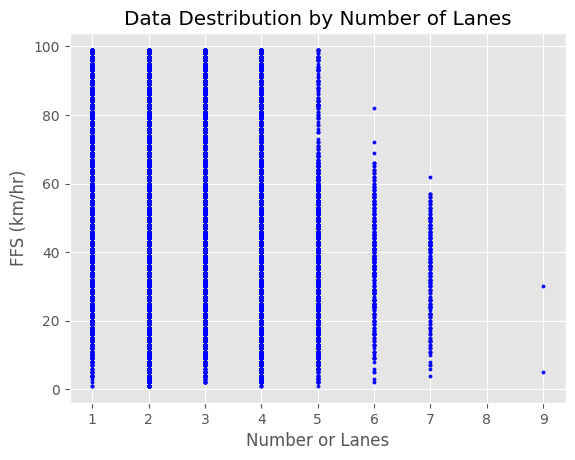

In [176]:
plt.style.use('ggplot')

plt.xlabel('Number or Lanes')
plt.ylabel('FFS (km/hr)')
plt.title('Data Destribution by Number of Lanes')

plt.scatter(df7c.LANES, df7c.FFS, s=5, c='blue')
plt.show()

---


# Preparing the dataset for Machine Learning

Dataset will be split into 3 different sub_datasets.<br>
First will contain all the data related to Weekday AM (midnight to noon).<br>
Second will contain all the data related to Weekday PM (noon to midnight).<br>
The last, third dataset will include the data for a Weekend (from midnight to midnight).

In [177]:
df7c.shape

(55941, 72)

In [178]:
df7c.columns

Index(['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM', 'FULLNAME',
       'AZIMUTH', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM',
       'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN',
       'BTI_AM', 'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02',
       'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08',
       'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14',
       'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20',
       'ATS_WD21', 'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02',
       'ATS_WN03', 'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08',
       'ATS_WN09', 'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14',
       'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20',
       'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length'],
      dtype='object')

In [179]:
df8_WD_AM = df7c[['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
                  'AZIMUTH', 'FFS', 'ATS_AM', 'TTI_AM', 'DI_AM', 'P95TH_AM',
                  'BTI_AM', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 
                  'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 
                  'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'SHAPE_Length']]

In [180]:
df8_WD_PM = df7c[['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
                  'AZIMUTH', 'FFS', 'ATS_PM', 'TTI_PM', 'DI_PM', 'P95TH_PM', 
                  'BTI_PM', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 
                  'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 
                  'ATS_WD21', 'ATS_WD22', 'ATS_WD23', 'SHAPE_Length']]

In [181]:
df8_WN =  df7c[['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 
                'FFS', 'ATS_WN', 'TTI_WN', 'DI_WN', 'P95TH_WN', 'BTI_WN', 
                'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 
                'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09', 
                'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14',
                'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19',
                'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

In [182]:
df8_WD_AM.shape

(55941, 25)

In [183]:
df8_WD_PM.shape

(55941, 25)

In [184]:
df8_WN.shape

(55941, 37)

In [185]:
df8_WD_AM.head()

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,TTI_AM,DI_AM,P95TH_AM,BTI_AM,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,SHAPE_Length
0,165.145,2,Arterial,9.0,50,297.845785,48.0,46.0,1.04,3.0,37.0,1.24,0.0,0.0,0.0,0.0,0.0,48.0,0.0,46.0,46.0,37.0,42.0,42.0,0.001881
8,3234.152,2,Arterial,9.0,80,31.258633,86.0,87.0,1.00,0.0,72.0,1.21,88.0,85.0,86.0,92.0,93.0,93.0,88.0,89.0,86.0,91.0,92.0,91.0,0.034124
14,1399.834,2,Expressway / Highway,9.0,50,317.907247,68.0,72.0,1.00,0.0,45.0,1.60,66.0,68.0,72.0,0.0,0.0,92.0,72.0,74.0,68.0,71.0,76.0,69.0,0.014246
22,1460.107,2,Arterial,12.0,80,344.369724,78.0,82.0,1.00,0.0,66.0,1.24,68.0,0.0,0.0,91.0,0.0,92.0,78.0,79.0,87.0,79.0,87.0,77.0,0.013381
23,2036.906,2,Arterial,12.0,90,344.269459,88.0,52.0,1.69,28.0,7.0,7.43,89.0,0.0,0.0,0.0,0.0,100.0,84.0,53.0,40.0,44.0,68.0,67.0,0.018670


In [186]:
df8_WD_PM.head()

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_PM,TTI_PM,DI_PM,P95TH_PM,BTI_PM,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,SHAPE_Length
0,165.145,2,Arterial,9.0,50,297.845785,48.0,30.0,1.60,45.0,12.0,2.50,28.0,45.0,32.0,23.0,45.0,46.0,3.0,38.0,50.0,0.0,0.0,48.0,0.001881
8,3234.152,2,Arterial,9.0,80,31.258633,86.0,87.0,1.00,0.0,68.0,1.28,87.0,89.0,91.0,87.0,88.0,86.0,85.0,84.0,80.0,85.0,84.0,89.0,0.034124
14,1399.834,2,Expressway / Highway,9.0,50,317.907247,68.0,75.0,1.00,0.0,46.0,1.63,64.0,52.0,62.0,73.0,83.0,74.0,76.0,79.0,0.0,87.0,53.0,69.0,0.014246
22,1460.107,2,Arterial,12.0,80,344.369724,78.0,86.0,1.00,0.0,73.0,1.18,84.0,82.0,80.0,85.0,81.0,88.0,79.0,91.0,83.0,0.0,0.0,89.0,0.013381
23,2036.906,2,Arterial,12.0,90,344.269459,88.0,54.0,1.63,26.0,11.0,4.91,86.0,90.0,80.0,98.0,56.0,94.0,92.0,94.0,0.0,0.0,88.0,0.0,0.018670


In [187]:
df8_WN.head()

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_WN,TTI_WN,DI_WN,P95TH_WN,BTI_WN,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
0,165.145,2,Arterial,9.0,50,297.845785,48.0,34.0,1.41,31.0,18.0,1.89,48.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,51.0,0.0,42.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.001881
8,3234.152,2,Arterial,9.0,80,31.258633,86.0,87.0,1.00,0.0,69.0,1.26,0.0,0.0,98.0,91.0,98.0,0.0,0.0,62.0,88.0,91.0,89.0,0.0,92.0,93.0,95.0,0.0,0.0,70.0,0.0,0.0,0.0,68.0,0.0,0.0,0.034124
14,1399.834,2,Expressway / Highway,9.0,50,317.907247,68.0,85.0,1.00,0.0,79.0,1.08,69.0,66.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.014246
22,1460.107,2,Arterial,12.0,80,344.369724,78.0,83.0,1.00,0.0,68.0,1.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,77.0,82.0,89.0,81.0,79.0,82.0,69.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.013381
23,2036.906,2,Arterial,12.0,90,344.269459,88.0,90.0,1.00,0.0,66.0,1.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,103.0,10.0,90.0,97.0,97.0,98.0,0.0,84.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.018670


#### Below identified all the unique Road Classes 'RDCLASS' and how many values in each class.
One hot encoding will be used to divide it into 7 different columns.

In [188]:
df8_WD_AM['RDCLASS'].value_counts()

Arterial                32865
Expressway / Highway    12936
Collector                3564
Ramp                     3279
Freeway                  2747
Local / Street            494
Local / Strata             56
Name: RDCLASS, dtype: int64

#### Plotting the Values from above.

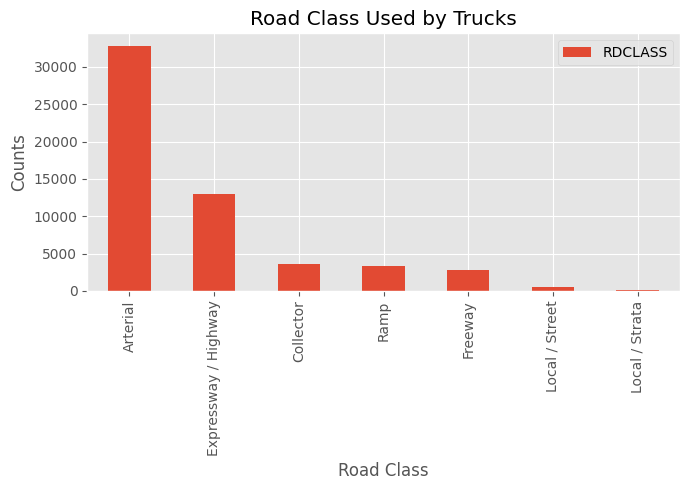

In [190]:
df_bar = pd.DataFrame(df8_WD_AM['RDCLASS'].value_counts())
df_bar.plot(kind='bar', figsize = (7,5))

plt.xlabel('Road Class')
plt.ylabel('Counts')
plt.title('Road Class Used by Trucks')

plt.tight_layout()

Checking all the Unique Values in each field

Replacing TTI_AM with values 1.1 or less with 0 and everyting above 1.1 with 1.

In [192]:
df8_WD_AM['TTI_AM'].head()

0     1.04
8     1.00
14    1.00
22    1.00
23    1.69
Name: TTI_AM, dtype: float64

In [193]:
df8_WD_AM['TTI_AM'].values[df8_WD_AM['TTI_AM'] <= 1.1] = 0
df8_WD_AM['TTI_AM'].values[df8_WD_AM['TTI_AM'] > 1.1] = 1

In [194]:
df8_WD_AM.head(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,TTI_AM,DI_AM,P95TH_AM,BTI_AM,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,SHAPE_Length
0,165.145,2,Arterial,9.0,50,297.845785,48.0,46.0,0.0,3.0,37.0,1.24,0.0,0.0,0.0,0.0,0.0,48.0,0.0,46.0,46.0,37.0,42.0,42.0,0.001881
8,3234.152,2,Arterial,9.0,80,31.258633,86.0,87.0,0.0,0.0,72.0,1.21,88.0,85.0,86.0,92.0,93.0,93.0,88.0,89.0,86.0,91.0,92.0,91.0,0.034124
14,1399.834,2,Expressway / Highway,9.0,50,317.907247,68.0,72.0,0.0,0.0,45.0,1.60,66.0,68.0,72.0,0.0,0.0,92.0,72.0,74.0,68.0,71.0,76.0,69.0,0.014246
22,1460.107,2,Arterial,12.0,80,344.369724,78.0,82.0,0.0,0.0,66.0,1.24,68.0,0.0,0.0,91.0,0.0,92.0,78.0,79.0,87.0,79.0,87.0,77.0,0.013381
23,2036.906,2,Arterial,12.0,90,344.269459,88.0,52.0,1.0,28.0,7.0,7.43,89.0,0.0,0.0,0.0,0.0,100.0,84.0,53.0,40.0,44.0,68.0,67.0,0.018670
30,1247.992,2,Arterial,12.0,80,345.499080,92.0,83.0,1.0,4.0,76.0,1.09,92.0,0.0,0.0,0.0,0.0,0.0,78.0,82.0,92.0,70.0,91.0,90.0,0.011410
31,1076.114,2,Arterial,12.0,80,345.481384,89.0,81.0,0.0,4.0,54.0,1.50,90.0,80.0,0.0,90.0,0.0,94.0,86.0,66.0,90.0,87.0,90.0,84.0,0.009838
32,713.011,2,Arterial,12.0,50,345.244402,60.0,58.0,0.0,2.0,36.0,1.61,80.0,0.0,0.0,40.0,22.0,84.0,56.0,45.0,68.0,68.0,57.0,66.0,0.006522
43,2470.800,2,Arterial,3.0,60,297.703504,64.0,75.0,0.0,0.0,51.0,1.47,0.0,0.0,0.0,0.0,90.0,76.0,61.0,78.0,76.0,77.0,79.0,77.0,0.028116
44,2039.172,2,Expressway / Highway,9.0,80,344.699801,79.0,81.0,0.0,0.0,62.0,1.31,76.0,78.0,0.0,0.0,0.0,80.0,95.0,88.0,75.0,90.0,87.0,78.0,0.018674


One hot encoding for RDCLASS attribute.

In [195]:
df8_WD_AM_OHE = pd.get_dummies(data = df8_WD_AM, columns = ['RDCLASS'])

In [197]:
df8_WD_AM_OHE.sample(10)

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,TTI_AM,DI_AM,P95TH_AM,BTI_AM,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,SHAPE_Length,RDCLASS_Arterial,RDCLASS_Collector,RDCLASS_Expressway / Highway,RDCLASS_Freeway,RDCLASS_Local / Strata,RDCLASS_Local / Street,RDCLASS_Ramp
176532,10.614,2,0.0,80,226.713621,44.0,44.0,0.0,0.0,8.0,5.50,0.0,53.0,37.0,50.0,64.0,58.0,46.0,22.0,79.0,57.0,37.0,33.0,0.000111,1,0,0,0,0,0,0
22202,348.023,3,0.0,60,73.073414,23.0,16.0,1.0,68.0,5.0,3.20,26.0,14.0,24.0,26.0,34.0,28.0,20.0,18.0,17.0,20.0,27.0,19.0,0.004133,0,1,0,0,0,0,0
45034,330.116,2,38.0,60,227.178578,40.0,34.0,1.0,16.0,9.0,3.78,0.0,0.0,58.0,0.0,0.0,27.0,40.0,45.0,33.0,42.0,46.0,49.0,0.003438,1,0,0,0,0,0,0
206251,135.962,4,0.0,50,35.561657,30.0,27.0,1.0,13.0,3.0,9.00,50.0,35.0,12.0,15.0,34.0,0.0,26.0,26.0,28.0,30.0,30.0,33.0,0.001333,1,0,0,0,0,0,0
243703,264.694,2,34.0,50,34.899635,27.0,28.0,0.0,0.0,3.0,9.33,44.0,17.0,0.0,25.0,40.0,30.0,31.0,29.0,31.0,30.0,29.0,29.0,0.002605,1,0,0,0,0,0,0
223967,151.533,2,12.0,50,49.275253,33.0,26.0,1.0,29.0,13.0,2.00,0.0,0.0,33.0,0.0,23.0,21.0,20.0,23.0,29.0,25.0,25.0,25.0,0.001606,1,0,0,0,0,0,0
144683,505.306,2,0.0,60,243.749840,61.0,47.0,1.0,18.0,26.0,1.81,55.0,0.0,64.0,66.0,62.0,54.0,0.0,38.0,59.0,49.0,60.0,40.0,0.005722,1,0,0,0,0,0,0
55433,403.876,1,0.0,30,136.619593,46.0,37.0,1.0,19.0,24.0,1.54,38.0,38.0,53.0,44.0,42.0,42.0,37.0,40.0,38.0,36.0,38.0,41.0,0.004189,0,0,0,0,0,0,1
71781,545.037,2,7.0,50,257.099663,53.0,32.0,1.0,45.0,5.0,6.40,57.0,62.0,53.0,0.0,62.0,53.0,69.0,54.0,18.0,41.0,43.0,42.0,0.006632,1,0,0,0,0,0,0
208258,217.020,2,119.0,60,278.684086,38.0,38.0,0.0,0.0,21.0,1.81,0.0,47.0,37.0,56.0,58.0,0.0,41.0,42.0,31.0,35.0,31.0,33.0,0.002639,1,0,0,0,0,0,0


Initially the dataframe df8_WD_AM had 25 columns.<br>
After One Hot Encoding, now name is df8_WD_AM_OHE and it has 31 columns (6 new columns added which represent each RDCLASS).

In [198]:
df8_WD_AM_OHE.shape

(55941, 31)

In [199]:
df8_WD_AM_OHE.keys()

Index(['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'FFS', 'ATS_AM',
       'TTI_AM', 'DI_AM', 'P95TH_AM', 'BTI_AM', 'ATS_WD00', 'ATS_WD01',
       'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07',
       'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'SHAPE_Length',
       'RDCLASS_Arterial', 'RDCLASS_Collector', 'RDCLASS_Expressway / Highway',
       'RDCLASS_Freeway', 'RDCLASS_Local / Strata', 'RDCLASS_Local / Street',
       'RDCLASS_Ramp'],
      dtype='object')

Scaling the dataframe.<br>
In this particular case 24 attributes have to be scaled, as TTI_AM, and those one with OneHotEncoding are already represented like 0 and 1.

In [200]:
cols2scale = ['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'FFS', 'ATS_AM', 'DI_AM', 'P95TH_AM', 
              'BTI_AM', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 
              'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'SHAPE_Length']

scaleMeth = MinMaxScaler()

df8_WD_AM_OHE[cols2scale] = scaleMeth.fit_transform(df8_WD_AM_OHE[cols2scale])

In [201]:
df8_WD_AM_OHE.sample(10)

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,TTI_AM,DI_AM,P95TH_AM,BTI_AM,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,SHAPE_Length,RDCLASS_Arterial,RDCLASS_Collector,RDCLASS_Expressway / Highway,RDCLASS_Freeway,RDCLASS_Local / Strata,RDCLASS_Local / Street,RDCLASS_Ramp
43177,0.006103,0.250,0.014674,0.764706,0.638753,0.244898,0.188679,1.0,0.015000,0.038835,0.088983,0.160,0.179487,0.250000,0.264957,0.258065,0.300885,0.264957,0.210938,0.169492,0.188034,0.195122,0.173228,0.006020,1,0,0,0,0,0,0
256942,0.108614,0.125,0.001920,0.764706,0.154325,0.908163,0.811321,0.0,0.000556,0.601942,0.023729,0.704,0.769231,0.793103,0.803419,0.750000,0.787611,0.777778,0.703125,0.694915,0.717949,0.699187,0.692913,0.109176,0,1,0,0,0,0,0
52083,0.027448,0.000,0.000000,0.764706,0.127148,1.000000,0.924528,0.0,0.000000,0.873786,0.018644,0.792,0.829060,0.853448,0.837607,0.798387,0.858407,0.854701,0.773438,0.838983,0.854701,0.813008,0.787402,0.026960,0,0,0,0,0,0,1
217461,0.007988,0.750,0.000000,0.529412,0.215155,0.489796,0.292453,1.0,0.021667,0.077670,0.067797,0.440,0.521368,0.267241,0.000000,0.000000,0.504425,0.521368,0.453125,0.203390,0.427350,0.398374,0.488189,0.009061,1,0,0,0,0,0,0
130277,0.235614,0.125,0.017691,0.764706,0.504194,0.775510,0.584906,1.0,0.005556,0.766990,0.016949,0.640,0.000000,0.000000,0.632479,0.645161,0.646018,0.803419,0.000000,0.728814,0.666667,0.666667,0.574803,0.203855,0,0,1,0,0,0,0
208376,0.040735,0.125,0.008091,0.764706,0.939387,0.887755,0.745283,0.0,0.002222,0.572816,0.023051,0.664,0.811966,0.767241,0.777778,0.717742,0.734513,0.717949,0.640625,0.686441,0.709402,0.699187,0.645669,0.035345,1,0,0,0,0,0,0
114696,0.004321,0.125,0.002331,0.411765,0.705419,0.561224,0.367925,1.0,0.014444,0.300971,0.021864,0.000,0.000000,0.491379,0.470085,0.443548,0.380531,0.393162,0.351562,0.313559,0.376068,0.349593,0.307087,0.004984,1,0,0,0,0,0,0
186655,0.002412,0.125,0.000000,0.529412,0.728611,0.193878,0.141509,1.0,0.025000,0.077670,0.033898,0.168,0.000000,0.000000,0.000000,0.193548,0.000000,0.222222,0.140625,0.118644,0.136752,0.170732,0.165354,0.002811,1,0,0,0,0,0,0
223152,0.008135,0.250,0.000000,0.529412,0.994017,0.193878,0.207547,0.0,0.000000,0.048544,0.077966,0.000,0.324786,0.344828,0.299145,0.250000,0.300885,0.196581,0.226562,0.203390,0.188034,0.219512,0.094488,0.006809,1,0,0,0,0,0,0
215648,0.013858,0.125,0.009874,0.411765,0.214597,0.561224,0.537736,0.0,0.000000,0.485437,0.019661,0.432,0.452991,0.500000,0.547009,0.459677,0.539823,0.478632,0.460938,0.508475,0.521368,0.260163,0.456693,0.015697,0,1,0,0,0,0,0


### Same procedure will be perfomed for dataframe 'df8_WD_PM'.

In [202]:
df8_WD_PM['TTI_PM'].values[df8_WD_PM['TTI_PM'] <= 1.1] = 0
df8_WD_PM['TTI_PM'].values[df8_WD_PM['TTI_PM'] > 1.1] = 1

In [204]:
df8_WD_PM.sample(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_PM,TTI_PM,DI_PM,P95TH_PM,BTI_PM,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,SHAPE_Length
23666,343.900,2,Arterial,36.0,60,318.228248,16.0,23.0,0.0,0.0,5.0,4.60,10.0,33.0,15.0,23.0,20.0,39.0,34.0,35.0,0.0,29.0,16.0,0.0,0.003533
48508,141.214,2,Arterial,0.0,60,333.590544,38.0,31.0,1.0,21.0,10.0,3.10,31.0,29.0,9.0,2.0,28.0,38.0,34.0,30.0,36.0,34.0,31.0,44.0,0.001334
267837,725.132,2,Arterial,40.0,80,78.155735,45.0,57.0,0.0,0.0,27.0,2.11,63.0,53.0,54.0,62.0,52.0,52.0,50.0,64.0,61.0,54.0,44.0,58.0,0.008868
201222,82.416,5,Arterial,66.0,50,0.363067,26.0,12.0,1.0,162.0,2.0,6.00,19.0,19.0,11.0,19.0,13.0,16.0,15.0,33.0,31.0,30.0,26.0,24.0,0.000742
266029,343.309,2,Expressway / Highway,9.0,70,77.770367,70.0,55.0,1.0,14.0,21.0,2.62,60.0,57.0,55.0,55.0,56.0,57.0,62.0,60.0,63.0,62.0,65.0,70.0,0.004197
278247,577.985,2,Collector,0.0,50,303.884923,10.0,18.0,0.0,0.0,3.0,6.00,17.0,16.0,16.0,17.0,23.0,13.0,20.0,19.0,17.0,14.0,10.0,10.0,0.006315
167876,278.218,4,Arterial,49.0,50,113.619760,51.0,47.0,0.0,6.0,31.0,1.52,55.0,53.0,50.0,43.0,52.0,47.0,40.0,0.0,53.0,69.0,55.0,45.0,0.003196
259125,173.450,2,Expressway / Highway,17.0,90,271.576126,86.0,86.0,0.0,0.0,64.0,1.34,89.0,87.0,89.0,84.0,87.0,88.0,84.0,85.0,80.0,84.0,87.0,87.0,0.002252
275521,589.432,4,Collector,0.0,50,345.424360,13.0,15.0,0.0,0.0,3.0,5.00,13.0,12.0,19.0,17.0,20.0,23.0,25.0,25.0,28.0,18.0,19.0,0.0,0.005391
134736,298.055,2,Expressway / Highway,11.0,90,123.413801,87.0,80.0,0.0,4.0,66.0,1.21,82.0,72.0,75.0,81.0,89.0,81.0,75.0,0.0,95.0,91.0,0.0,0.0,0.003434


In [205]:
df8_WD_PM_OHE = pd.get_dummies(data = df8_WD_PM, columns = ['RDCLASS'])

In [206]:
df8_WD_PM_OHE.sample(10)

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_PM,TTI_PM,DI_PM,P95TH_PM,BTI_PM,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,SHAPE_Length,RDCLASS_Arterial,RDCLASS_Collector,RDCLASS_Expressway / Highway,RDCLASS_Freeway,RDCLASS_Local / Strata,RDCLASS_Local / Street,RDCLASS_Ramp
86230,184.096,2,0.0,60,257.026724,25.0,12.0,1.0,156.0,4.0,3.00,17.0,29.0,22.0,13.0,23.0,16.0,0.0,35.0,15.0,12.0,0.0,39.0,0.002234,1,0,0,0,0,0,0
151682,146.660,5,0.0,60,257.864025,12.0,23.0,0.0,0.0,7.0,3.29,13.0,14.0,27.0,25.0,20.0,34.0,33.0,28.0,12.0,17.0,24.0,7.0,0.001786,1,0,0,0,0,0,0
99112,462.726,2,3.0,80,232.908420,88.0,81.0,0.0,4.0,50.0,1.62,84.0,88.0,81.0,89.0,79.0,74.0,84.0,89.0,78.0,0.0,96.0,83.0,0.004937,1,0,0,0,0,0,0
181017,1258.866,2,0.0,60,156.771261,64.0,36.0,1.0,44.0,14.0,2.57,66.0,66.0,60.0,40.0,41.0,13.0,44.0,50.0,19.0,21.0,0.0,0.0,0.011994,1,0,0,0,0,0,0
127665,412.194,2,8.0,60,174.164794,19.0,30.0,0.0,0.0,6.0,5.00,29.0,28.0,11.0,31.0,32.0,27.0,27.0,0.0,7.0,0.0,0.0,0.0,0.003744,1,0,0,0,0,0,0
273667,1051.703,2,52.0,80,342.220691,39.0,67.0,0.0,0.0,51.0,1.31,55.0,55.0,62.0,65.0,70.0,67.0,66.0,50.0,64.0,0.0,58.0,48.0,0.009674,1,0,0,0,0,0,0
71101,160.597,2,33.0,60,339.183509,49.0,36.0,1.0,27.0,21.0,1.71,34.0,40.0,38.0,38.0,30.0,38.0,38.0,43.0,36.0,38.0,45.0,48.0,0.001491,1,0,0,0,0,0,0
248370,2445.607,2,28.0,60,73.798836,77.0,84.0,0.0,0.0,77.0,1.09,74.0,90.0,86.0,80.0,87.0,90.0,80.0,94.0,82.0,80.0,74.0,81.0,0.029767,0,0,1,0,0,0,0
111966,141.697,4,36.0,60,158.764097,47.0,27.0,1.0,57.0,8.0,3.38,29.0,33.0,29.0,27.0,24.0,34.0,43.0,40.0,43.0,43.0,46.0,48.0,0.001317,1,0,0,0,0,0,0
248566,1124.148,2,8.0,80,74.573327,65.0,61.0,0.0,4.0,50.0,1.22,62.0,59.0,60.0,56.0,62.0,65.0,62.0,61.0,64.0,62.0,58.0,71.0,0.013629,1,0,0,0,0,0,0


In [207]:
df8_WD_PM_OHE.shape

(55941, 31)

#### df8_WD_PM_OHE
Dataframe df8_WD_PM_OHE has 31 attributes (6 more) after One Hot Encoding.

In [208]:
df8_WD_PM_OHE.keys()

Index(['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'FFS', 'ATS_PM',
       'TTI_PM', 'DI_PM', 'P95TH_PM', 'BTI_PM', 'ATS_WD12', 'ATS_WD13',
       'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19',
       'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23', 'SHAPE_Length',
       'RDCLASS_Arterial', 'RDCLASS_Collector', 'RDCLASS_Expressway / Highway',
       'RDCLASS_Freeway', 'RDCLASS_Local / Strata', 'RDCLASS_Local / Street',
       'RDCLASS_Ramp'],
      dtype='object')

In [209]:
cols2scale_PM = ['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'FFS', 'ATS_PM', 'DI_PM', 'P95TH_PM', 
                 'BTI_PM', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 
                 'ATS_WD19', 'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23', 'SHAPE_Length']

df8_WD_PM_OHE[cols2scale_PM] = scaleMeth.fit_transform(df8_WD_PM_OHE[cols2scale_PM])

In [210]:
df8_WD_PM_OHE.sample(10)

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_PM,TTI_PM,DI_PM,P95TH_PM,BTI_PM,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,SHAPE_Length,RDCLASS_Arterial,RDCLASS_Collector,RDCLASS_Expressway / Highway,RDCLASS_Freeway,RDCLASS_Local / Strata,RDCLASS_Local / Street,RDCLASS_Ramp
14435,0.014272,0.125,0.014948,0.764706,0.216763,0.908163,0.855769,0.0,0.000000,0.761905,0.017778,0.752137,0.818182,0.783784,0.819820,0.801802,0.842593,0.712,0.805310,0.801802,0.780702,0.760684,0.798246,0.016233,1,0,0,0,0,0,0
268605,0.004813,0.125,0.016182,0.529412,0.067856,0.489796,0.326923,1.0,0.016111,0.066667,0.079365,0.435897,0.363636,0.441441,0.171171,0.441441,0.518519,0.264,0.000000,0.000000,0.000000,0.000000,0.587719,0.004253,1,0,0,0,0,0,0
210145,0.009591,0.500,0.006857,0.764706,0.915841,0.632653,0.528846,1.0,0.003889,0.142857,0.059206,0.495726,0.518182,0.495495,0.585586,0.549550,0.416667,0.472,0.451327,0.450450,0.482456,0.478632,0.543860,0.008561,1,0,0,0,0,0,0
68770,0.007213,0.000,0.000000,0.764706,0.139294,0.816327,0.644231,1.0,0.004444,0.257143,0.040000,0.529915,0.609091,0.603604,0.639640,0.648649,0.268519,0.744,0.805310,0.630631,0.807018,0.786325,0.719298,0.007303,0,0,1,0,0,0,0
256893,0.003586,0.125,0.000000,0.411765,0.857870,0.479592,0.250000,1.0,0.032222,0.028571,0.142857,0.222222,0.309091,0.261261,0.351351,0.135135,0.379630,0.336,0.353982,0.333333,0.000000,0.427350,0.000000,0.003531,1,0,0,0,0,0,0
132750,0.048599,0.125,0.000411,0.764706,0.653291,0.887755,0.884615,0.0,0.000000,0.809524,0.017302,0.760684,0.818182,0.819820,0.837838,0.846847,0.851852,0.736,0.805310,0.837838,0.736842,0.769231,0.719298,0.048834,1,0,0,0,0,0,0
849,0.041662,0.125,0.003154,0.882353,0.913573,0.938776,0.480769,1.0,0.017778,0.104762,0.073651,0.692308,0.790909,0.810811,0.432432,0.000000,0.814815,0.704,0.672566,0.882883,0.736842,0.811966,0.763158,0.037268,1,0,0,0,0,0,0
131382,0.005429,0.125,0.000823,0.529412,0.543743,0.571429,0.451923,1.0,0.006667,0.266667,0.027143,0.478632,0.527273,0.360360,0.540541,0.405405,0.546296,0.472,0.539823,0.423423,0.000000,0.512821,0.000000,0.004919,0,0,1,0,0,0,0
258498,0.004421,0.125,0.001509,0.411765,0.753319,0.489796,0.451923,0.0,0.001111,0.409524,0.017778,0.427350,0.409091,0.459459,0.468468,0.441441,0.472222,0.400,0.460177,0.468468,0.438596,0.367521,0.473684,0.005699,0,0,1,0,0,0,0
52686,0.001640,0.125,0.000000,0.529412,0.976473,0.510204,0.346154,1.0,0.015000,0.123810,0.045238,0.333333,0.390909,0.297297,0.369369,0.315315,0.388889,0.344,0.000000,0.504505,0.000000,0.000000,0.447368,0.001388,1,0,0,0,0,0,0


### Same procedure will be perfomed for dataframe 'df8_WN'.

In [211]:
df8_WN['TTI_WN'].values[df8_WN['TTI_WN'] <= 1.1] = 0
df8_WN['TTI_WN'].values[df8_WN['TTI_WN'] > 1.1] = 1

In [212]:
df8_WN.sample(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_WN,TTI_WN,DI_WN,P95TH_WN,BTI_WN,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
136089,304.545,2,Expressway / Highway,17.0,90,141.661492,89.0,92.0,0.0,0.0,77.0,1.19,97.0,90.0,90.0,93.0,0.0,80.0,89.0,90.0,91.0,87.0,91.0,87.0,92.0,91.0,89.0,93.0,86.0,93.0,90.0,95.0,93.0,101.0,94.0,92.0,0.003069
68069,6811.730,2,Freeway,401.0,100,71.003329,99.0,99.0,0.0,0.0,90.0,1.10,101.0,100.0,100.0,100.0,100.0,101.0,101.0,101.0,99.0,91.0,94.0,101.0,101.0,102.0,101.0,101.0,101.0,100.0,101.0,101.0,101.0,100.0,100.0,101.0,0.080594
26267,2565.197,2,Expressway / Highway,48.0,80,80.804246,83.0,77.0,0.0,3.0,59.0,1.31,87.0,0.0,0.0,0.0,0.0,87.0,95.0,85.0,86.0,89.0,93.0,71.0,61.0,96.0,76.0,90.0,95.0,0.0,77.0,90.0,78.0,84.0,51.0,88.0,0.031510
261396,2092.585,3,Expressway / Highway,108.0,80,319.253585,78.0,78.0,0.0,0.0,62.0,1.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,90.0,0.0,84.0,60.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022362
130370,425.774,2,Expressway / Highway,17.0,90,239.367961,82.0,85.0,0.0,0.0,64.0,1.33,85.0,86.0,88.0,78.0,82.0,90.0,81.0,81.0,86.0,85.0,86.0,85.0,88.0,89.0,89.0,89.0,88.0,90.0,78.0,90.0,90.0,92.0,85.0,85.0,0.004882
23199,829.632,2,Arterial,30.0,80,88.774995,67.0,64.0,0.0,3.0,47.0,1.36,61.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,70.0,64.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.010204
65346,545.699,1,Ramp,0.0,30,98.683193,88.0,92.0,0.0,0.0,56.0,1.64,0.0,106.0,0.0,0.0,0.0,102.0,103.0,0.0,100.0,37.0,98.0,101.0,56.0,106.0,105.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.006535
81636,724.099,2,Expressway / Highway,60.0,80,254.232962,69.0,91.0,0.0,0.0,65.0,1.40,0.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,87.0,111.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008931
281972,1721.657,2,Arterial,66.0,80,289.252007,55.0,61.0,0.0,0.0,29.0,2.10,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020216
49614,78.382,2,Arterial,0.0,60,140.046981,18.0,13.0,1.0,77.0,2.0,6.50,0.0,16.0,10.0,0.0,21.0,42.0,0.0,0.0,16.0,24.0,25.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000786


In [213]:
df8_WN_OHE = pd.get_dummies(data = df8_WN, columns = ['RDCLASS'])

In [215]:
df8_WN_OHE.sample(10)

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_WN,TTI_WN,DI_WN,P95TH_WN,BTI_WN,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length,RDCLASS_Arterial,RDCLASS_Collector,RDCLASS_Expressway / Highway,RDCLASS_Freeway,RDCLASS_Local / Strata,RDCLASS_Local / Street,RDCLASS_Ramp
20901,100.519,2,0.0,60,40.434761,40.0,35.0,1.0,13.0,17.0,2.06,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,23.0,20.0,0.0,32.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.001019,1,0,0,0,0,0,0
176555,238.357,2,2.0,80,241.714021,31.0,78.0,0.0,0.0,69.0,1.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002730,1,0,0,0,0,0,0
284230,1817.162,2,12.0,90,82.800029,96.0,85.0,1.0,5.0,61.0,1.39,0.0,84.0,0.0,0.0,0.0,0.0,92.0,33.0,0.0,87.0,90.0,82.0,86.0,96.0,94.0,90.0,90.0,0.0,96.0,95.0,83.0,0.0,0.0,0.0,0.022297,1,0,0,0,0,0,0
134801,1329.067,2,11.0,90,269.996817,94.0,90.0,0.0,2.0,87.0,1.03,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,94.0,94.0,88.0,103.0,0.0,0.0,100.0,98.0,80.0,0.0,81.0,0.0,0.0,0.018039,0,0,1,0,0,0,0
196950,442.428,2,77.0,80,181.851398,32.0,33.0,0.0,0.0,7.0,4.71,58.0,0.0,0.0,0.0,40.0,61.0,56.0,56.0,51.0,46.0,24.0,26.0,32.0,26.0,41.0,26.0,22.0,35.0,0.0,0.0,45.0,58.0,0.0,18.0,0.003975,0,0,1,0,0,0,0
215590,90.824,5,0.0,60,279.060241,43.0,37.0,1.0,14.0,25.0,1.48,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,42.0,0.0,0.0,34.0,33.0,0.0,35.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001115,1,0,0,0,0,0,0
95174,2038.366,2,139.0,80,221.374193,72.0,71.0,0.0,1.0,31.0,2.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,24.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020594,1,0,0,0,0,0,0
152352,263.388,5,0.0,60,204.704589,47.0,27.0,1.0,57.0,4.0,6.75,45.0,51.0,0.0,53.0,45.0,36.0,26.0,55.0,40.0,46.0,28.0,10.0,20.0,34.0,36.0,27.0,45.0,13.0,39.0,0.0,0.0,0.0,0.0,0.0,0.002473,1,0,0,0,0,0,0
257527,4010.707,2,144.0,80,301.985560,81.0,85.0,0.0,0.0,76.0,1.12,0.0,90.0,73.0,76.0,76.0,84.0,82.0,91.0,84.0,73.0,89.0,90.0,92.0,89.0,92.0,93.0,89.0,90.0,86.0,83.0,98.0,86.0,80.0,82.0,0.045688,0,0,1,0,0,0,0
41977,607.818,2,11.0,100,172.010809,98.0,104.0,0.0,0.0,87.0,1.20,101.0,99.0,97.0,97.0,101.0,101.0,106.0,102.0,106.0,105.0,106.0,100.0,109.0,102.0,107.0,103.0,103.0,99.0,103.0,108.0,104.0,106.0,102.0,104.0,0.005497,0,0,0,1,0,0,0


In [216]:
df8_WN_OHE.shape

(55941, 43)

#### df8_WN_OHE
Dataframe df8_WN_OHE has 43 attributes (6 more) after One Hot Encoding.

In [217]:
df8_WN_OHE.keys()

Index(['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'FFS', 'ATS_WN',
       'TTI_WN', 'DI_WN', 'P95TH_WN', 'BTI_WN', 'ATS_WN00', 'ATS_WN01',
       'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07',
       'ATS_WN08', 'ATS_WN09', 'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13',
       'ATS_WN14', 'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19',
       'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length',
       'RDCLASS_Arterial', 'RDCLASS_Collector', 'RDCLASS_Expressway / Highway',
       'RDCLASS_Freeway', 'RDCLASS_Local / Strata', 'RDCLASS_Local / Street',
       'RDCLASS_Ramp'],
      dtype='object')

In [218]:
cols2scale_WN = ['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'FFS', 'ATS_WN', 'DI_WN', 'P95TH_WN', 'BTI_WN', 
                 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08',
                 'ATS_WN09', 'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15', 'ATS_WN16', 
                 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']

df8_WN_OHE[cols2scale_WN] = scaleMeth.fit_transform(df8_WN_OHE[cols2scale_WN])

In [219]:
df8_WN_OHE.sample(10)

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_WN,TTI_WN,DI_WN,P95TH_WN,BTI_WN,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length,RDCLASS_Arterial,RDCLASS_Collector,RDCLASS_Expressway / Highway,RDCLASS_Freeway,RDCLASS_Local / Strata,RDCLASS_Local / Street,RDCLASS_Ramp
159430,0.005784,0.125,0.000000,0.529412,0.253076,0.530612,0.477064,0.0,0.000000,0.123810,0.085000,0.429577,0.586207,0.000000,0.000000,0.434426,0.000000,0.520661,0.474138,0.413793,0.284810,0.479339,0.104839,0.495726,0.517241,0.000000,0.495726,0.470588,0.504202,0.456897,0.459016,0.524590,0.000000,0.000000,0.000000,0.006663,1,0,0,0,0,0,0
59708,0.007449,0.250,0.000549,0.529412,0.348424,0.377551,0.220183,1.0,0.081667,0.076190,0.065000,0.345070,0.000000,0.344828,0.000000,0.000000,0.000000,0.000000,0.336207,0.215517,0.183544,0.057851,0.217742,0.273504,0.250000,0.221311,0.000000,0.260504,0.344538,0.456897,0.278689,0.303279,0.193548,0.512605,0.000000,0.007542,1,0,0,0,0,0,0
52640,0.009648,0.125,0.000000,0.529412,0.346628,0.275510,0.174312,1.0,0.085000,0.076190,0.052083,0.007042,0.000000,0.000000,0.000000,0.000000,0.327586,0.115702,0.163793,0.000000,0.025316,0.280992,0.274194,0.256410,0.086207,0.344262,0.000000,0.000000,0.000000,0.000000,0.065574,0.000000,0.000000,0.000000,0.000000,0.009911,1,0,0,0,0,0,0
53914,0.004760,0.125,0.004526,0.529412,0.236331,0.061224,0.348624,0.0,0.000000,0.190476,0.040625,0.007042,0.000000,0.034483,0.000000,0.000000,0.000000,0.264463,0.379310,0.413793,0.373418,0.165289,0.088710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352941,0.000000,0.005551,1,0,0,0,0,0,0
257768,0.041660,0.125,0.007405,0.764706,0.962039,0.775510,0.816514,0.0,0.000000,0.819048,0.021875,0.007042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.818966,0.000000,0.000000,0.685484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.581967,0.000000,0.000000,0.844262,0.035358,0,0,0,0,0,1,0
233643,0.017055,0.125,0.000000,0.764706,0.214401,0.602041,0.614679,0.0,0.000000,0.619048,0.021875,0.007042,0.000000,0.000000,0.357143,0.000000,0.000000,0.000000,0.793103,0.000000,0.000000,0.000000,0.000000,0.615385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.557377,0.000000,0.000000,0.000000,0.000000,0.019417,0,0,1,0,0,0,0
715,0.006583,0.500,0.000274,0.529412,0.207028,0.438776,0.247706,1.0,0.078333,0.038095,0.145833,0.345070,0.456897,0.517241,0.000000,0.000000,0.000000,0.528926,0.379310,0.456897,0.259494,0.000000,0.000000,0.188034,0.318966,0.418033,0.264957,0.092437,0.319328,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.007315,1,0,0,0,0,0,0
113336,0.044597,0.125,0.004251,0.764706,0.408871,0.795918,0.715596,0.0,0.000000,0.323810,0.048333,0.676056,0.000000,0.637931,0.634921,0.647541,0.706897,0.652893,0.767241,0.560345,0.474684,0.561983,0.701613,0.769231,0.706897,0.721311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040462,1,0,0,0,0,0,0
51790,0.004685,0.125,0.000000,0.411765,0.690826,0.153061,0.192661,0.0,0.000000,0.104762,0.041667,0.007042,0.000000,0.000000,0.000000,0.393443,0.000000,0.000000,0.000000,0.000000,0.259494,0.272727,0.193548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198276,0.000000,0.278689,0.000000,0.000000,0.000000,0.005248,1,0,0,0,0,0,0
33230,0.003186,0.375,0.005485,0.411765,0.857852,0.387755,0.311927,1.0,0.018333,0.161905,0.042917,0.007042,0.000000,0.474138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.335443,0.000000,0.233871,0.000000,0.000000,0.000000,0.000000,0.310924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003138,1,0,0,0,0,0,0


# Principle Component Analysis

## Train and Test Split

### Starting with dataframe 'df8_WD_AM_OHE'

In [220]:
X = df8_WD_AM_OHE.drop('TTI_AM', axis = 'columns')
y = df8_WD_AM_OHE['TTI_AM']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [222]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)
model.score(X_test, y_test).round(2)

0.97

In [223]:
yp = model.predict(X_test)
yp[:16]

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.])

Confusion Matrix

Text(51.0, 0.5, 'Actual')

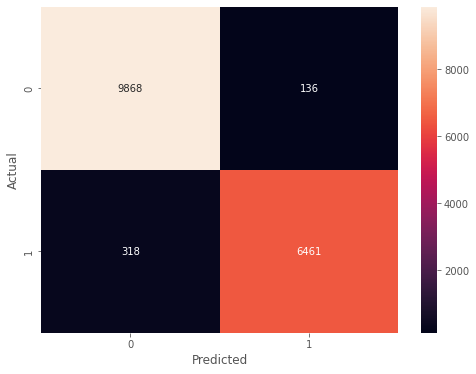

In [247]:
ConfMatrix_PCA_init = tf.math.confusion_matrix(labels = y_test, predictions = yp)

plt.figure(figsize = (8, 6))
sns.heatmap(ConfMatrix_PCA_init, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Classification Report

In [248]:
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     10004
         1.0       0.98      0.95      0.97      6779

    accuracy                           0.97     16783
   macro avg       0.97      0.97      0.97     16783
weighted avg       0.97      0.97      0.97     16783



The example above shows before applying PCA, Logistic Regression (Supervised learning Model) above can predict with 97% accuracy.

Applying PCA

In [249]:
pca = PCA(0.95)  # In this case only 95% of futures will be reataind at best

X_pca_am = pca.fit_transform(X)
X_pca_am.shape

(55941, 12)

In [250]:
X.shape

(55941, 30)

Out of 30 futures from original dataframe, PCA created 12 future

In [251]:
pca.explained_variance_ratio_

array([0.50269584, 0.14729927, 0.07011317, 0.04636882, 0.04152595,
       0.03633583, 0.02554034, 0.02065707, 0.0180599 , 0.01649439,
       0.01434941, 0.01097706])

Above code shows that the first column explains the 50% variantion, second component captures almost 15% and the third one already 7% and so on.

In [586]:
pca.n_components_

12

New futures from PCA will be used to train the model.

In [252]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_am, y, test_size = 0.30, random_state = 10)

In [253]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test).round(2)

0.74

In [254]:
yp_pca = model.predict(X_test_pca)
yp_pca[:16]

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.])

Conusion Matrix after PCA

Text(51.0, 0.5, 'Actual')

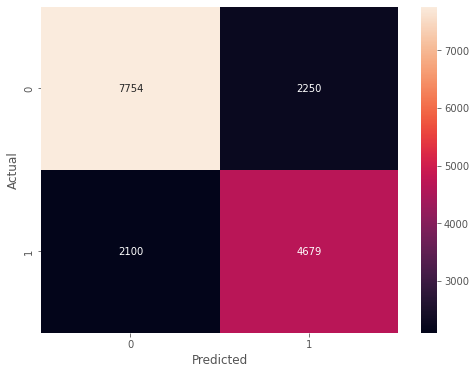

In [255]:
ConfMatrix_PCA_after = tf.math.confusion_matrix(labels = y_test, predictions = yp_pca)

plt.figure(figsize = (8, 6))
sns.heatmap(ConfMatrix_PCA_after, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Classification Report After PCA

In [256]:
print(classification_report(y_test, yp_pca))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78     10004
         1.0       0.68      0.69      0.68      6779

    accuracy                           0.74     16783
   macro avg       0.73      0.73      0.73     16783
weighted avg       0.74      0.74      0.74     16783



Accuracy reduced. Using PCA did not improve the model initial results.

--------
## Artificial Neural Network (ANN)
Data split into test and train. ANN Model for Delay prediction.<br>
Any TTI which is equal or less than 1.1 is considered as No Delay whish represented by 0.<br>
Any TTI which is more than 1.1 is considered as Delay (traffic) and represented by 1.

### Starting with  'df8_WD_AM_OHE' dataframe.
Weekday, Morning

In [257]:
X_trainAM, X_testAM, y_trainAM, y_testAM = train_test_split(X, y, test_size = 0.3, random_state = 10)

Shape of the file shows that only 70% of the dataframe is used for traning 56,583 - 30% = 39,608 records.

In [258]:
X_trainAM.shape

(39158, 30)

In [259]:
X_testAM.shape

(16783, 30)

Importing Tensor Flow and Keras for Neural Network.

In [260]:
model = keras.Sequential([              
    keras.layers.Dense(25, input_shape = (30,), activation = 'relu'), # The number of Input Layer is the same as the num of columns.
    keras.layers.Dense(1, activation = 'sigmoid'),                                         
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_trainAM, y_trainAM, epochs = 30)

Epoch 1/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.4590 - accuracy: 0.7831
Epoch 2/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.2765 - accuracy: 0.9067
Epoch 3/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.2034 - accuracy: 0.9348
Epoch 4/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1658 - accuracy: 0.9469
Epoch 5/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1411 - accuracy: 0.9554
Epoch 6/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1243 - accuracy: 0.9610
Epoch 7/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.1107 - accuracy: 0.9652
Epoch 8/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1008 - accuracy: 0.9670
Epoch 9/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0926 - accuracy: 0.9710
Epoch 10/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.086

#### Model shows 98% accuracy.
Artificial Neural Network results are falling in good side too much.<br>
It may well be a case of Overfitting.

Evaluting the model on X_testAM and y_testAM.

In [261]:
model.evaluate(X_testAM, y_testAM)

525/525 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9834


[0.04703586921095848, 0.9834356307983398]

y_testAM evaluation is giving 99% of accuracy as well.

Checking yp (y predicted)

In [262]:
yp = model.predict(X_testAM)
yp[:16]

array([[9.9945509e-01],
       [1.9872189e-04],
       [4.9743354e-03],
       [9.9993241e-01],
       [6.5472391e-06],
       [1.0000000e+00],
       [4.5343379e-05],
       [8.8741875e-01],
       [1.0000000e+00],
       [3.9660351e-09],
       [2.6460500e-08],
       [9.9044311e-01],
       [1.4504837e-05],
       [1.0000000e+00],
       [1.3462932e-05],
       [1.2887478e-02]], dtype=float32)

In [263]:
y_predAM = []
for element in yp:
    if element > 0.5:
        y_predAM.append(1)
    else:
        y_predAM.append(0)

In [596]:
y_testAM[:16]

198686    0.0
198858    0.0
264796    0.0
66621     1.0
123283    0.0
125232    1.0
69170     0.0
92901     0.0
222654    0.0
152734    1.0
237886    0.0
227037    0.0
44273     1.0
276028    0.0
266039    0.0
46202     1.0
Name: TTI_AM, dtype: float64

In [264]:
y_predAM[:16]

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]

Prediction of this model is too good.<br>
Overfitting is suspected.<br>

In [265]:
print(classification_report(y_testAM, y_predAM))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10004
         1.0       0.99      0.97      0.98      6779

    accuracy                           0.98     16783
   macro avg       0.98      0.98      0.98     16783
weighted avg       0.98      0.98      0.98     16783



Text(51.0, 0.5, 'Actual')

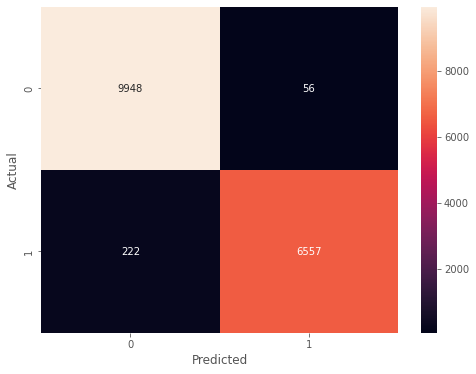

In [268]:
ConfMatrix_AM = tf.math.confusion_matrix(labels = y_testAM, predictions = y_predAM)

plt.figure(figsize = (8, 6))
sns.heatmap(ConfMatrix_AM, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### ANN for 'df8_WD_PM_OHE' dataframe.
Weekday, Afternoon and Evening

In [269]:
X_pm = df8_WD_PM_OHE.drop('TTI_PM', axis = 'columns')
y_pm = df8_WD_PM_OHE['TTI_PM']

In [270]:
X_trainPM, X_testPM, y_trainPM, y_testPM = train_test_split(X_pm, y_pm, test_size = 0.3, random_state = 10)

In [271]:
X_trainPM.shape

(39158, 30)

In [272]:
X_testPM.shape

(16783, 30)

In [273]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([              
    keras.layers.Dense(25, input_shape = (30,), activation = 'relu'), # The number of Input Layer is the same as the num of columns.
    keras.layers.Dense(1, activation = 'sigmoid'),                                         
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_trainPM, y_trainPM, epochs = 30)

Epoch 1/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8108
Epoch 2/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.2493 - accuracy: 0.9166
Epoch 3/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1818 - accuracy: 0.9410
Epoch 4/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.1473 - accuracy: 0.9523
Epoch 5/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1237 - accuracy: 0.9611
Epoch 6/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1072 - accuracy: 0.9669
Epoch 7/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.0954 - accuracy: 0.9698
Epoch 8/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.0856 - accuracy: 0.9730
Epoch 9/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.0795 - accuracy: 0.9748
Epoch 10/30
1224/1224 [==============================] - 2s 1ms/step - loss: 0.073

In [274]:
model.evaluate(X_testPM, y_testPM)

525/525 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9847


[0.038614582270383835, 0.9846869111061096]

In [275]:
yp = model.predict(X_testPM)
yp[:16]

array([[3.8975477e-04],
       [3.3937693e-03],
       [7.4890319e-05],
       [9.9591935e-01],
       [3.5590594e-05],
       [1.0000000e+00],
       [2.6730269e-02],
       [4.3602347e-02],
       [2.1401544e-05],
       [1.2147281e-09],
       [1.1237871e-05],
       [9.1254187e-01],
       [9.9999976e-01],
       [5.1016309e-06],
       [1.5828551e-08],
       [1.5773498e-05]], dtype=float32)

In [276]:
y_predPM = []
for element in yp:
    if element > 0.5:
        y_predPM.append(1)
    else:
        y_predPM.append(0)

In [277]:
y_testPM[:16]

126183    0.0
163408    0.0
277411    0.0
144973    1.0
82088     0.0
59212     1.0
76721     0.0
63942     0.0
21889     0.0
200581    0.0
80553     0.0
115629    1.0
258855    1.0
120494    0.0
257172    0.0
38805     0.0
Name: TTI_PM, dtype: float64

In [278]:
y_predPM[:16]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [279]:
print(classification_report(y_testPM, y_predPM))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      9799
         1.0       1.00      0.97      0.98      6984

    accuracy                           0.98     16783
   macro avg       0.99      0.98      0.98     16783
weighted avg       0.98      0.98      0.98     16783



Text(51.0, 0.5, 'Actual')

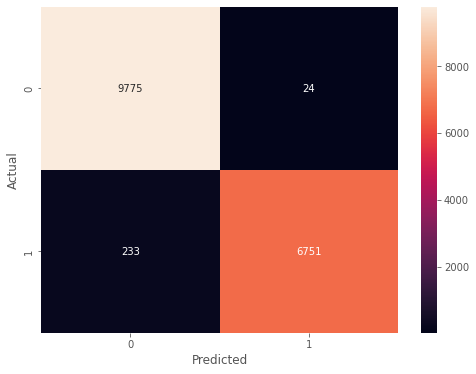

In [281]:
ConfMatrix_PM = tf.math.confusion_matrix(labels = y_testPM, predictions = y_predPM)

plt.figure(figsize = (8, 6))
sns.heatmap(ConfMatrix_PM, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### ANN for 'df8_WN_OHE' dataframe.
Weekend

In [282]:
X_wn = df8_WN_OHE.drop('TTI_WN', axis = 'columns')
y_wn = df8_WN_OHE['TTI_WN']

In [283]:
X_trainWN, X_testWN, y_trainWN, y_testWN = train_test_split(X_wn, y_wn, test_size = 0.3, random_state = 10)

In [284]:
X_trainWN.shape

(39158, 42)

In [285]:
X_testWN.shape

(16783, 42)

In [286]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([              
    keras.layers.Dense(40, input_shape = (42,), activation = 'relu'), # The number of Input Layer is the same as the num of columns.
    keras.layers.Dense(1, activation = 'sigmoid'),                                         
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_trainWN, y_trainWN, epochs = 30)

Epoch 1/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.4239 - accuracy: 0.8034
Epoch 2/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.2281 - accuracy: 0.9236
Epoch 3/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1514 - accuracy: 0.9505
Epoch 4/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.1146 - accuracy: 0.9640
Epoch 5/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0955 - accuracy: 0.9700
Epoch 6/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0834 - accuracy: 0.9729
Epoch 7/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0753 - accuracy: 0.9762
Epoch 8/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0698 - accuracy: 0.9773
Epoch 9/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.0669 - accuracy: 0.9780
Epoch 10/30
1224/1224 [==============================] - 2s 2ms/step - loss: 0.063

In [287]:
model.evaluate(X_testWN, y_testWN)

525/525 [==============================] - 1s 1ms/step - loss: 0.0418 - accuracy: 0.9848


[0.04181883856654167, 0.9848060607910156]

In [288]:
yp_wn = model.predict(X_testWN)
yp_wn[:16]

array([[4.13908988e-01],
       [1.34532675e-05],
       [8.80115767e-05],
       [1.17096007e-02],
       [1.00000000e+00],
       [2.22930312e-01],
       [9.23634291e-01],
       [1.02426638e-05],
       [9.99999166e-01],
       [9.99984145e-01],
       [1.91215477e-07],
       [1.27488375e-03],
       [9.96357679e-01],
       [1.00000000e+00],
       [3.50758569e-07],
       [2.26923680e-06]], dtype=float32)

In [289]:
y_predWN = []
for element in yp_wn:
    if element > 0.5:
        y_predWN.append(1)
    else:
        y_predWN.append(0)

In [290]:
y_testWN[:16]

126183    1.0
163408    0.0
277411    0.0
144973    0.0
82088     1.0
59212     0.0
76721     1.0
63942     0.0
21889     1.0
200581    1.0
80553     0.0
115629    0.0
258855    1.0
120494    1.0
257172    0.0
38805     0.0
Name: TTI_WN, dtype: float64

In [291]:
y_predWN[:16]

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]

In [292]:
print(classification_report(y_testWN, y_predWN))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     11650
         1.0       0.99      0.96      0.97      5133

    accuracy                           0.98     16783
   macro avg       0.99      0.98      0.98     16783
weighted avg       0.98      0.98      0.98     16783



Text(51.0, 0.5, 'Actual')

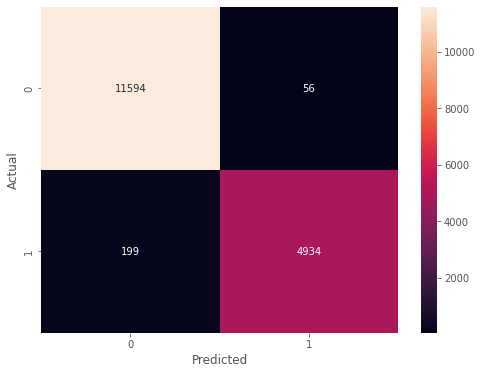

In [294]:
ConfMatrix_WN = tf.math.confusion_matrix(labels = y_testWN, predictions = y_predWN)

plt.figure(figsize = (8, 6))
sns.heatmap(ConfMatrix_WN, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In this dataset, Travel Time Index is given as a value. TTI is the ratio of Average Travel Time in Peak Hours to Free Flow Travel Time, representing the additional time required for travel compared to when there is no congestion causing delays. 
This model can predict the TTI with high accuracy with given parameters.

-----